In [1]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import statsmodels.stats.weightstats as wst
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
from itertools import product
from datetime import datetime
import h5py
#import tables as tb
from copy import deepcopy
import colorsys
import pingouin as pg
import math

from sklearn.model_selection import GridSearchCV, StratifiedKFold, LeaveOneOut
from sklearn.neighbors import KernelDensity

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'P:\\Behavioor'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
GOOD_GREY = '#969696'
SWITCH_COLOR = '#B07A3B'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
#PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#V1
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']#V2

current_version = 2 #July 25th 2023
current_version = 3 #Aug 12th 2023
current_version = 4 #Nov 6th 2023
current_version = 5 #Dec 8th 2023
current_version = 6 #April 17th 2024

stdfont = 14
stdyfrac = 0.06

In [2]:
#Create Behavior
beh_directory = 'P:\\Behavioor'
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching 

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Fetching files for DS_19
Fetching files for DS_22
Fetching files for DS_23
Fetching files for DS_24
Fetching files for DS_27
Fetching files for DS_28
Fetching files for DS_13
Fetching files for BS_173
Fetching files for BS_175
Fetching files for BS_187
Fetching files for BS_188
Fetching files for BS_213
Fetching files for BS_214
Fetching files for TH_217
Fetching files for AE_235
Fetching files for AE_236
Fetching files for TH_237
Fetching files for AE_252
Fetching files for AE_254
Fetching files for AE_238
Fetching files for AE_239
Fetching files for AE_240
Fetching files for AE_267
Fetching files for AO_273
Fetching files for AO_274
Fetching files for AE_287
Fetching files for AE_301
Fetching files for AE_312
P:\Behavioor\BS_61\behavior\BS_61_42v2_reversal.txt: No columns to parse from file
P:\Behavioor\BS_103\behavior\BS_103_11v4_opto.txt: No columns to parse from file
Error loading P:\Behavioor\BS_123\behavior\BS_123_18v1_opto.txt: No columns to parse from file
P:\Behavioor\BS_123\

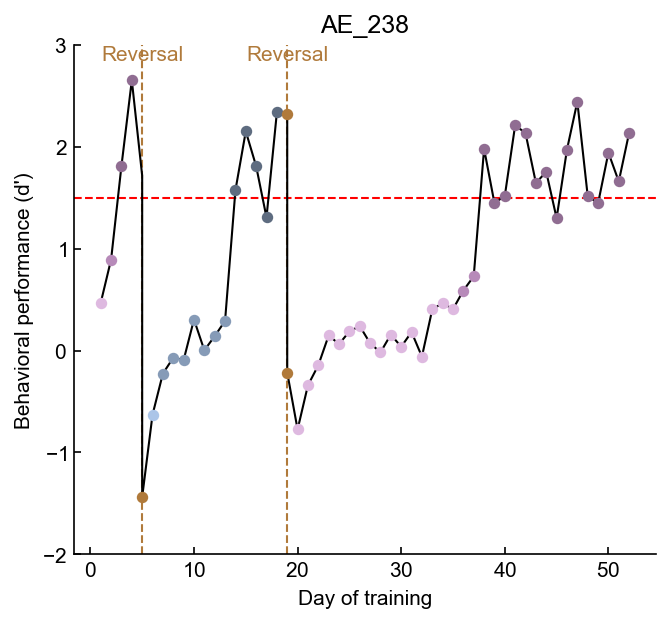

In [3]:
AE_238_learning_phases,a,b = ilep.calculateLearningPhasesV2(['AE_238'],animalBehaviors,plot=True)

there are 398 trials in AE_239 day 39
there are 116 trials in AE_239 day 20
PC is 0.7758620689655172 and DP is 1.59902324595228
there are 116 trials in AE_239 day 20
PC is 0.7758620689655172 and DP is 1.59902324595228
there are 398 trials in AE_239 day 39


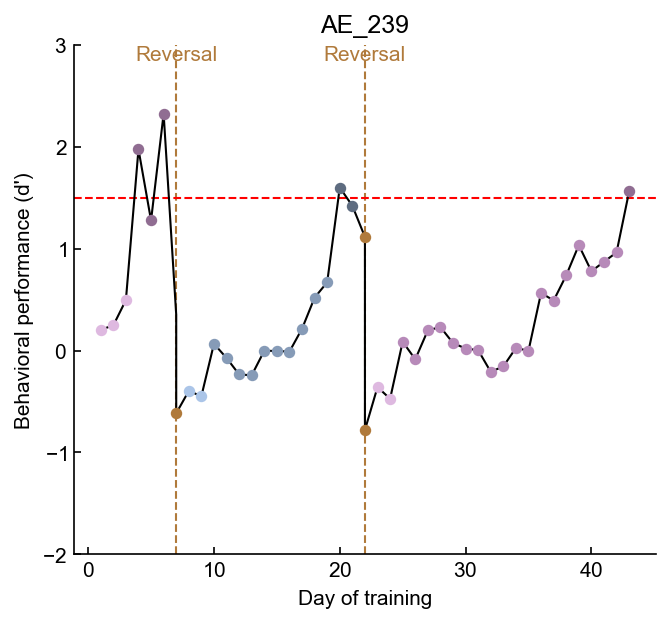

In [4]:
AE_239_learning_phases,a,b = ilep.calculateLearningPhasesV2(['AE_239'],animalBehaviors,plot=True)

../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)


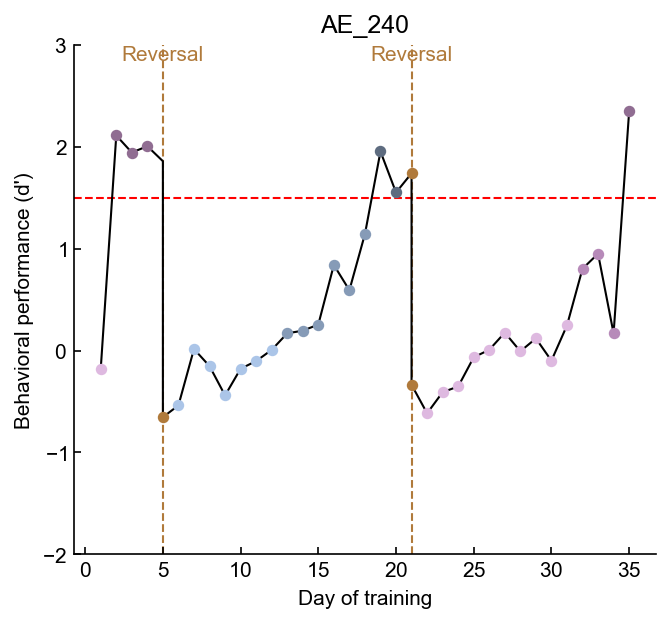

In [5]:
AE_240_learning_phases,a,b = ilep.calculateLearningPhasesV2(['AE_240'],animalBehaviors,plot=True)

In [6]:
AE_238 = AE_238_learning_phases,a,b
AE_239 = AE_239_learning_phases,a,b
AE_240 = AE_240_learning_phases,a,b

In [7]:
AE_238

({'AE_238': namespace(second_early_days=array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]),
            second_late_days=array([36, 37]),
            second_expert_days=array([38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]),
            post_early_days=array([6]),
            post_late_days=array([ 7,  8,  9, 10, 11, 12, 13]),
            post_expert_days=array([14, 15, 16, 17, 18]),
            pre_early_days=array([1]),
            pre_late_days=array([2]),
            pre_expert_days=array([3, 4]))},
 {},
 {})

In [8]:
AE_238[0]['AE_238'].second_late_days

array([36, 37])

In [9]:
AE_239

({'AE_239': namespace(second_early_days=array([23, 24]),
            second_late_days=array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
                                    42]),
            second_expert_days=array([43]),
            post_early_days=array([8, 9]),
            post_late_days=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
            post_expert_days=array([20, 21]),
            pre_early_days=array([1, 2, 3]),
            pre_late_days=array([], dtype=int32),
            pre_expert_days=array([4, 5, 6]))},
 {},
 {})

In [10]:
AE_240

({'AE_240': namespace(second_early_days=array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
            second_late_days=array([32, 33, 34]),
            second_expert_days=array([35]),
            post_early_days=array([ 6,  7,  8,  9, 10, 11, 12]),
            post_late_days=array([13, 14, 15, 16, 17, 18]),
            post_expert_days=array([19, 20]),
            pre_early_days=array([1]),
            pre_late_days=array([], dtype=int32),
            pre_expert_days=array([2, 3, 4]))},
 {},
 {})

In [11]:
animalBehaviors['AE_238'].second_reversal

19

In [12]:
animalBehaviors['AE_239'].second_reversal

22

In [13]:
AE_238[0]['AE_238'].post_expert_days[-1]

18

Animal learning curve

In [ ]:
def animalLearningCurvePlot(animal):
    fig, ax = plt.subplots(figsize=(4,4.5))
    PLOTTING_PHASE_COLORS = PHASE_COLORS
    reversal = animalBehaviors[animal].reversal
    secondreversal = animalBehaviors[animal].second_reversal
    days = list(np.unique(list(animalBehaviors[animal].sessions.keys())))
    expert_days = np.concatenate(( animalPhases[animal].pre_expert_days,animalPhases[animal].post_expert_days,animalPhases[animal].second_expert_days ))
    dp_list,pc_list = ilep.getPCDPfromBehavior(animalBehaviors,animal,days,expert_days,exclude_first_switch=True)

    days = np.sort(days)

    print(days)
    print(dp_list)

    #All Days no color
    ax.plot(days,dp_list,color='k',lw=1)

    circle_size = 60

    #Pre Early
    pre_early = np.isin(days,animalPhases[animal].pre_early_days)
    ax.scatter(days[pre_early],dp_list[pre_early],edgecolor = 'black',color=PLOTTING_PHASE_COLORS[0],s=circle_size,zorder=10)

    #Pre Late
    pre_late = np.isin(days,animalPhases[animal].pre_late_days)
    ax.scatter(days[pre_late],dp_list[pre_late],edgecolor = 'black',color=PLOTTING_PHASE_COLORS[1],s=circle_size,zorder=10)
    #ax.axhline(animalPreThresh[animal],c=PHASE_COLORS[1],linestyle='--',lw=1,zorder=-20)

    #Pre Expert
    pre_expert = np.isin(days,animalPhases[animal].pre_expert_days)
    ax.scatter(days[pre_expert],dp_list[pre_expert],edgecolor = 'black',color=PLOTTING_PHASE_COLORS[2],s=circle_size,zorder=10)

    #Post Early
    post_early = np.isin(days,animalPhases[animal].post_early_days)
    ax.scatter(days[post_early],dp_list[post_early],edgecolor = 'black',color=PLOTTING_PHASE_COLORS[3],s=circle_size,zorder=10)

    #Post Late
    post_late = np.isin(days,animalPhases[animal].post_late_days)
    ax.scatter(days[post_late],dp_list[post_late],edgecolor = 'black',color=PLOTTING_PHASE_COLORS[4],s=circle_size,zorder=10)
    #ax.axhline(animalPostThresh[animal],c=PHASE_COLORS[4],linestyle='--',lw=1,zorder=-20)

    #Post Expert
    post_expert = np.isin(days,animalPhases[animal].post_expert_days)
    ax.scatter(days[post_expert],dp_list[post_expert],edgecolor = 'black',color=PLOTTING_PHASE_COLORS[5],s=circle_size,zorder=10)

    #Switch
    switch = np.equal(days,animalBehaviors[animal].reversal)
    ax.scatter(days[switch],dp_list[switch],edgecolor = 'black',color=SWITCH_COLOR,s=circle_size,zorder=10)

    #Second Switch
    second_switch = np.equal(days,animalBehaviors[animal].second_reversal)
    ax.scatter(days[second_switch],dp_list[second_switch],edgecolor = 'black',color=SWITCH_COLOR,s=circle_size,zorder=10)

    #Second Early
    second_early = np.isin(days,animalPhases[animal].second_early_days)
    ax.scatter(days[second_early],dp_list[second_early],edgecolor = 'black',color=PLOTTING_PHASE_COLORS[0],s=circle_size,zorder=10)

    #Second Late
    second_late = np.isin(days,animalPhases[animal].second_late_days)
    ax.scatter(days[second_late],dp_list[second_late],edgecolor = 'black',color=PLOTTING_PHASE_COLORS[1],s=circle_size,zorder=10)

    #Second Expert
    second_expert = np.isin(days,animalPhases[animal].second_expert_days)
    ax.scatter(days[second_expert],dp_list[second_expert],edgecolor = 'black',color=PLOTTING_PHASE_COLORS[2],s=circle_size,zorder=10)

    ax.set_ylim([-2,3])
    ax.set_yticks([-2,-1,0,1,2,3])

    ax.set_xticks(days)
    ax.set_xticks(range(0,  int(math.ceil(max(days)/5)*5)+1  ))
    #ax.set_xticklabels(days-1)
    for index, label in enumerate(ax.xaxis.get_ticklabels()):
        labeledindex = [0,5,10,15,20,25,30,35,40,45,50,55]
        if index not in labeledindex:
            label.set_visible(False)
    ax.tick_params(length=6)

    ax.axhline(1.5,c='r',linestyle='--',lw=1,zorder=-20)

    ax.text(reversal,ax.get_ylim()[1]+0.2,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='top')
    ax.axvline(reversal,c=SWITCH_COLOR,linestyle='--',lw=1)

    ax.text(secondreversal,ax.get_ylim()[1]+0.2,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='top')
    ax.axvline(secondreversal,c=SWITCH_COLOR,linestyle='--',lw=1,zorder=-10)

    #ax.text(3,ax.get_ylim()[1]+0.2,'Pre',color=PLOTTING_PHASE_COLORS[0],horizontalalignment='center',verticalalignment='top')
    #ax.text(12,ax.get_ylim()[1]+0.2,'Post',color=PLOTTING_PHASE_COLORS[3],horizontalalignment='center',verticalalignment='top')

    print(reversal)
    # ax.text(1.3,-0.3,'Early',color=PLOTTING_PHASE_COLORS[0])
    # ax.text(4,0.8,'Late',color=PLOTTING_PHASE_COLORS[1])
    # ax.text(4.6,2.5,'Expert',color=PLOTTING_PHASE_COLORS[2])
    # ax.text(8.6,-0.7,'Early',color=PLOTTING_PHASE_COLORS[3])
    # ax.text(12.5,-0.1,'Late',color=PLOTTING_PHASE_COLORS[4])
    # ax.text(14.2,2.5,'Expert',color=PLOTTING_PHASE_COLORS[5])

    #days_recorded = training_days_recorded[animal]
    #ax.scatter(days_recorded,np.ones_like(days_recorded)*2.9,s=5,marker='*',color='orange',zorder=11)
    ax.set_title(animal)
    ax.set_ylabel("Behavioral performance (d') ")
    ax.set_xlabel('Sessions')
    ax.set_axisbelow(False)
    #days_recorded = training_days_recorded[animal]
    #ax.scatter(days_recorded,np.ones_like(days_recorded)*2.9,s=5,marker='*',color='orange',zorder=11)
    #fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\SecondaryAnalysis','example learning curve '+animal+'.pdf'),transparent=False,facecolor="white")
    #fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\SecondaryAnalysis','example learning curve '+animal+'.pdf'),transparent=False,facecolor="white")
    fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Secondary Reversal Figures','example learning curve '+animal+'.pdf'),transparent=False,facecolor="white")

NameError: name 'animalLearningCurvePlot' is not defined

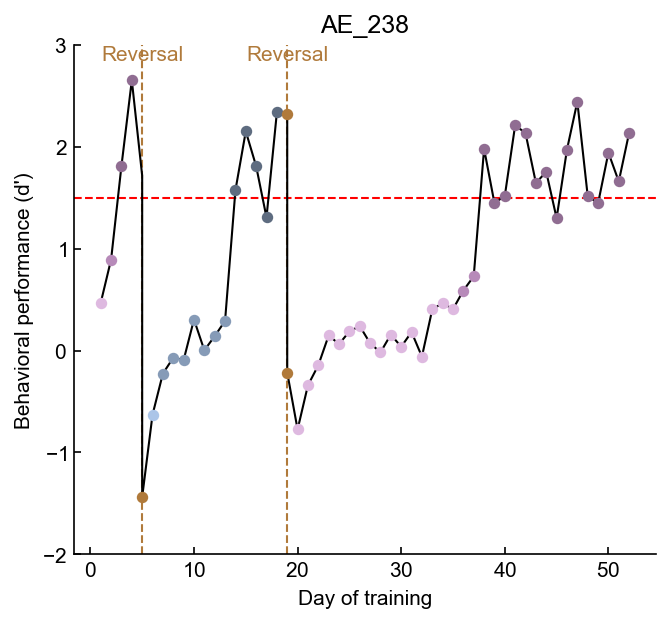

In [14]:
animallist = ['AE_238','AE_239','AE_240']
for animal in animallist:
    animalPhases,_,_ = ilep.calculateLearningPhasesV2([animal],animalBehaviors,plot=True)
    animalLearningCurvePlot(animal)

In [14]:
#act_directory = 'C:\\Users\insan\\Desktop\\Analysis_Cache'
act_directory = 'D:\\Analysis_Cache'

In [15]:
animals_in_cache = []
EnumACSession = []
EnumACClust = []

for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.animal not in ['AE_238', 'AE_239','AE_240']:
        continue
        
    animals_in_cache.append(sessionfile.meta.animal)

    for clust in sessionfile.clusters.good:
        if sessionfile.meta.region == "AC":
            EnumACSession.append(session)
            EnumACClust.append(clust)
        
animals_in_cache = np.unique(animals_in_cache)

100%|██████████| 740/740 [00:09<00:00, 79.85it/s] 


In [16]:
animals_in_cache

array(['AE_238', 'AE_239', 'AE_240'], dtype='<U6')

In [17]:
len(EnumACClust)

1451

Plot PSTH

In [18]:
FRmod_baseline_median = 3.5 #from normal reversal animals

In [19]:
def get_response_times_with_default(sessionfile):
    response_times_in_trial = (sessionfile.trials.response-sessionfile.trials.starts)
    default_response_time = np.nanmedian(response_times_in_trial)

    response_times = sessionfile.trials.response
    nogo_trials = np.isnan(response_times)
    response_times[nogo_trials] = sessionfile.trials.starts[nogo_trials]+default_response_time
    return response_times

In [103]:
def visualizeClusterInternal(sessionfile,clust,ax1,ax2):

    starttime = -250
    endtime = starttime+2500#1500
    bw_scott_factor = 3

    buffer = 500
    bufferedstart = starttime - buffer
    bufferedend = endtime + buffer
    startbuffer = (0-bufferedstart)/1000
    endbuffer = (bufferedend-2500)/1000 #NOTE THAT THIS IS CURRENTLY A HARDCODED VALUE!!!

    #########################################################################################

    region = sessionfile.meta.region

    #########################################################################################

    #fig = plt.figure(figsize=(4,6))
    #gs = fig.add_gridspec(2,1,height_ratios=[2,1],hspace=0.0125)#,wspace=0.5)#0.1)
    #ax1 = plt.subplot(gs[0,0])#Raster
    #ax2 = plt.subplot(gs[1,0],sharex=ax1)#PSTH
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)

    #FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
    FRmod = 3.5
    FRmod_color = NCR_CR_cmap( (FRmod-1)/5)
    
    response_times = get_response_times_with_default(sessionfile)
    
    

    #Sort trials by response time
    trialsToPlot = np.array(sessionfile.trim[clust].trimmed_trials)
    Is_trialsToPlot_Go = sessionfile.trials.go[trialsToPlot]
    trialsToPlotGo = trialsToPlot[Is_trialsToPlot_Go]
    trialsToPlotNogo = np.logical_not(Is_trialsToPlot_Go)

    #Sort by response time
    response_times_trimmed = response_times[trialsToPlot] - sessionfile.trials.starts[trialsToPlot]#sessionfile.trials.response[trialsToPlot] - sessionfile.trials.starts[trialsToPlot]
    sort_idx = np.argsort(response_times_trimmed)    
    trialsToPlot = trialsToPlot[sort_idx]###
    response_times_trimmed_sorted = response_times_trimmed[sort_idx] * 1000 / sessionfile.meta.fs###

    Go_times_trimmed = response_times - sessionfile.trials.starts
    Go_times_trimmed[np.logical_not(sessionfile.trials.go)] = np.nan * 1000 / sessionfile.meta.fs
    Go_times_trimmed_sorted = Go_times_trimmed[sort_idx]###
    
    new_go_trials_idx_list = np.where(np.isin(trialsToPlot,trialsToPlotGo))[0]
    new_go_trials = trialsToPlot[np.isin(trialsToPlot,trialsToPlotGo)]
    new_go_trials_time_list = Go_times_trimmed[new_go_trials] * 1000 / sessionfile.meta.fs
    
    clustSpikes = ilep.getSpikeTimes(sessionfile,clust=clust)
    trialSpikes = []
    for trial in trialsToPlot:
        this_trial_spikes = ilep.getTrialSpikes(sessionfile,trial,cachedtimes=clustSpikes,outunits='ms',startbuffer=startbuffer,endbuffer=endbuffer)
        trialSpikes.append(this_trial_spikes)
    trialSpikes = np.array(trialSpikes,dtype='object')

    #Plot Raster
    for idx,trial in enumerate(trialsToPlot):
        ax1.scatter(trialSpikes[idx],np.ones_like(trialSpikes[idx])*idx,color=FRmod_color,s=1.5,marker='o',lw=0)

    #if sessionfile.meta.task == 'switch':
    #    try:
    #        switch_point = np.where(np.greater(trialsToPlot,200))[0][0]-0.5
    #        ax1.axhline(switch_point,linestyle='--',lw=1,zorder=-10,color='k')
    #    except:
    #        pass
        
    #np.isfinite(Go_times_trimmed_sorted[idx]):
    go_trials = new_go_trials_idx_list
    ax1.scatter(new_go_trials_time_list,go_trials,marker='o',fc='k',ec='k',zorder=-1,s=1.5,label='response')
    
    ax1.fill_betweenx(range(len(trialsToPlot)),[0]*len(trialsToPlot),[100]*len(trialsToPlot),alpha=0.125,color='k',lw=0,label='stimulus')

    #Plot PSTH
    PSTHstart = starttime - 0.1
    PSTHend = endtime + 0.1
    xrange = np.linspace(starttime,endtime,num=1000)
    FR = np.full((10,len(xrange)),np.nan)
    kf = KFold(n_splits=10)
    for idx,(train_index,_) in enumerate(kf.split(trialSpikes)):
        PSTHspikes = np.concatenate(trialSpikes[train_index])
        bw = len(PSTHspikes)**(-1./5) / bw_scott_factor
        KDE = gaussian_kde(PSTHspikes,bw_method=bw)
        FR[idx,:] = KDE.evaluate(xrange)
        FR[idx,:] = FR[idx,:] * len(PSTHspikes) / len(train_index) * 1000 #1000 is conversion to s/s because units are all in ms for this plot
    avg_FR = np.mean(FR,axis=0)
    sem_FR = np.std(FR,axis=0)

    ax2.plot(xrange,avg_FR,lw=1,color=FRmod_color)
    ax2.fill_between(xrange,avg_FR-sem_FR,avg_FR+sem_FR,color=FRmod_color,alpha=0.5,zorder=-10,lw=0)

    max_FR_value = np.max(avg_FR+sem_FR) * 1.1
    sequence_of_possible_axis_limits = np.array([1,2,4,6,8,10,12,16,20,30,40,50,60,80,100,120,140,150,160,180,200])
    idx_of_okay_limits = np.greater_equal(sequence_of_possible_axis_limits,max_FR_value)
    valid_limits = sequence_of_possible_axis_limits[idx_of_okay_limits]
    limit = np.min(valid_limits)
    ax2.set_ylim([0,limit])
    ax2.set_yticks([0,limit/2,limit])
    ax2.set_yticklabels(['0',str(int(limit/2)),str(limit)])
    ax2.set_ylabel('Firing rate (spikes/s)')

    ax2.plot([0,100],[limit,limit],color='k',lw=3,linestyle='-',zorder=10)

    ax2.set_xlim([starttime,endtime])
    ax2.set_xticks([0,500,1000,1500,2000])
    ax2.set_xticklabels(['0','0.5','1','1.5','2.0'])
    ax2.set_xlabel('Time (s)')
    
    #ax1.set_title(f"Stim. mod.: {sessionfile.responsiveness[clust]['all_trials'].FRmodulation}\nChoice mod.: {sessionfile.responsiveness[clust]['go'].rampingMod}")

In [104]:
def visualizeClusterChoiceInternal(sessionfile,clust,ax1,ax2):
    #starttime = -250
    #endtime = 250
    bw_scott_factor = 3

    #buffer = 500
    #bufferedstart = starttime - buffer
    #bufferedend = endtime + buffer
    #startbuffer = (0-bufferedstart)/1000
    #endbuffer = (bufferedend-2500)/1000 #NOTE THAT THIS IS CURRENTLY A HARDCODED VALUE!!!

    #if not hasattr(sessionfile.responsiveness[clust]['go_response'],'rampingMod'):
    #    continue

    #########################################################################################

    #Determine FRmod category
    #FRmodCategory = 'ERROR'
    #FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
    #if FRmod < 2:
    #    FRmodCategory = 'NCR'
    #elif FRmod > 8:
    #    FRmodCategory = 'CR'
    #else:
    #    FRmodCategory = 'Middle'
    ##Skip unidentified category neurons
    #if FRmodCategory == 'ERROR':
    #    continue

    #region = sessionfile.meta.region

    #EIL = EILphases[idx]
    ##Skip unidentified phase neurons
    #if EIL in ['ERROR']:
    #    continue

    #if EIL != 'pre late':
    #    continue

    
    
    
    #This is just the response time of each trial
    response_times = get_response_times_with_default(sessionfile)
    #response_times = sessionfile.trials.response

    #if np.mean(np.isnan(response_times)) > 0.75:
    #    print('skipping '+session+', not enough go responses')
    #    continue

    #plt.hist(sessionfile.trials.response-sessionfile.trials.starts,bins=100)
    #print(sessionfile.trials.response-sessionfile.trials.starts)
    #########################################################################################

    #fig = plt.figure(figsize=(4,6))
    #gs = fig.add_gridspec(2,1,height_ratios=[2,1],hspace=0.0125)#,wspace=0.5)#0.1)
    #ax1 = plt.subplot(gs[0,0])#Raster
    #ax2 = plt.subplot(gs[1,0],sharex=ax1)#PSTH
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)

    #FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
    FRmod = 3.5
    FRmod_color = NCR_CR_cmap( (FRmod-1)/5)

    #Sort trials by response time
    trialsToPlot = np.array(sessionfile.trim[clust].trimmed_trials)
    Is_trialsToPlot_Go = sessionfile.trials.go[trialsToPlot]
    trialsToPlotGo = trialsToPlot[Is_trialsToPlot_Go]
    trialsToPlotNogo = np.logical_not(Is_trialsToPlot_Go)

    response_times_trimmed = response_times[trialsToPlot] - sessionfile.trials.starts[trialsToPlot]#sessionfile.trials.response[trialsToPlot] - sessionfile.trials.starts[trialsToPlot]
    sort_idx = np.argsort(response_times_trimmed)
    trialsToPlot = trialsToPlot[sort_idx]###
    response_times_trimmed_sorted = response_times_trimmed[sort_idx] * 1000 / sessionfile.meta.fs###

    Go_times_trimmed = response_times - sessionfile.trials.starts
    Go_times_trimmed[np.logical_not(sessionfile.trials.go)] = np.nan
    Go_times_trimmed_sorted = Go_times_trimmed[sort_idx] * 1000 / sessionfile.meta.fs###
    Go_times_trimmed_sorted = Go_times_trimmed_sorted[np.isfinite(Go_times_trimmed_sorted)]
    
    new_go_trials_idx_list = np.where(np.isin(trialsToPlot,trialsToPlotGo))[0]

    clustSpikes = ilep.getSpikeTimes(sessionfile,clust=clust)
    trialSpikes = []
    for trial in trialsToPlot:

        #Need to get spike times for each trail...
        this_trial_spikes = ilep.getSpikeTimes(sessionfile,clust=clust,starttime=response_times[trial]-2.75*sessionfile.meta.fs,endtime=response_times[trial]+0.25*sessionfile.meta.fs)
        this_trial_spikes = this_trial_spikes - response_times[trial]
        this_trial_spikes = this_trial_spikes * 1000 / sessionfile.meta.fs

        ##this_trial_spikes = ilep.getTrialSpikes(sessionfile,trial,cachedtimes=clustSpikes,outunits='ms',startbuffer=startbuffer,endbuffer=endbuffer)
        #trialend = response_times[trial]
        ##trialstart = trialend - 2.5*sessionfile.meta.fs
        #trialstart = sessionfile.trials.starts[trial]
        #
        #trialstart_buffer = trialstart - 0.25*30000
        #trialend_buffer = trialend + 0.25*30000
        #
        #this_trial_idx = np.logical_and(np.greater(clustSpikes,trialstart_buffer) , np.less(clustSpikes,trialend_buffer))
        #this_trial_spikes = clustSpikes[this_trial_idx] - trialend
        #
        #this_trial_spikes = this_trial_spikes*1000/30000
        #

        trialSpikes.append(this_trial_spikes)
    trialSpikes = np.array(trialSpikes,dtype='object')

    #Plot Raster
    for idx,trial in enumerate(trialsToPlot):
        ax1.scatter(trialSpikes[idx],np.ones_like(trialSpikes[idx])*idx,color=FRmod_color,s=1.5,marker='o',lw=0)

        trialend = response_times[trial]
        trialstart = sessionfile.trials.starts[trial]
        trial_duration = trialend-trialstart
        trial_duration = trial_duration * 1000 / 30000

        #ax1.plot([-2500,-trial_duration],[idx,idx],color='red',lw=0.1)

    #np.isfinite(Go_times_trimmed_sorted[idx]):
    #print(Go_times_trimmed_sorted)
    #go_trials = np.where(np.isfinite(Go_times_trimmed_sorted))[0]
    go_trials = new_go_trials_idx_list
    ax1.scatter(np.zeros_like(go_trials),go_trials,marker='o',fc='k',ec='k',zorder=-1,s=1.5,label='response')

    
    ax1.fill_betweenx(range(len(trialsToPlot)),-response_times_trimmed_sorted,100-response_times_trimmed_sorted,alpha=0.125,color='k',lw=0,label='stimulus')
    
    #ax1.axvline(0,lw=2.5,color='green',label='Response')
    ax1.legend(frameon=False,loc=(0.6,1))

    #if EIL == 'switch':
    #    try:
    #        switch_point = np.where(np.greater(trialsToPlot,200))[0][0]-0.5
    #        ax1.axhline(switch_point,linestyle='--',lw=1,zorder=-10,color='k')
    #    except:
    #        pass

    #Plot PSTH
    starttime = -2500
    endtime = 0
    PSTHstart = starttime - 500
    PSTHend = endtime + 500
    xrange = np.linspace(starttime,endtime,num=1000)
    FR = np.full((10,len(xrange)),np.nan)
    kf = KFold(n_splits=10)
    for idx,(train_index,_) in enumerate(kf.split(trialSpikes)):
        PSTHspikes = np.concatenate(trialSpikes[train_index])
        bw = len(PSTHspikes)**(-1./5) / bw_scott_factor
        KDE = gaussian_kde(PSTHspikes,bw_method=bw)
        FR[idx,:] = KDE.evaluate(xrange)
        FR[idx,:] = FR[idx,:] * len(PSTHspikes) / len(train_index) * 1000 #1000 is conversion to s/s because units are all in ms for this plot
    avg_FR = np.mean(FR,axis=0)
    sem_FR = np.std(FR,axis=0)

    ax2.plot(xrange,avg_FR,lw=1,color=FRmod_color)
    ax2.fill_between(xrange,avg_FR-sem_FR,avg_FR+sem_FR,color=FRmod_color,alpha=0.5,zorder=-10,lw=0)

    max_FR_value = np.max(avg_FR+sem_FR) * 1.1
    sequence_of_possible_axis_limits = np.array([1,2,4,6,8,10,12,16,20,30,40,50,60,80,100,120,140,150,160,180,200])
    idx_of_okay_limits = np.greater_equal(sequence_of_possible_axis_limits,max_FR_value)
    valid_limits = sequence_of_possible_axis_limits[idx_of_okay_limits]
    limit = np.min(valid_limits)
    ax2.set_ylim([0,limit])
    ax2.set_yticks([0,limit/2,limit])
    ax2.set_yticklabels(['0',str(int(limit/2)),str(limit)])
    ax2.set_ylabel('Firing rate (spikes/s)')

    #ax2.plot([0,100],[limit,limit],color='k',lw=3,linestyle='-',zorder=10)

    ax2.set_xlim([starttime,endtime])
    #ax2.set_xticks([0,500,1000,1500])
    #ax2.set_xticklabels(['0','0.5','1','1.5'])
    ax2.set_xticks([-0,-500,-1000,-1500,-2000,-2500])
    ax2.set_xticklabels(['0','-0.5','-1','-1.5','-2.0','-2.5'])
    ax2.set_xlabel('Time relative to response (s)')


    #p_ev,p_sup,p_ncr = calculate_NCR_CR_pval(sessionfile,clust)
    #category = 'Inconclusive'
    #rampingMod = sessionfile.responsiveness[clust]['go_response'].rampingMod
    #if p_ev > 0.95 or p_sup > 0.95:
    #    rampingMod = sessionfile.responsiveness[clust]['slow_go_response'].rampingMod
    #    if np.abs(sessionfile.responsiveness[clust]['slow_go_response'].rampingModNorm > 0.5):
    #        category = 'Both'
    #    else:
    #        category = 'Stimulus'
    #elif p_ncr > 0.95:
    #    if np.abs(sessionfile.responsiveness[clust]['go_response'].rampingModNorm > 0.5):
    #        category = 'Ramping'
    #    else:
    #        category = 'NCR'

    #if hasattr(sessionfile.responsiveness[clust]['go_response'],'rampingMod'):
    #    ax1.set_title(f"Category: {category}\nStimulus: {sessionfile.responsiveness[clust]['all_trials'].FRmodulation}\nRamping: {rampingMod}")
    #else:
    #    ax1.set_title(f"Ramping not calculated")

    #try:
    #    if not FRmodCategory == 'ERROR':
    #        fig.savefig(os.path.join('D:\\\\TempFigures','ChoiceRasters',region,FRmodCategory,EIL,'pdfs',ilep.generateDateString(sessionfile)+' '+str(clust)+'.pdf'),transparent=False,facecolor="white")
    #        fig.savefig(os.path.join('D:\\\\TempFigures','ChoiceRasters',region,FRmodCategory,EIL,'pngs',ilep.generateDateString(sessionfile)+' '+str(clust)+'.png'),transparent=False,facecolor="white")
    #    fig.savefig(os.path.join('D:\\\\TempFigures','ChoiceRasters','pdfs',ilep.generateDateString(sessionfile)+' '+str(clust)+'.pdf'),transparent=False,facecolor="white")
    #    fig.savefig(os.path.join('D:\\\\TempFigures','ChoiceRasters','pngs',ilep.generateDateString(sessionfile)+' '+str(clust)+'.png'),transparent=False,facecolor="white")
    #except Exception as e:
    #    print(e)

In [105]:

for idx,(session,clust) in tqdm(enumerate(zip(EnumACSession,EnumACClust))):
    plt.close('all')
    sessionfile = ilep.loadSessionCached(act_directory,session)

    fig = plt.figure(figsize=(6,6))
    gs = fig.add_gridspec(2,2,height_ratios=[2,1],hspace=0.0125)#,wspace=0.5)#0.1)
    ax1 = plt.subplot(gs[0,0])#Raster
    ax2 = plt.subplot(gs[1,0],sharex=ax1)#PSTH

    ax3 = plt.subplot(gs[0,1])#Raster
    ax4 = plt.subplot(gs[1,1],sharex=ax3)#PSTH

    visualizeClusterInternal(sessionfile,clust,ax1,ax2)
    visualizeClusterChoiceInternal(sessionfile,clust,ax3,ax4)

    FRmodCategory = 'Middle'
#     #Determine FRmod category
#     FRmodCategory = 'ERROR'
#     FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
#     if FRmod < 2:
#         FRmodCategory = 'NCR'
#     elif FRmod > 8:
#         FRmodCategory = 'CR'
#     else:
#         FRmodCategory = 'Middle'
#     #Skip unidentified category neurons
#     if FRmodCategory == 'ERROR':
#         continue

    region = sessionfile.meta.region

    # EIL = EILphases[idx]
    #Skip unidentified phase neurons
    # if EIL in ['ERROR']:
    #     continue

    #try:
#         if not FRmodCategory == 'ERROR':
#             fig.savefig(os.path.join('D:\\\\TempFigures','MultiRasters',region,FRmodCategory,EIL,'pdfs',ilep.generateDateString(sessionfile)+' '+str(clust)+'.pdf'),transparent=False,facecolor="white")
#             fig.savefig(os.path.join('D:\\\\TempFigures','MultiRasters',region,FRmodCategory,EIL,'pngs',ilep.generateDateString(sessionfile)+' '+str(clust)+'.png'),transparent=False,facecolor="white")

    fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\SecondaryPSTH',ilep.generateDateString(sessionfile)+' '+str(clust)+'.pdf'),transparent=False,facecolor="white")

from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt, patches
file_PSTH = 'C:\\Users\insan\\Desktop\\SecondaryPSTH\\All secondary PSTH.pdf'
with PdfPages(file_PSTH) as pdf:
    pdf.savefig(fig)
    plt.close('all')

0it [00:00, ?it/s]meta NOT subset; don't know how to subset; dropped
1it [00:07,  7.31s/it]meta NOT subset; don't know how to subset; dropped
2it [00:12,  6.23s/it]meta NOT subset; don't know how to subset; dropped
3it [00:19,  6.30s/it]meta NOT subset; don't know how to subset; dropped
4it [00:26,  6.58s/it]meta NOT subset; don't know how to subset; dropped
5it [00:31,  6.24s/it]meta NOT subset; don't know how to subset; dropped
6it [00:36,  5.79s/it]meta NOT subset; don't know how to subset; dropped
7it [00:43,  6.24s/it]meta NOT subset; don't know how to subset; dropped
8it [00:48,  5.57s/it]meta NOT subset; don't know how to subset; dropped
9it [00:53,  5.59s/it]meta NOT subset; don't know how to subset; dropped
10it [00:57,  5.01s/it]meta NOT subset; don't know how to subset; dropped
11it [01:02,  5.17s/it]meta NOT subset; don't know how to subset; dropped
12it [01:06,  4.69s/it]meta NOT subset; don't know how to subset; dropped
13it [01:08,  4.00s/it]meta NOT subset; don't know h

In [20]:
sessionfile.meta

namespace(directory='D:\\DualRecording\\TH_237\\TH_237 5\\AC\\',
          region='AC',
          animal='TH_237',
          probe=6932,
          date='03/01/2023',
          depth=1020,
          task='tuning nonreversal',
          day_of_training=5,
          day_of_recording=5,
          first_tuning_trial=351,
          length_in_samples=71395704.0,
          files=['March 1 2023 AC Tuning TH_237_5001',
                 'March 1 2023 AC Tuning TH_237_5002',
                 'March 1 2023 AC Tuning TH_237_5003',
                 'March 1 2023 AC Tuning TH_237_5004'],
          arraystart=0,
          tonelength=0.1,
          triallength=2.5,
          lickdelayrelativetostart=0,
          lickdelayrelativetotone=-0.1,
          fs=30000,
          length_in_seconds=2379.8568,
          length_in_minutes=39.66428,
          length_in_trials=350,
          first_tuning_trial_corrected=350)

Analysis

In [21]:
FRmod_postexpert = []
FRmod_preswitch = []
FRmod_postswitch = []
FRmod_secondearly = []
FRmod_secondlate = []
FRmod_secondexpert = []

firstexpertFiles = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumACSession,EnumACClust))):
    
    ACsessionfile = ilep.loadSessionCached(act_directory,session)
    
    if ACsessionfile.meta.animal in ['AE_238','AE_239','AE_240']:
        sessionfile = ACsessionfile
        
    if sessionfile.meta.animal == 'AE_238':
        if sessionfile.meta.day_of_training >= AE_238[0]['AE_238'].post_expert_days[0] and sessionfile.meta.day_of_training <=AE_238[0]['AE_238'].post_expert_days[-1]:
            print('AE_238')
            FRmod_postexpert.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
            firstexpertFiles.append(sessionfile.meta.directory)
            
        if sessionfile.meta.day_of_training == animalBehaviors['AE_238'].second_reversal:
            a = sessionfile
            FRmod_preswitch.append(sessionfile.responsiveness[clust]['pre_switch'].FRmodulation)
            FRmod_postswitch.append(sessionfile.responsiveness[clust]['post_switch'].FRmodulation)
            
        if sessionfile.meta.day_of_training >= AE_238[0]['AE_238'].second_early_days[0] and sessionfile.meta.day_of_training <=AE_238[0]['AE_238'].second_early_days[-1]:
            FRmod_secondearly.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        if sessionfile.meta.day_of_training >= AE_238[0]['AE_238'].second_late_days[0] and sessionfile.meta.day_of_training <=AE_238[0]['AE_238'].second_late_days[-1]:
            FRmod_secondlate.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        if sessionfile.meta.day_of_training >= AE_238[0]['AE_238'].second_expert_days[0] and sessionfile.meta.day_of_training <=AE_238[0]['AE_238'].second_expert_days[-1]:
            FRmod_secondexpert.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
    
    if sessionfile.meta.animal == 'AE_239':
        if sessionfile.meta.day_of_training >= AE_239[0]['AE_239'].post_expert_days[0] and sessionfile.meta.day_of_training <=AE_239[0]['AE_239'].post_expert_days[-1]:
            FRmod_postexpert.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
            firstexpertFiles.append(sessionfile.meta.directory)
            
        if sessionfile.meta.day_of_training == animalBehaviors['AE_239'].second_reversal:
            FRmod_preswitch.append(sessionfile.responsiveness[clust]['pre_switch'].FRmodulation)
            FRmod_postswitch.append(sessionfile.responsiveness[clust]['post_switch'].FRmodulation)

        if sessionfile.meta.day_of_training >= AE_239[0]['AE_239'].second_early_days[0] and sessionfile.meta.day_of_training <=AE_239[0]['AE_239'].second_early_days[-1]:
            FRmod_secondearly.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        if sessionfile.meta.day_of_training >= AE_239[0]['AE_239'].second_late_days[0] and sessionfile.meta.day_of_training <=AE_239[0]['AE_239'].second_late_days[-1]:
            FRmod_secondlate.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        if sessionfile.meta.day_of_training >= AE_239[0]['AE_239'].second_expert_days[0] and sessionfile.meta.day_of_training <=AE_239[0]['AE_239'].second_expert_days[-1]:
            FRmod_secondexpert.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
            
    if sessionfile.meta.animal == 'AE_240':
        if sessionfile.meta.day_of_training >= AE_240[0]['AE_240'].post_expert_days[0] and sessionfile.meta.day_of_training <=AE_240[0]['AE_240'].post_expert_days[-1]:
            FRmod_postexpert.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
            firstexpertFiles.append(sessionfile.meta.directory)
            
        if sessionfile.meta.day_of_training == animalBehaviors['AE_240'].second_reversal:
            FRmod_preswitch.append(sessionfile.responsiveness[clust]['pre_switch'].FRmodulation)
            FRmod_postswitch.append(sessionfile.responsiveness[clust]['post_switch'].FRmodulation)
            
        if sessionfile.meta.day_of_training >= AE_240[0]['AE_240'].second_early_days[0] and sessionfile.meta.day_of_training <=AE_240[0]['AE_240'].second_early_days[-1]:
            FRmod_secondearly.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        if sessionfile.meta.day_of_training >= AE_240[0]['AE_240'].second_late_days[0] and sessionfile.meta.day_of_training <=AE_240[0]['AE_240'].second_late_days[-1]:
            FRmod_secondlate.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        if sessionfile.meta.day_of_training >= AE_240[0]['AE_240'].second_expert_days[0] and sessionfile.meta.day_of_training <=AE_240[0]['AE_240'].second_expert_days[-1]:
            FRmod_secondexpert.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
            

        

1451it [00:32, 44.73it/s] 


In [22]:
firstexpertFiles

['D:\\DualRecording\\AE_239\\AE_239 1\\AC\\',
 'D:\\DualRecording\\AE_239\\AE_239 1\\AC\\',
 'D:\\DualRecording\\AE_239\\AE_239 1\\AC\\',
 'D:\\DualRecording\\AE_239\\AE_239 1\\AC\\',
 'D:\\DualRecording\\AE_239\\AE_239 1\\AC\\',
 'D:\\DualRecording\\AE_239\\AE_239 1\\AC\\',
 'D:\\DualRecording\\AE_239\\AE_239 1\\AC\\',
 'D:\\DualRecording\\AE_239\\AE_239 1\\AC\\',
 'D:\\DualRecording\\AE_239\\AE_239 1\\AC\\',
 'D:\\DualRecording\\AE_239\\AE_239 1\\AC\\',
 'D:\\DualRecording\\AE_239\\AE_239 1\\AC\\',
 'D:\\DualRecording\\AE_239\\AE_239 1\\AC\\',
 'D:\\DualRecording\\AE_239\\AE_239 1\\AC\\',
 'D:\\DualRecording\\AE_239\\AE_239 1\\AC\\',
 'D:\\DualRecording\\AE_239\\AE_239 1\\AC\\',
 'D:\\DualRecording\\AE_239\\AE_239 1\\AC\\',
 'D:\\DualRecording\\AE_239\\AE_239 1\\AC\\',
 'D:\\DualRecording\\AE_239\\AE_239 1\\AC\\',
 'D:\\DualRecording\\AE_239\\AE_239 1\\AC\\',
 'D:\\DualRecording\\AE_239\\AE_239 1\\AC\\',
 'D:\\DualRecording\\AE_239\\AE_239 1\\AC\\',
 'D:\\DualRecording\\AE_239\\AE_23

In [23]:
a.clusters.good

array([  4,   9,  26,  27,  36,  46,  54,  59,  61,  66,  86,  89,  92,
        95, 106, 113, 115, 116, 117, 138, 142, 159, 160, 189, 194, 203,
       212, 218, 228, 234, 236, 240, 247, 249, 250, 255, 261, 262, 263,
       265], dtype=int64)

In [24]:
a.responsiveness[4]['pre_switch']

namespace(trials=array([ 54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
                         67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
                         80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
                         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
                        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
                        119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
                        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
                        145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
                        158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
                        171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
                        184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
                     

In [25]:
a.responsiveness[4]['post_switch']

namespace(trials=array([200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
                        213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
                        226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,
                        239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,
                        252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264,
                        265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277,
                        278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290,
                        291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303,
                        304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316,
                        317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329,
                        330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342,
                     

In [26]:
FRmod_postexpert_Olivia = FRmod_postexpert

In [27]:
FRmod_postexpert

[17.873563218390807,
 0.8620689655172412,
 0.2873563218390805,
 2.0689655172413777,
 1.206896551724138,
 24.770114942528746,
 0.5172413793103448,
 1.4942528735632181,
 1.5517241379310345,
 6.379310344827588,
 0.5747126436781609,
 11.379310344827585,
 2.816091954022989,
 4.367816091954026,
 2.1264367816091956,
 2.126436781609195,
 2.4712643678160915,
 3.1609195402298846,
 9.022988505747128,
 0.4597701149425287,
 0.9195402298850575,
 25.80459770114941,
 8.103448275862071,
 1.32183908045977,
 16.379310344827587,
 1.3218390804597702,
 19.942528735632184,
 13.33333333333334,
 15.344827586206891,
 3.1609195402298833,
 0.5797101449275363,
 3.6781609195402316,
 nan,
 5.689655172413792,
 1.8390804597701138,
 8.50574712643678,
 1.091954022988506,
 1.7241379310344827,
 2.2222222222222223,
 7.298850574712644,
 nan,
 1.6666666666666665,
 4.022988505747125,
 1.1494252873563218,
 4.310344827586206,
 16.264367816091948,
 0.9770114942528733,
 10.862068965517235,
 5.459770114942528,
 8.735632183908049,


In [28]:
FRmod_preswitch = np.array(FRmod_preswitch)
FRmod_postswitch = np.array(FRmod_postswitch)
FRmod_postexpert = np.array(FRmod_postexpert)
FRmod_secondearly = np.array(FRmod_secondearly)
FRmod_secondlate = np.array(FRmod_secondlate)
FRmod_secondexpert = np.array(FRmod_secondexpert)

FRmod_baseline_median = 3.5 #from normal reversal animals

In [29]:
FRmod_postexpert

array([17.87356322,  0.86206897,  0.28735632,  2.06896552,  1.20689655,
       24.77011494,  0.51724138,  1.49425287,  1.55172414,  6.37931034,
        0.57471264, 11.37931034,  2.81609195,  4.36781609,  2.12643678,
        2.12643678,  2.47126437,  3.16091954,  9.02298851,  0.45977011,
        0.91954023, 25.8045977 ,  8.10344828,  1.32183908, 16.37931034,
        1.32183908, 19.94252874, 13.33333333, 15.34482759,  3.16091954,
        0.57971014,  3.67816092,         nan,  5.68965517,  1.83908046,
        8.50574713,  1.09195402,  1.72413793,  2.22222222,  7.29885057,
               nan,  1.66666667,  4.02298851,  1.14942529,  4.31034483,
       16.26436782,  0.97701149, 10.86206897,  5.45977011,  8.73563218,
        4.13793103,  1.89655172,  4.02298851,  0.68965517,  1.96969697,
        5.70135747,  1.70483461,  6.46310433, 15.1653944 ,  3.56234097,
        8.956743  , 30.66666667, 23.7       ,  2.1194605 ,  1.15288221,
        2.49363868,  4.04580153, 57.6091954 , 32.11195929,  4.26

In [30]:
FRmod_postexpert_Olivia

[17.873563218390807,
 0.8620689655172412,
 0.2873563218390805,
 2.0689655172413777,
 1.206896551724138,
 24.770114942528746,
 0.5172413793103448,
 1.4942528735632181,
 1.5517241379310345,
 6.379310344827588,
 0.5747126436781609,
 11.379310344827585,
 2.816091954022989,
 4.367816091954026,
 2.1264367816091956,
 2.126436781609195,
 2.4712643678160915,
 3.1609195402298846,
 9.022988505747128,
 0.4597701149425287,
 0.9195402298850575,
 25.80459770114941,
 8.103448275862071,
 1.32183908045977,
 16.379310344827587,
 1.3218390804597702,
 19.942528735632184,
 13.33333333333334,
 15.344827586206891,
 3.1609195402298833,
 0.5797101449275363,
 3.6781609195402316,
 nan,
 5.689655172413792,
 1.8390804597701138,
 8.50574712643678,
 1.091954022988506,
 1.7241379310344827,
 2.2222222222222223,
 7.298850574712644,
 nan,
 1.6666666666666665,
 4.022988505747125,
 1.1494252873563218,
 4.310344827586206,
 16.264367816091948,
 0.9770114942528733,
 10.862068965517235,
 5.459770114942528,
 8.735632183908049,


<ipython-input-31-4d19ab923902>:15: RuntimeWarning: divide by zero encountered in log10
  X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)


4.200945212672852
2.659685863874346
1.7578124999999987
2.272134645016001


Text(0.948, -0.07, '')

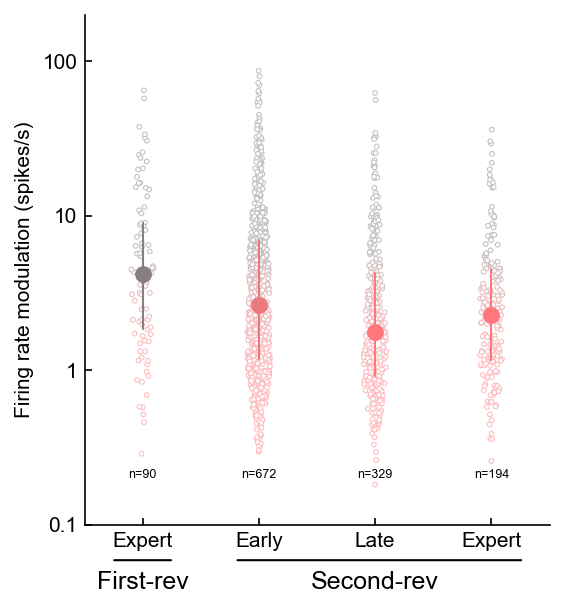

In [31]:
#Firing rate modulation graph (Olivia only)

size=5

fig, ax = plt.subplots(figsize=(4,4.5))

data = [FRmod_postexpert,FRmod_secondearly,FRmod_secondlate,FRmod_secondexpert]
data = [np.abs(column[np.isfinite(column)]) for column in data]

labels = ['Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=0.5,zorder=-10)
ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    eye_color=NCR_CR_cmap((percentCR-40)/20)
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)

    border_color=colorsys.hls_to_rgb(h,l*1,s)
    
    summary_size=50
    summary_width=1
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    
    ax.scatter([idx], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    print(median)



ax.set_ylim([0.1,200])
ax.set_yticks([0.1,1,10,100])
ax.set_yticklabels(['0.1','1','10','100'])
ax.set_ylabel('Firing rate modulation (spikes/s)')

ax.set_xlim([-0.5,3.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)
#ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')
#ax.axvline(2.5,c=SWITCH_COLOR,linestyle='--',lw=1)

ax.text(0,0.2,f"n={len(ilep.rmnan(FRmod_postexpert))}",fontsize=6,horizontalalignment='center')
ax.text(1,0.2,f"n={len(ilep.rmnan(FRmod_secondearly))}",fontsize=6,horizontalalignment='center')
ax.text(2,0.2,f"n={len(ilep.rmnan(FRmod_secondlate))}",fontsize=6,horizontalalignment='center')
ax.text(3,0.2,f"n={len(ilep.rmnan(FRmod_secondexpert))}",fontsize=6,horizontalalignment='center')


#NORMAL
ax.text(ax.get_xticks()[0],0.05, 'First-rev', ha='center', va='top',  fontsize=12)
ax.annotate('', xy=(0.055, -0.07), xycoords='axes fraction', xytext=(0.195, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.text(ax.get_xticks()[2],0.05, 'Second-rev', ha='center', va='top',  fontsize=12)
ax.annotate('', xy=(0.32, -0.07), xycoords='axes fraction', xytext=(0.948, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

#fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\SecondaryAnalysis','Secondary reversal firing rate modulation Olivia only.pdf'),transparent=False,facecolor="white")
#fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\SecondaryAnalysis','Secondary reversal firing rate modulation Olivia only.PNG'),transparent=False,facecolor="white")

Statistics

In [32]:
data = SimpleNamespace()
data.secondearly = np.abs(FRmod_secondearly)
data.secondlate = np.abs(FRmod_secondlate)
data.secondexpert = np.abs(FRmod_secondexpert)

In [32]:
phase = len(data.secondearly)*["second-late"] + len(data.secondlate)*["second-late"] \
	        + len(data.secondearly)*["second-expert"] + len(data.secondexpert)*["second-expert"]

In [33]:
	context = len(data.secondearly)*["baseline"] + len(data.secondlate)*["experimental"] \
	        + len(data.secondearly)*["baseline"] + len(data.secondexpert)*["experimental"]


In [34]:
	mod = (np.concatenate([data.secondearly, data.secondlate,
			data.secondearly, data.secondexpert]))


In [35]:
	df = pd.DataFrame({"phase": phase, "context": context, "FR_mod": mod})

In [36]:
	### Anova ###
	anova = pg.anova(data=df, dv='FR_mod', between=['phase','context'], detailed=True)
	print(anova)




            Source             SS      DF           MS          F     p-unc  \
0            phase       1.926162     1.0     1.926162   0.019775  0.888183   
1          context    2165.157915     1.0  2165.157915  22.228605  0.000003   
2  phase * context       5.303178     1.0     5.303178   0.054445  0.815527   
3         Residual  181463.890873  1863.0    97.404128        NaN       NaN   

        np2  
0  0.000011  
1  0.011791  
2  0.000029  
3       NaN  


In [37]:
	### Create and print results ###
	pairwise_mwu = pg.pairwise_tests(data=df, dv='FR_mod', between=['phase','context'], padjust="fdr_bh", parametric=False, )
	print(pairwise_mwu[pairwise_mwu["Contrast"] == "phase * context"][["phase","A", "B", "p-unc", "p-corr", "hedges"]])

           phase         A             B     p-unc    p-corr    hedges
2  second-expert  baseline  experimental  0.025116  0.025116  0.257399
3    second-late  baseline  experimental  0.000011  0.000023  0.235811


In [30]:
#Shift in responsiveness
# FRmod_postexpert_pc = np.nanmean(np.greater(FRmod_postexpert,FRmod_baseline_median))

# FRmod_preswitch_pc = np.nanmean(np.greater(FRmod_preswitch,FRmod_baseline_median))
# FRmod_postswitch_pc = np.nanmean(np.greater(FRmod_postswitch,FRmod_baseline_median))

# FRmod_secondearly_pc = np.nanmean(np.greater(FRmod_secondearly,FRmod_baseline_median))
# FRmod_secondlate_pc = np.nanmean(np.greater(FRmod_secondlate,FRmod_baseline_median))
# FRmod_secondexpert_pc = np.nanmean(np.greater(FRmod_secondexpert,FRmod_baseline_median))

meta NOT subset; don't know how to subset; dropped


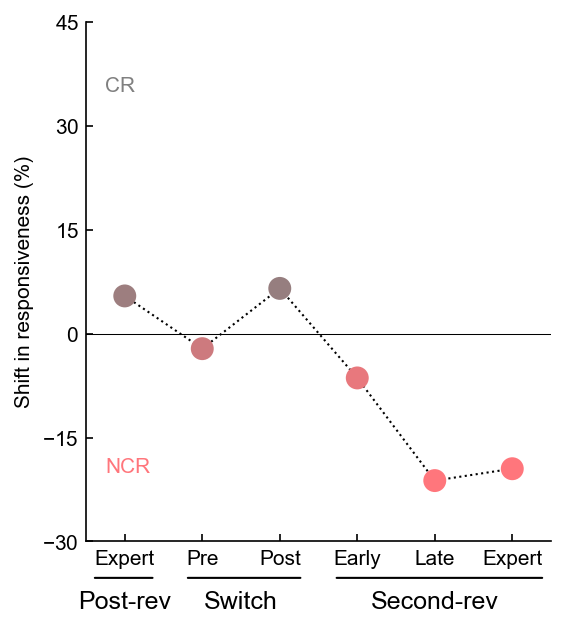

In [31]:
# fig, ax = plt.subplots(figsize=(4,4.5))
# percentCR = np.array([FRmod_postexpert_pc,FRmod_preswitch_pc,FRmod_postswitch_pc,FRmod_secondearly_pc,FRmod_secondlate_pc,FRmod_secondexpert_pc])*100
# labels = ['Expert','Pre','Post','Early','Late','Expert']

# numCon = len(labels)
# ax.plot([0,1,2,3,4,5],(percentCR-50),color='k',linestyle=':',lw=1,alpha=1)

# color=NCR_CR_cmap((percentCR-40)/20)
# ax.scatter(range(numCon),(percentCR-50),c=color,s=100,zorder=10)


# ax.axhline(0,c='k',linestyle='-',lw=0.5,zorder=-10)
# xlims = [-0.5,numCon-0.5]
# ax.set_xlim(xlims)
# ax.set_xticks(range(numCon))
# ax.set_xticklabels(labels)

# #All cells with All Cells baseline
# ax.set_ylabel('Shift in responsiveness (%)')
# ax.set_ylim([-30,45])
# ax.set_yticks([-30,-15,0,15,30, 45])
# ax.text(-0.25,35,'CR',color=CR_COLOR)
# ax.text(-0.25,-20,'NCR',color=NCR_COLOR)

# ax.text(ax.get_xticks()[0],-37, 'Post-rev', ha='center', va='top',  fontsize=12)
# ax.annotate('', xy=(0.01, -0.07), xycoords='axes fraction', xytext=(0.152, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
# ax.text(ax.get_xticks()[1]+0.5,-37, 'Switch', ha='center', va='top',  fontsize=12)
# ax.annotate('', xy=(0.21, -0.07), xycoords='axes fraction', xytext=(0.47, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
# ax.text(ax.get_xticks()[4],-37, 'Second-rev', ha='center', va='top',  fontsize=12)
# ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
# fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\SecondaryAnalysis','Secondary reversal shift in responsiveness.pdf'),transparent=False,facecolor="white")
# fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\SecondaryAnalysis','Secondary reversal shift in responsiveness.PNG'),transparent=False,facecolor="white")

Include post reversal from regular experiments

In [31]:
animals = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19']

../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scala

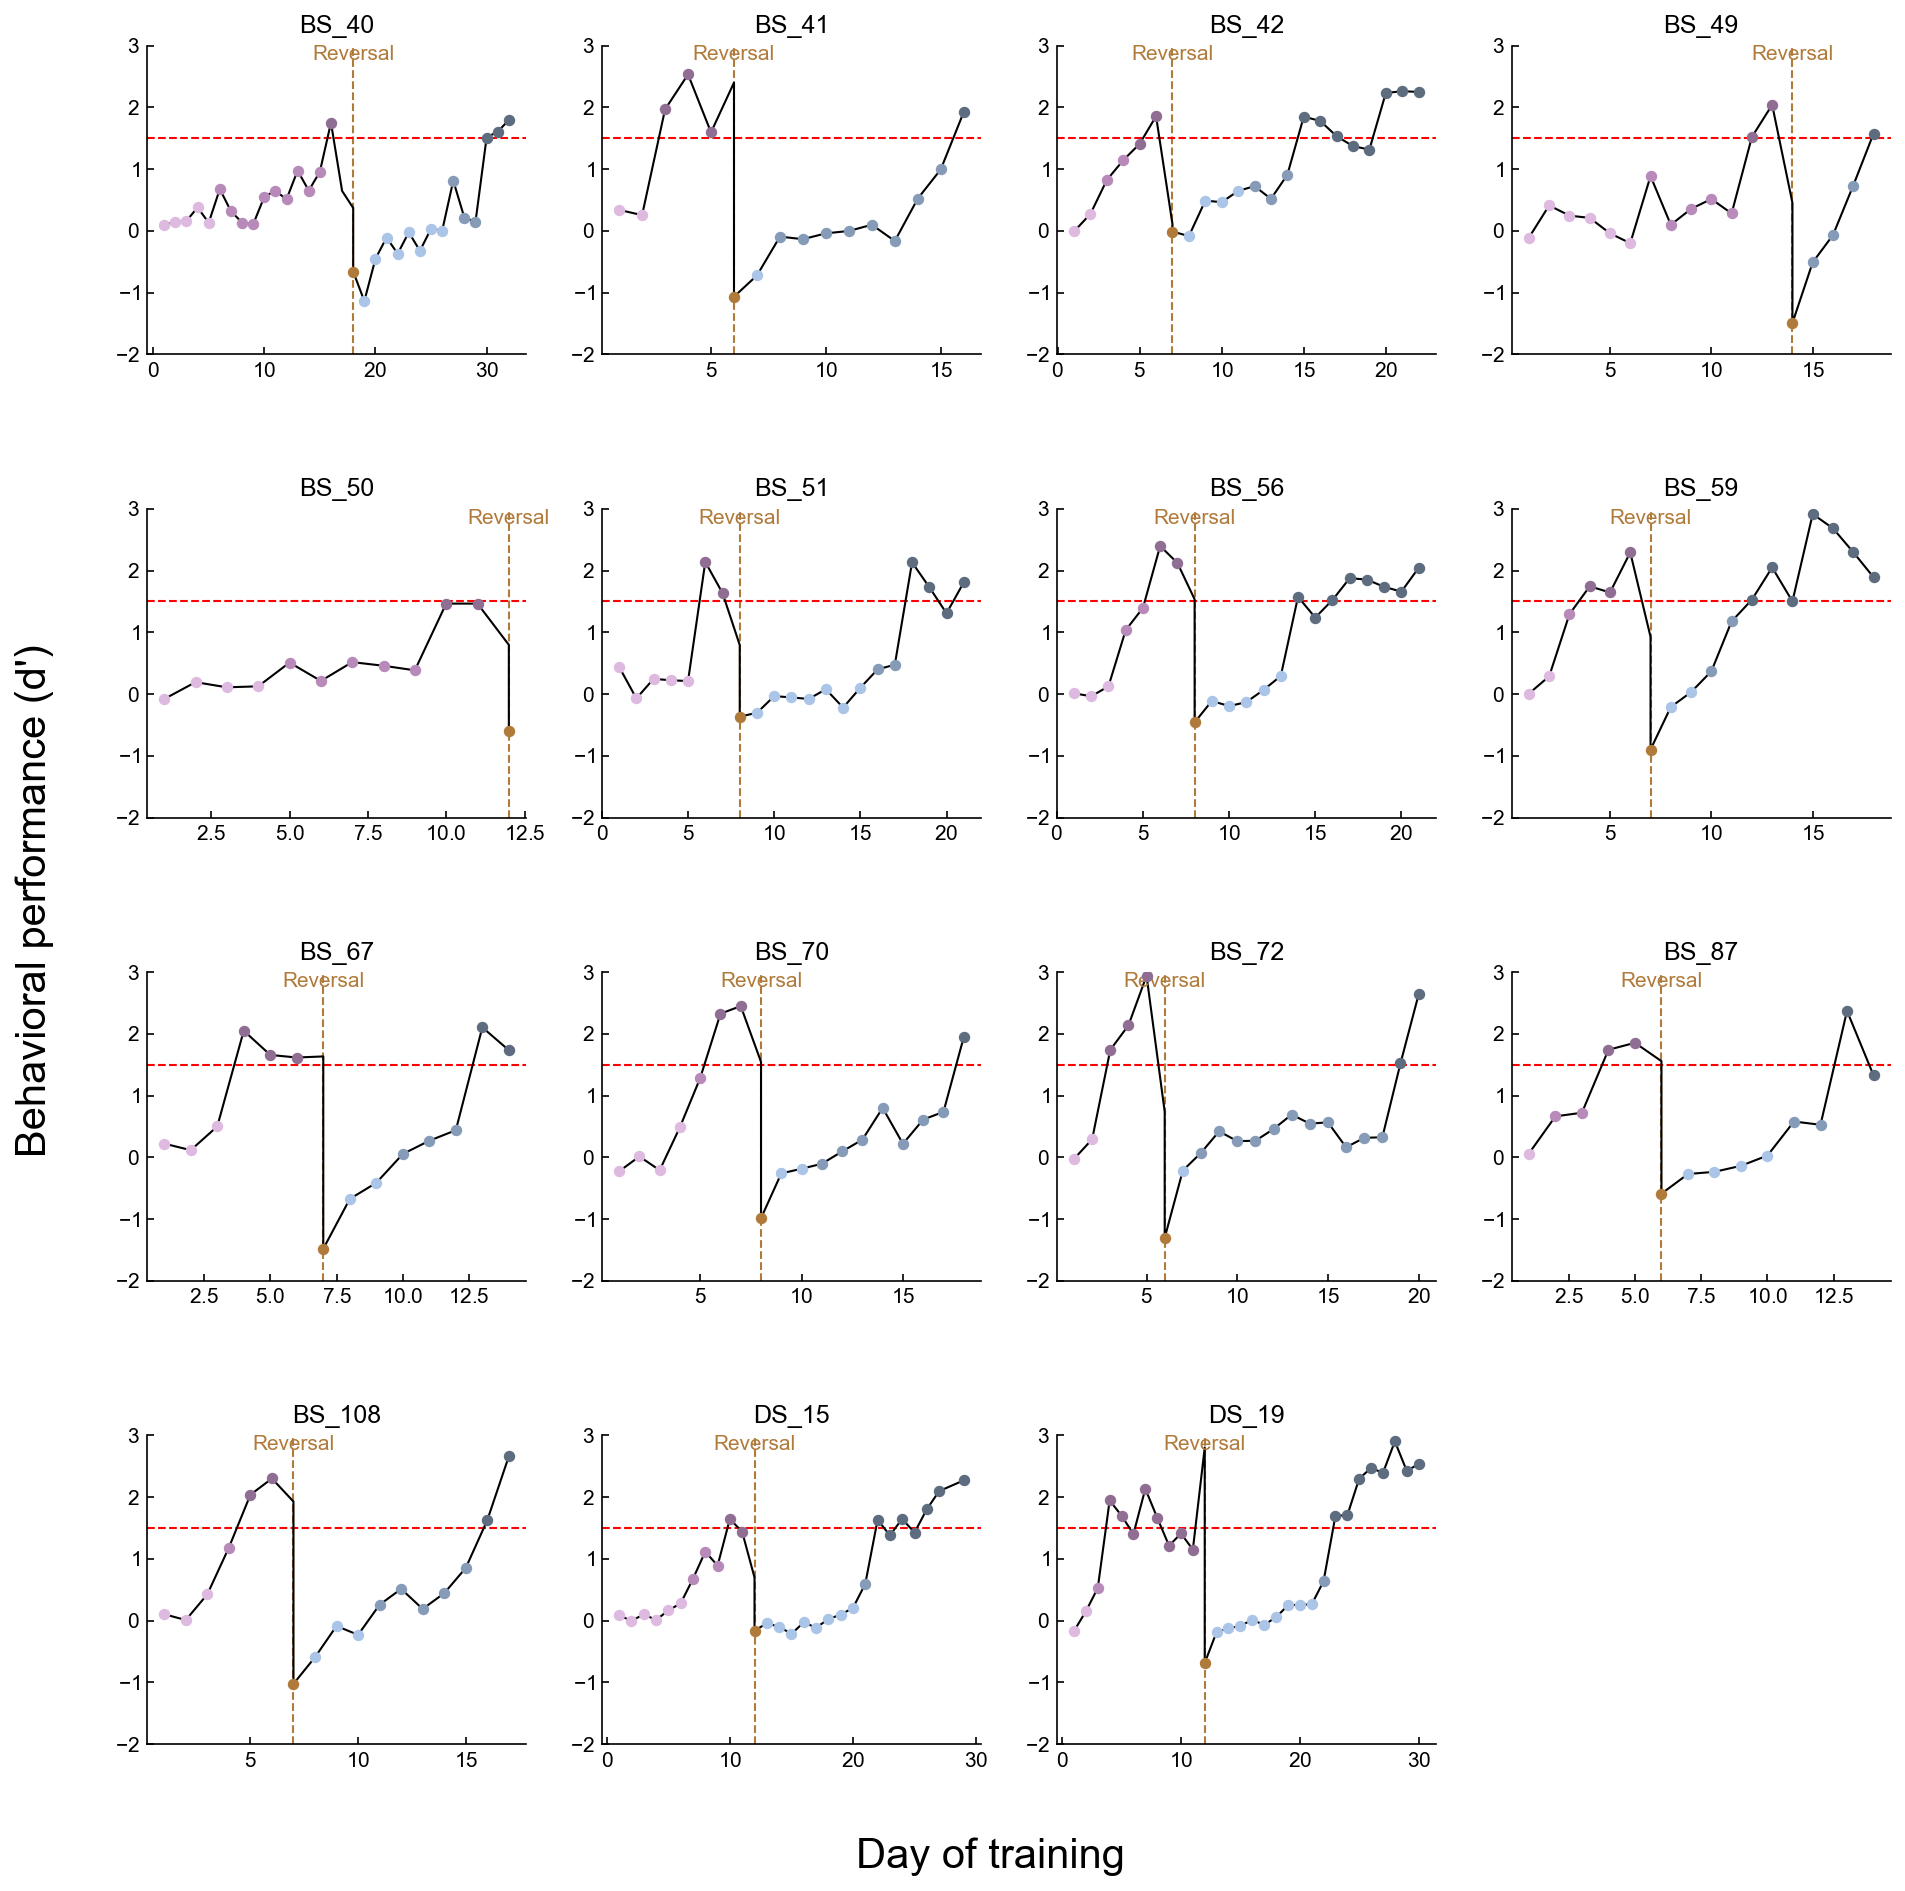

In [32]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(animals,animalBehaviors,plot=True)

In [33]:
EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in animals:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSession.append(session)
        EnumClust.append(clust)

100%|██████████| 740/740 [00:09<00:00, 76.12it/s] 


In [34]:
animals

['BS_40',
 'BS_41',
 'BS_42',
 'BS_49',
 'BS_50',
 'BS_51',
 'BS_56',
 'BS_59',
 'BS_67',
 'BS_70',
 'BS_72',
 'BS_87',
 'BS_108',
 'DS_15',
 'DS_19']

In [35]:
EILphases = np.full_like(EnumSession,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSession)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
            EILphases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
            EILphases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
            EILphases[idx] = 'post expert'         
            
            
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 1829/1829 [00:31<00:00, 57.92it/s] 

errors for: []


In [36]:
FRmod_preearly = []
FRmod_prelate = []
FRmod_preexpert = []
FRmod_postearly = []
FRmod_postlate = []
FRmod_postexpert = []
FRmod_postexpert_regular = []

preearly_animals = []
prelate_animals = []
preexpert_animals = []
postearly_animals = []
postlate_animals = []
postexpert_animals = []

cellstouseFR = 'all cells'

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    #Currently not active as tuning curve animals have not been decoded
    if cellstouseFR == 'task encoders':
        if not np.isfinite(accuracies[idx]) or pvals[idx] > 0.05 or accuracies[idx] < task_encoder_threshold:
            continue
            
    if not clust in sessionfile.responsiveness: #Disregard cells that don't work. Not ideal but it works
        continue
        
    if sessionfile.responsiveness[clust]['all_trials'].FR < sessionfile.responsiveness[clust]['all_trials'].FRbaseline:
        #print('excluded')
        #continue
        pass
    
    if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
    
    if EILphases[idx] == 'pre early':
        FRmod_preearly.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        preearly_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'pre late':
        FRmod_prelate.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        prelate_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'pre expert':
        FRmod_preexpert.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        preexpert_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post early':
        FRmod_postearly.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        postearly_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post late':
        FRmod_postlate.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        postlate_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post expert':
        FRmod_postexpert.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        FRmod_postexpert_regular.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        postexpert_animals.append(sessionfile.meta.animal)


FRmod_preearly = np.array(FRmod_preearly)
FRmod_prelate = np.array(FRmod_prelate)
FRmod_preexpert = np.array(FRmod_preexpert)
FRmod_postearly = np.array(FRmod_postearly)
FRmod_postlate = np.array(FRmod_postlate)
FRmod_postexpert = np.array(FRmod_postexpert)

1829it [00:32, 56.94it/s] 


In [37]:
FRmod_baseline_median = 3.5
print('baseline: '+str(FRmod_baseline_median))

#These numbers are essentially %CR
FRmod_preearly_pc = np.mean(np.greater(ilep.rmnan(FRmod_preearly),FRmod_baseline_median))
FRmod_prelate_pc = np.mean(np.greater(ilep.rmnan(FRmod_prelate),FRmod_baseline_median))
FRmod_preexpert_pc = np.mean(np.greater(ilep.rmnan(FRmod_preexpert),FRmod_baseline_median))
FRmod_postearly_pc = np.mean(np.greater(ilep.rmnan(FRmod_postearly),FRmod_baseline_median))
FRmod_postlate_pc = np.mean(np.greater(ilep.rmnan(FRmod_postlate),FRmod_baseline_median))
FRmod_postexpert_pc = np.mean(np.greater(ilep.rmnan(FRmod_postexpert),FRmod_baseline_median))
print(FRmod_preearly_pc)
print(FRmod_prelate_pc)
print(FRmod_preexpert_pc)
print(FRmod_postearly_pc)
print(FRmod_postlate_pc)
print(FRmod_postexpert_pc)




baseline: 3.5
0.5067567567567568
0.39037433155080214
0.4845360824742268
0.4869281045751634
0.35964912280701755
0.3724696356275304


In [38]:
FRmod_secondearly_pc = np.mean(np.greater(ilep.rmnan(FRmod_secondearly),FRmod_baseline_median))
FRmod_secondlate_pc = np.mean(np.greater(ilep.rmnan(FRmod_secondlate),FRmod_baseline_median))
FRmod_secondexpert_pc = np.mean(np.greater(ilep.rmnan(FRmod_secondexpert),FRmod_baseline_median))
print(FRmod_secondearly_pc)
print(FRmod_secondlate_pc)
print(FRmod_secondexpert_pc)

0.43154761904761907
0.2948328267477204
0.31443298969072164


Shift in responsiveness

In [39]:
# #New figure (no Olivia's first post reversal data)
# fig, ax = plt.subplots(figsize=(5,4.5))
# labels = ['Early','Late','Expert']

# firstcolor = ['#B9D3F7','#5181C2','#3C557A']
# secondcolor = ['#E2CAE3','#C27AC5','#764979']
# #color=NCR_CR_cmap((percentCR-40)/20)
# first_percentCR = np.array([FRmod_postearly_pc,FRmod_postlate_pc,FRmod_postexpert_pc])*100
# second_percentCR = np.array([FRmod_secondearly_pc,FRmod_secondlate_pc,FRmod_secondexpert_pc])*100
# numCon = len(labels)

# print(first_percentCR)

# ax.plot([0,1,2],(first_percentCR-FRmod_preearly_pc*100),color='k',linestyle=':',lw=1,alpha=1)
# ax.scatter([0,1,2],(first_percentCR-FRmod_preearly_pc*100),c=firstcolor,s=50,zorder=10,marker='o',lw=1)

# ax.plot([0,1,2],(second_percentCR-FRmod_preearly_pc*100),color='k',linestyle=':',lw=1,alpha=1)
# ax.scatter([0,1,2],(second_percentCR-FRmod_preearly_pc*100),color='white',ec=secondcolor,s=50,zorder=10,marker='o',lw=1)

# xlims = [-0.75,numCon-0.25]
# ax.set_xlim(xlims)
# ax.set_xticks(range(numCon))
# ax.set_xticklabels(labels)

# #All cells with All Cells baseline
# ax.set_ylabel('Shift in responsiveness (%)')
# ax.set_ylim([-30,20])
# ax.set_yticks([-30,-20,-10,0,10,20])
# ax.text(-0.5,17.5,'CR',color=CR_COLOR)
# ax.text(-0.5,-27.5,'NCR',color=NCR_COLOR)

# ax.axhline(0,c='k',linestyle='-',lw=0.5,zorder=-10)

# ax.scatter([],[],fc='grey',ec='grey',s=50,marker='o',lw=1,label='First reversal')
# ax.scatter([],[],fc='white',ec='grey',s=50,marker='o',lw=1,label='Second reversal')
# ax.legend(frameon=False,loc=(1,0.85))

# # xtick_pos_pre = ax.get_xticks()[1]
# # xtick_pos_post = ax.get_xticks()[4]
# # Yval = ilep.getPrePostLabelYval(ax.get_ylim())+1
# # t1 = ax.text(xtick_pos_pre, Yval, 'First-rev', ha='center', va='top', fontsize=12,color='k')
# # t2 = ax.text(xtick_pos_post, Yval, 'Second-rev', ha='center', va='top',  fontsize=12,color='k')
# #ax.annotate('', xy=(0.07, -0.07), xycoords='axes fraction', xytext=(0.48, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
# #ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.94, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

# plt.tight_layout()
# #fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\SecondaryAnalysis','Shift in responsiveness first(no OL) vs. second reversal.pdf'),transparent=False,facecolor="white")
# #fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\SecondaryAnalysis','Shift in responsiveness first(no Ol) vs. second reversal.PNG'),transparent=False,facecolor="white")

In [40]:
# #Old figure
# fig, ax = plt.subplots(figsize=(5,4.5))
# labels = ['Early','Late','Expert','Early','Late','Expert']
# color = ['#B9D3F7','#5181C2','#3C557A','#E2CAE3','#C27AC5','#764979']
# #color=NCR_CR_cmap((percentCR-40)/20)
# percentCR = np.array([FRmod_postearly_pc,FRmod_postlate_pc,FRmod_postexpert_pc,FRmod_secondearly_pc,FRmod_secondlate_pc,FRmod_secondexpert_pc])*100
# numCon = len(labels)

# ax.plot([0,1,2,3,4,5],(percentCR-FRmod_preearly_pc*100),color='k',linestyle=':',lw=1,alpha=1)

# ax.scatter([0,1,2,3,4,5],(percentCR-FRmod_preearly_pc*100),c=color,s=50,zorder=10,marker='o',lw=1)


# xlims = [-0.75,numCon-0.25]
# ax.set_xlim(xlims)
# ax.set_xticks(range(numCon))
# ax.set_xticklabels(labels)

# #All cells with All Cells baseline
# ax.set_ylabel('Shift in responsiveness (%)')
# ax.set_ylim([-30,20])
# ax.set_yticks([-30,-20,-10,0,10,20])
# ax.text(-0.5,17.5,'CR',color=CR_COLOR)
# ax.text(-0.5,-17.5,'NCR',color=NCR_COLOR)

# ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)
# ax.axhline(0,c='k',linestyle='-',lw=0.5,zorder=-10)

# ax.scatter([],[],fc='grey',ec='grey',s=50,marker='o',lw=1)

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# Yval = ilep.getPrePostLabelYval(ax.get_ylim())+1
# t1 = ax.text(xtick_pos_pre, Yval, 'Post-rev', ha='center', va='top', fontsize=12,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Second-rev', ha='center', va='top',  fontsize=12,color='k')
# ax.annotate('', xy=(0.07, -0.07), xycoords='axes fraction', xytext=(0.48, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.94, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
# ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')
# fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\SecondaryAnalysis','Shift in responsiveness post vs second reversal.pdf'),transparent=False,facecolor="white")
# fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\SecondaryAnalysis','Shift in responsiveness post vs second reversal.PNG'),transparent=False,facecolor="white")

In [39]:
FRmod_postexpert_Olivia_np = np.array(FRmod_postexpert_Olivia)

In [40]:
FRmod_postexpert_regular_np = np.array(FRmod_postexpert_regular)

In [41]:
FRmod_postexpert_total = np.concatenate((FRmod_postexpert_regular_np,FRmod_postexpert_Olivia_np))

In [42]:
# Disable non-2-rev animals
FRmod_postexpert_total = np.copy(FRmod_postexpert_Olivia_np)

# Load Passive Data

In [43]:
animals_in_cache = []

EnumPASession = []
EnumPAClust = []

for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.animal not in ['TH_201','TH_203','LA_204','LA_205','TH_200', 'TH_230','AE_229','TH_233','TH_234']:
        continue
    
    animals_in_cache.append(sessionfile.meta.animal)
    
    for clust in sessionfile.clusters.good:
        if sessionfile.meta.region == "AC":
            EnumPASession.append(session)
            EnumPAClust.append(clust)
        
animals_in_cache = np.unique(animals_in_cache)

100%|██████████| 740/740 [00:09<00:00, 74.77it/s] 


In [44]:
#Define 6 learning phases(days)
pre_early = 4
pre_late = 6
pre_expert = 8
post_early = 12
post_late = 15
post_expert = 16

#
FRmod_passive_preearly = []
FRmod_passive_prelate = []
FRmod_passive_preexpert = []
FRmod_passive_postearly = []
FRmod_passive_postlate = []
FRmod_passive_postexpert = []

#
preexpert_session_num = []
postlate_session_num = []
postexpert_session_num = []


In [45]:
preearly_passive_animal = []
prelate_passive_animal = []
preexpert_passive_animal = []
postearly_passive_animal = []
postlate_passive_animal = []
postexpert_passive_animal = []


for idx,(session,clust) in tqdm(enumerate(zip(EnumPASession,EnumPAClust))):
    ACsessionfile = ilep.loadSessionCached(act_directory,session)
    
    #1,2,3,4
    if ACsessionfile.meta.day_of_training <= pre_early:
        FRmod_passive_preearly.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        preearly_passive_animal.append(ACsessionfile.meta.animal)
        
        
    #5,6
    if ACsessionfile.meta.day_of_training <= pre_late and ACsessionfile.meta.day_of_training >pre_early:
        FRmod_passive_prelate.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        prelate_passive_animal.append(ACsessionfile.meta.animal)
    
    #7,8
    if ACsessionfile.meta.day_of_training <= pre_expert and ACsessionfile.meta.day_of_training >pre_late:
        FRmod_passive_preexpert.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        preexpert_session_num.append(ACsessionfile.meta.files)
        preexpert_passive_animal.append(ACsessionfile.meta.animal)
        
    #9,10,11,12
    if ACsessionfile.meta.day_of_training <= post_early and ACsessionfile.meta.day_of_training >pre_expert:
        FRmod_passive_postearly.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        postearly_passive_animal.append(ACsessionfile.meta.animal)

    #13,14,15
    if ACsessionfile.meta.day_of_training <= post_late and ACsessionfile.meta.day_of_training >post_early:
        FRmod_passive_postlate.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        postlate_session_num.append(ACsessionfile.meta.files)
        postlate_passive_animal.append(ACsessionfile.meta.animal)
    
    #16,17,18,19,20,21
    if ACsessionfile.meta.day_of_training >= post_expert:
        FRmod_passive_postexpert.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        postexpert_session_num.append(ACsessionfile.meta.files)
        postexpert_passive_animal.append(ACsessionfile.meta.animal)
    

1442it [00:14, 101.17it/s]


In [46]:
#number of animals in each learning phase

preearly_passive_animal = np.unique(preearly_passive_animal)
prelate_passive_animal = np.unique(prelate_passive_animal)
preexpert_passive_animal = np.unique(preexpert_passive_animal)
postearly_passive_animal = np.unique(postearly_passive_animal)
postlate_passive_animal = np.unique(postlate_passive_animal)
postexpert_passive_animal = np.unique(postexpert_passive_animal)

preearly_passive_animal_num = len(preearly_passive_animal)
prelate_passive_animal_num = len(prelate_passive_animal)
preexpert_passive_animal_num = len(preexpert_passive_animal)
postearly_passive_animal_num = len(postearly_passive_animal)
postlate_passive_animal_num = len(postlate_passive_animal)
postexpert_passive_animal_num = len(postexpert_passive_animal)

In [47]:
FRmod_passive_preearly = np.array(FRmod_passive_preearly)
FRmod_passive_prelate = np.array(FRmod_passive_prelate)
FRmod_passive_preexpert = np.array(FRmod_passive_preexpert)
FRmod_passive_postearly = np.array(FRmod_passive_postearly)
FRmod_passive_postlate = np.array(FRmod_passive_postlate)
FRmod_passive_postexpert = np.array(FRmod_passive_postexpert)

In [48]:
print('loaded')

loaded


# Final figures: 

### V1

2.9452036112702173
2.7736091174039768
1.7755316267100065
2.272134645016001


C:\Users\insan\AppData\Local\Temp\ipykernel_15280\1278633744.py:15: RuntimeWarning: divide by zero encountered in log10
  X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)


Text(0.948, -0.07, '')

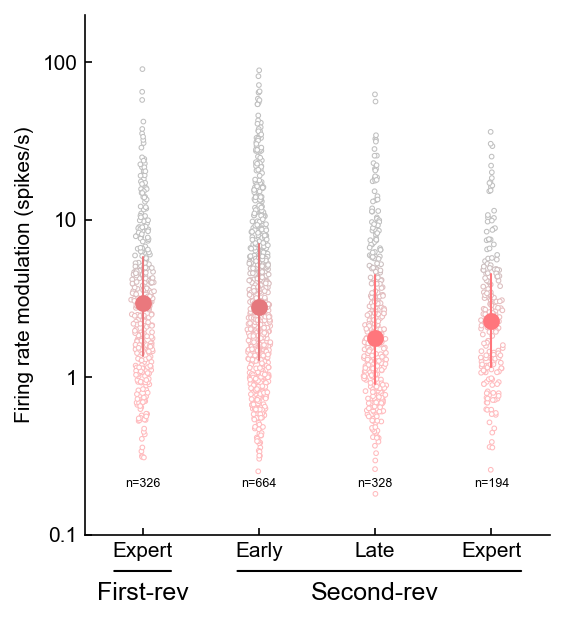

In [66]:
#Firing rate modulation graph all data(Olivia + Regular)

size=5

fig, ax = plt.subplots(figsize=(4,4.5))

data = [FRmod_postexpert_total,FRmod_secondearly,FRmod_secondlate,FRmod_secondexpert]
data = [np.abs(column[np.isfinite(column)]) for column in data]

labels = ['Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=0.5,zorder=-10)
ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    eye_color=NCR_CR_cmap((percentCR-40)/20)
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)

    border_color=colorsys.hls_to_rgb(h,l*1,s)
    
    summary_size=50
    summary_width=1
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    
    ax.scatter([idx], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    print(median)



ax.set_ylim([0.1,200])
ax.set_yticks([0.1,1,10,100])
ax.set_yticklabels(['0.1','1','10','100'])
ax.set_ylabel('Firing rate modulation (spikes/s)')

ax.set_xlim([-0.5,3.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)
#ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')
#ax.axvline(2.5,c=SWITCH_COLOR,linestyle='--',lw=1)

ax.text(0,0.2,f"n={len(ilep.rmnan(FRmod_postexpert_total))}",fontsize=6,horizontalalignment='center')
ax.text(1,0.2,f"n={len(ilep.rmnan(FRmod_secondearly))}",fontsize=6,horizontalalignment='center')
ax.text(2,0.2,f"n={len(ilep.rmnan(FRmod_secondlate))}",fontsize=6,horizontalalignment='center')
ax.text(3,0.2,f"n={len(ilep.rmnan(FRmod_secondexpert))}",fontsize=6,horizontalalignment='center')


#NORMAL
ax.text(ax.get_xticks()[0],0.05, 'First-rev', ha='center', va='top',  fontsize=12)
ax.annotate('', xy=(0.055, -0.07), xycoords='axes fraction', xytext=(0.195, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.text(ax.get_xticks()[2],0.05, 'Second-rev', ha='center', va='top',  fontsize=12)
ax.annotate('', xy=(0.32, -0.07), xycoords='axes fraction', xytext=(0.948, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

#fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\SecondaryAnalysis','Secondary reversal firing rate modulation.pdf'),transparent=False,facecolor="white")



### V2

<ipython-input-38-7c4539856606>:15: RuntimeWarning: divide by zero encountered in log10
  X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.75,minjitter=0.075)


2.8965517241379257
2.7736091174039768
1.7755316267100065
2.272134645016001


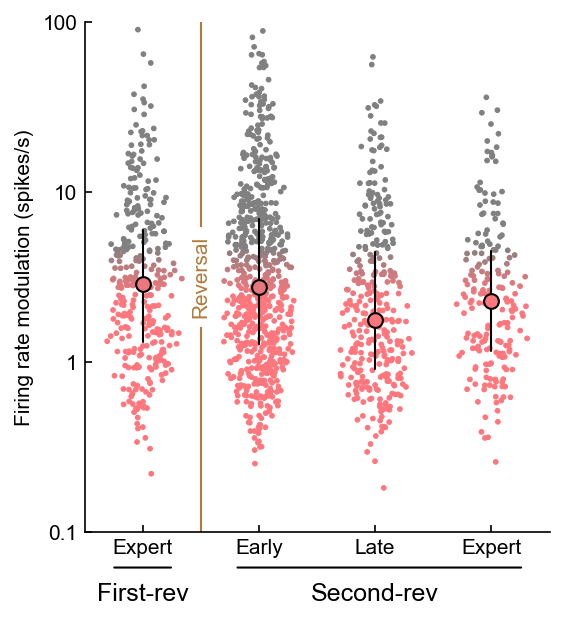

In [38]:
#Firing rate modulation graph all data(Olivia + Regular)

size=5

fig, ax = plt.subplots(figsize=(4,4.5))

data = [FRmod_postexpert_total,FRmod_secondearly,FRmod_secondlate,FRmod_secondexpert]
data = [np.abs(column[np.isfinite(column)]) for column in data]

labels = ['Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.75,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.75,minjitter=0.075)
#colors = NCR_CR_cmap((Y-1)/5)
mn = 3.5
spread = 2.5
colors = NCR_CR_cmap( (Y-(mn-spread/2))/ (spread) )

ax.scatter(X, Y, s=size, ec=colors, fc=colors, lw=0.5,zorder=-10)
ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    eye_color=NCR_CR_cmap((percentCR-40)/20)
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)

    border_color='k'#colorsys.hls_to_rgb(h,l*1,s)
    
    summary_size=50
    summary_width=1
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    
    ax.scatter([idx], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    print(median)



ax.set_ylim([0.1,100])
ax.set_yticks([0.1,1,10,100])
ax.set_yticklabels(['0.1','1','10','100'])
ax.set_ylabel('Firing rate modulation (spikes/s)')

ax.set_xlim([-0.5,3.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

#ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)
#ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')
#ax.axvline(2.5,c=SWITCH_COLOR,linestyle='--',lw=1)

size = 5
rev = 0.5
center = 10**(0.5)#center = np.mean(ax.get_ylim())
ax.text(rev,center,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center',rotation=90)
ax.plot([rev,rev],[ax.get_ylim()[0],center/2],color=SWITCH_COLOR,lw=1,linestyle='-')
ax.plot([rev,rev],[center*2,ax.get_ylim()[1]],color=SWITCH_COLOR,lw=1,linestyle='-')

# ax.text(0,0.2,f"n={len(ilep.rmnan(FRmod_postexpert_total))}",fontsize=6,horizontalalignment='center')
# ax.text(1,0.2,f"n={len(ilep.rmnan(FRmod_secondearly))}",fontsize=6,horizontalalignment='center')
# ax.text(2,0.2,f"n={len(ilep.rmnan(FRmod_secondlate))}",fontsize=6,horizontalalignment='center')
# ax.text(3,0.2,f"n={len(ilep.rmnan(FRmod_secondexpert))}",fontsize=6,horizontalalignment='center')


#NORMAL
ax.text(ax.get_xticks()[0],0.05, 'First-rev', ha='center', va='top',  fontsize=12)
ax.annotate('', xy=(0.055, -0.07), xycoords='axes fraction', xytext=(0.195, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.text(ax.get_xticks()[2],0.05, 'Second-rev', ha='center', va='top',  fontsize=12)
ax.annotate('', xy=(0.32, -0.07), xycoords='axes fraction', xytext=(0.948, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

#fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\SecondaryAnalysis','Secondary reversal firing rate modulation.pdf'),transparent=False,facecolor="white")
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC FRmodulation all cells secondary reversal V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

### V3

<ipython-input-41-17094844d3e5>:15: RuntimeWarning: divide by zero encountered in log10
  X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.75,minjitter=0.075)


2.8965517241379257
2.7736091174039768
1.7755316267100065
2.272134645016001


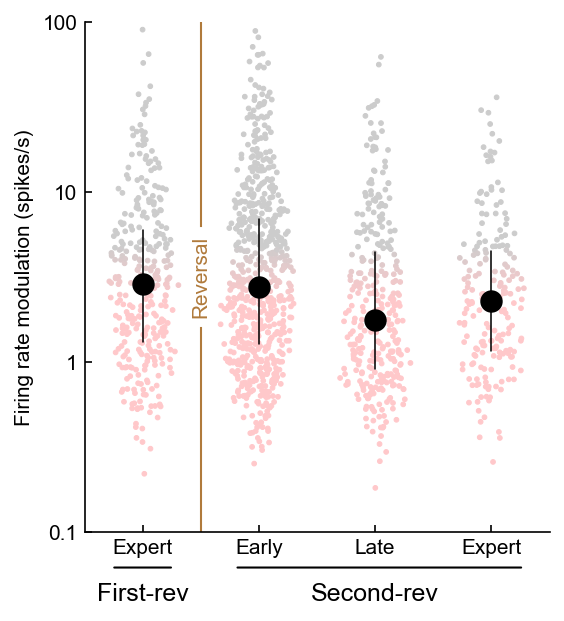

In [41]:
#Firing rate modulation graph all data(Olivia + Regular)

size=5

fig, ax = plt.subplots(figsize=(4,4.5))

data = [FRmod_postexpert_total,FRmod_secondearly,FRmod_secondlate,FRmod_secondexpert]
data = [np.abs(column[np.isfinite(column)]) for column in data]

labels = ['Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.75,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.75,minjitter=0.075)
#colors = NCR_CR_cmap((Y-1)/5)
mn = 3.5
spread = 2.5
colors = NCR_CR_cmap( (Y-(mn-spread/2))/ (spread) )

ax.scatter(X, Y, s=size, ec=colors, fc=colors, lw=0.5,zorder=-10)
ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    eye_color=NCR_CR_cmap((percentCR-40)/20)
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)

    eye_color='k'
    border_color='k'#colorsys.hls_to_rgb(h,l*1,s)
    
    summary_size=100
    summary_width=0.75
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    
    ax.scatter([idx], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    print(median)



ax.set_ylim([0.1,100])
ax.set_yticks([0.1,1,10,100])
ax.set_yticklabels(['0.1','1','10','100'])
ax.set_ylabel('Firing rate modulation (spikes/s)')

ax.set_xlim([-0.5,3.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.6,zorder=-5)
#ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')
#ax.axvline(2.5,c=SWITCH_COLOR,linestyle='--',lw=1)

size = 5
rev = 0.5
center = 10**(0.5)#center = np.mean(ax.get_ylim())
ax.text(rev,center,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center',rotation=90)
ax.plot([rev,rev],[ax.get_ylim()[0],center/2],color=SWITCH_COLOR,lw=1,linestyle='-')
ax.plot([rev,rev],[center*2,ax.get_ylim()[1]],color=SWITCH_COLOR,lw=1,linestyle='-')

# ax.text(0,0.2,f"n={len(ilep.rmnan(FRmod_postexpert_total))}",fontsize=6,horizontalalignment='center')
# ax.text(1,0.2,f"n={len(ilep.rmnan(FRmod_secondearly))}",fontsize=6,horizontalalignment='center')
# ax.text(2,0.2,f"n={len(ilep.rmnan(FRmod_secondlate))}",fontsize=6,horizontalalignment='center')
# ax.text(3,0.2,f"n={len(ilep.rmnan(FRmod_secondexpert))}",fontsize=6,horizontalalignment='center')


#NORMAL
ax.text(ax.get_xticks()[0],0.05, 'First-rev', ha='center', va='top',  fontsize=12)
ax.annotate('', xy=(0.055, -0.07), xycoords='axes fraction', xytext=(0.195, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.text(ax.get_xticks()[2],0.05, 'Second-rev', ha='center', va='top',  fontsize=12)
ax.annotate('', xy=(0.32, -0.07), xycoords='axes fraction', xytext=(0.948, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

#fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\SecondaryAnalysis','Secondary reversal firing rate modulation.pdf'),transparent=False,facecolor="white")
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC FRmodulation all cells secondary reversal V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

### V4

<ipython-input-49-feb8dea44329>:44: RuntimeWarning: divide by zero encountered in log10
  X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data[1:4])),width=0.75,minjitter=0.075)


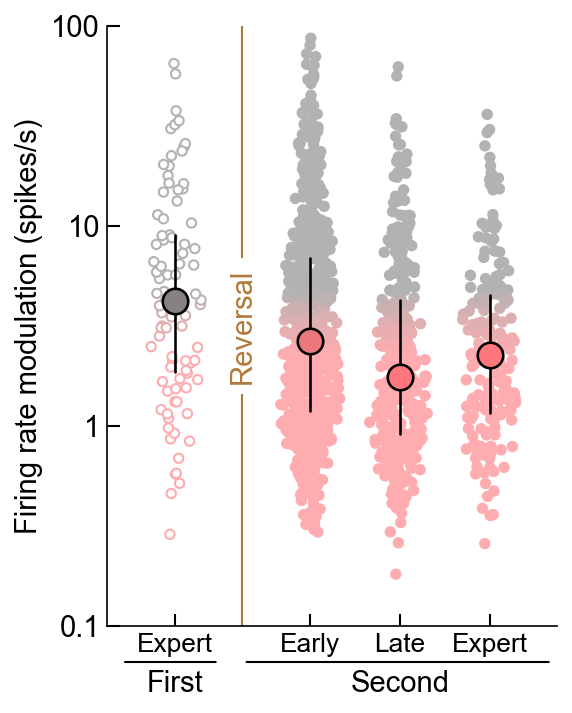

In [49]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mn = 3.5
spread = 2.5
    
###
    
FRmod_baseline_median = 3.5
data = [FRmod_postexpert_total,FRmod_secondearly,FRmod_secondlate,FRmod_secondexpert]
data = [ilep.rmnan(column) for column in data]
labels = ['Expert','Early','Late','Expert']
numCon = len(data)

###

X = [np.ones(len(l))*0 - switch_offset for idx,l in enumerate([data[0]])]
# X = [np.ones(len(l))*idx + polarity*switch_offset for idx,(l,polarity) in enumerate(zip(data[0],[-1]))]
_,Y = ilep.violin(np.concatenate(X),np.concatenate([data[0]]),width=0.75,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate([data[0]])),width=0.75,minjitter=0.075)
colors = NCR_CR_cmap( (Y-(mn-spread/2))/ (spread) )
ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=1,zorder=-10)

X = [np.ones(len(l))*idx + switch_offset+1 for idx,l in enumerate(data[1:4])]
_,Y = ilep.violin(np.concatenate(X),np.concatenate(data[1:4]),width=0.75,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data[1:4])),width=0.75,minjitter=0.075)
colors = NCR_CR_cmap( (Y-(mn-spread/2))/ (spread) )
ax.scatter(X, Y, s=size, ec=colors, fc=colors, lw=1,zorder=-10)


ax.set_yscale('log',subs=[])

#Plot summary
for idx,(column,polarity) in enumerate(zip(data,[-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color= NCR_CR_cmap((percentCR-40)/20)
    border_color = 'k'#NCR_CR_cmap((percentCR-40)/20)  
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q1 = median + sem(column)
    
    ax.scatter([idx+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+polarity*switch_offset, idx+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.4,zorder=-5)

################################################################################################################

ax.set_ylim([0.1,100])
ax.set_yticks([0.1,1,10,100])
ax.set_yticklabels(['0.1','1','10','100'])
ylab = ax.set_ylabel('Firing rate modulation (spikes/s)')

ax.set_xlim([-0.75-switch_offset,3.75+switch_offset])
ax.set_xticks([0-switch_offset,1+switch_offset,2+switch_offset,3+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[0]
xtick_pos_post = ax.get_xticks()[2]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=True)
t1 = ax.text(xtick_pos_pre, Yval, 'First', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Second', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.25, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.3, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

Y = np.mean(ax.get_ylim())
Y = 10**np.mean(np.log10(ax.get_ylim()))
t = ax.text(0.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([0.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
ax.plot([0.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC FRmodulation all cells secondary reversal V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [47]:
data_dec = SimpleNamespace()
data_dec.early = np.abs(FRmod_secondearly)
data_dec.late = np.abs(FRmod_secondlate)
data_dec.expert = np.abs(FRmod_secondexpert)
ilep.mannwhitneycomparesmall(data_dec)

early   n = 672
late    n = 329
expert  n = 194
early  to late   : 3.388213828900624e-05
late   to expert : 0.11345447805489607
early  to expert : 0.03767381353288933


In [49]:
data_dec = SimpleNamespace()
data_dec.early = np.abs(FRmod_secondearly)
data_dec.late = np.abs(FRmod_secondlate)
data_dec.expert = np.abs(FRmod_secondexpert)
ilep.nonparametricIndependentStatsCompareToPreviousSmall(data_dec)
pass

            Source             SS      DF          MS          F     p-unc  \
0            phase     854.126325     1.0  854.126325  10.930075  0.000968   
1          context     854.126325     1.0  854.126325  10.930075  0.000968   
2  phase * context     337.603237     1.0  337.603237   4.320237  0.037829   
3         Residual  118779.794543  1520.0   78.144602        NaN       NaN   

        np2  
0  0.007139  
1  0.007139  
2  0.002834  
3       NaN  

        phase         A             B     p-unc    p-corr    hedges
2  pre-expert  baseline  experimental  0.113454  0.113454  0.036920
3    pre-late  baseline  experimental  0.000011  0.000023  0.235811
key early has 672 non-nan elements
key late has 329 non-nan elements
key expert has 194 non-nan elements


In [50]:
data_dec = SimpleNamespace()
data_dec.preearly = np.array([])
data_dec.prelate = np.array([])
data_dec.preexpert = np.array([])
data_dec.postearly = np.abs(FRmod_secondearly)
data_dec.postlate = np.abs(FRmod_secondlate)
data_dec.postexpert = np.abs(FRmod_secondexpert)
ilep.nonparametricIndependentStatsCompareToOwnEarly(data_dec)
pass

            Source             SS      DF           MS          F     p-unc  \
0            phase       1.926162     1.0     1.926162   0.019775  0.888183   
1          context    2165.157915     1.0  2165.157915  22.228605  0.000003   
2  phase * context       5.303178     1.0     5.303178   0.054445  0.815527   
3         Residual  181463.890873  1863.0    97.404128        NaN       NaN   

        np2  
0  0.000011  
1  0.011791  
2  0.000029  
3       NaN  

         phase         A             B     p-unc    p-corr    hedges
2  post-expert  baseline  experimental  0.025116  0.025116  0.257399
3    post-late  baseline  experimental  0.000011  0.000023  0.235811
key preearly has 0 non-nan elements
key prelate has 0 non-nan elements
key preexpert has 0 non-nan elements
key postearly has 672 non-nan elements
key postlate has 329 non-nan elements
key postexpert has 194 non-nan elements


In [34]:
### Create dataframe ###
#data = [FRmod_postearly,FRmod_postlate,FRmod_postexpert_total,FRmod_secondearly,FRmod_secondlate,FRmod_secondexpert]

phase = len(FRmod_secondearly)*["late"] + len(FRmod_secondlate)*["late"] \
    + len(FRmod_secondearly)*["expert"] + len(FRmod_secondexpert)*["expert"] \

context = len(FRmod_secondearly)*["baseline"] + len(FRmod_secondlate)*["experimental"] \
    + len(FRmod_secondearly)*["baseline"] + len(FRmod_secondexpert)*["experimental"] \

mod = (np.concatenate([FRmod_secondearly, FRmod_secondlate,
    FRmod_secondearly, FRmod_secondexpert]))

df = pd.DataFrame({"phase": phase, "context": context, "FR_mod": mod})



### Anova ###
anova = pg.anova(data=df, dv='FR_mod', between=['phase','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='FR_mod', between=['phase','context'], padjust="fdr_bh", parametric=False, )
#print(pairwise_mwu[pairwise_mwu["Contrast"] == "phase * context"][["phase","A", "B", "p-unc", "p-corr", "hedges"]])
pairwise_mwu


            Source             SS      DF           MS          F     p-unc  \
0            phase       2.261088     1.0     2.261088   0.023521  0.878127   
1          context    2227.624319     1.0  2227.624319  23.172720  0.000002   
2  phase * context       6.158152     1.0     6.158152   0.064060  0.800219   
3         Residual  177458.428796  1846.0    96.131327        NaN       NaN   

        np2  
0  0.000013  
1  0.012397  
2  0.000035  
3       NaN  



Contrast   phase         A             B Paired  Parametric  \
0            phase       -    expert          late  False       False   
1          context       -  baseline  experimental  False       False   
2  phase * context  expert  baseline  experimental  False       False   
3  phase * context    late  baseline  experimental  False       False   

      U-val alternative         p-unc    p-corr p-adjust    hedges  
0  439931.0   two-sided  2.100303e-01       NaN      NaN  0.018858  
1  402048.0   two-sided  8.261125e-08       NaN      NaN  0.249469  
2   72312.5   two-sided  9.244117e-03  0.009244   fdr_bh  0.264464  
3  128711.5   two-sided  3.048103e-06  0.000006   fdr_bh  0.240552

In [67]:
FRmod_postexpert_total_pc = np.mean(np.greater(ilep.rmnan(FRmod_postexpert_total),FRmod_baseline_median))
print(FRmod_postexpert_total_pc)
#0.38461538461538464

0.4325153374233129


[48.71060172 34.11371237 43.25153374]


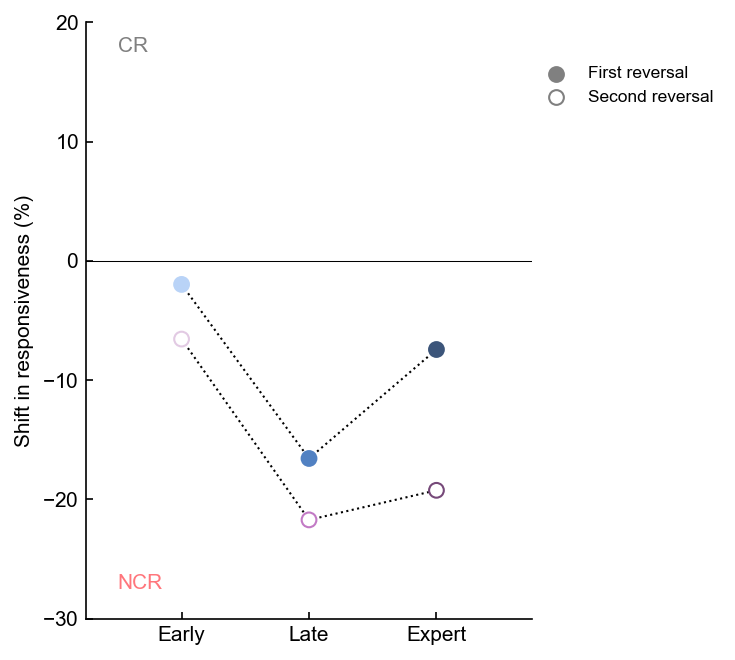

In [68]:
#Shift in responsiveness(Olivia + Regular)
fig, ax = plt.subplots(figsize=(5,4.5))
labels = ['Early','Late','Expert']

firstcolor = ['#B9D3F7','#5181C2','#3C557A']
secondcolor = ['#E2CAE3','#C27AC5','#764979']
#color=NCR_CR_cmap((percentCR-40)/20)
first_percentCR = np.array([FRmod_postearly_pc,FRmod_postlate_pc,FRmod_postexpert_total_pc])*100
print(first_percentCR)
second_percentCR = np.array([FRmod_secondearly_pc,FRmod_secondlate_pc,FRmod_secondexpert_pc])*100
numCon = len(labels)

ax.plot([0,1,2],(first_percentCR-FRmod_preearly_pc*100),color='k',linestyle=':',lw=1,alpha=1)
ax.scatter([0,1,2],(first_percentCR-FRmod_preearly_pc*100),c=firstcolor,s=50,zorder=10,marker='o',lw=1)

ax.plot([0,1,2],(second_percentCR-FRmod_preearly_pc*100),color='k',linestyle=':',lw=1,alpha=1)
ax.scatter([0,1,2],(second_percentCR-FRmod_preearly_pc*100),color='white',ec=secondcolor,s=50,zorder=10,marker='o',lw=1)

xlims = [-0.75,numCon-0.25]
ax.set_xlim(xlims)
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)

#All cells with All Cells baseline
ax.set_ylabel('Shift in responsiveness (%)')
ax.set_ylim([-30,20])
ax.set_yticks([-30,-20,-10,0,10,20])
ax.text(-0.5,17.5,'CR',color=CR_COLOR)
ax.text(-0.5,-27.5,'NCR',color=NCR_COLOR)

ax.axhline(0,c='k',linestyle='-',lw=0.5,zorder=-10)

ax.scatter([],[],fc='grey',ec='grey',s=50,marker='o',lw=1,label='First reversal')
ax.scatter([],[],fc='white',ec='grey',s=50,marker='o',lw=1,label='Second reversal')
ax.legend(frameon=False,loc=(1,0.85))

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# Yval = ilep.getPrePostLabelYval(ax.get_ylim())+1
# t1 = ax.text(xtick_pos_pre, Yval, 'First-rev', ha='center', va='top', fontsize=12,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Second-rev', ha='center', va='top',  fontsize=12,color='k')
#ax.annotate('', xy=(0.07, -0.07), xycoords='axes fraction', xytext=(0.48, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
#ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.94, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
plt.tight_layout()

#fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\SecondaryAnalysis','Shift in responsiveness first vs. second reversal.pdf'),transparent=False,facecolor="white")
#fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\SecondaryAnalysis','Shift in responsiveness first vs. second reversal.PNG'),transparent=False,facecolor="white")

In [33]:
### Create dataframe ###
#data = [FRmod_postearly,FRmod_postlate,FRmod_postexpert_total,FRmod_secondearly,FRmod_secondlate,FRmod_secondexpert]

phase = len(FRmod_postearly)*["early"] + len(FRmod_secondearly)*["early"] \
    + len(FRmod_postlate)*["late"] + len(FRmod_secondlate)*["late"] \
    + len(FRmod_postexpert_total)*["expert"] + len(FRmod_secondexpert)*["expert"] \


context = len(FRmod_postearly)*["first"] + len(FRmod_secondearly)*["second"] \
    + len(FRmod_postlate)*["first"] + len(FRmod_secondlate)*["second"] \
    + len(FRmod_postexpert_total)*["first"] + len(FRmod_secondexpert)*["second"] \

mod = (np.concatenate([FRmod_postearly, FRmod_secondearly,
    FRmod_postlate, FRmod_secondlate,
    FRmod_postexpert_total, FRmod_secondexpert,]))

df = pd.DataFrame({"phase": phase, "context": context, "FR_mod": mod})



### Anova ###
anova = pg.anova(data=df, dv='FR_mod', between=['phase','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='FR_mod', between=['phase','context'], padjust="fdr_bh", parametric=False, )
#print(pairwise_mwu[pairwise_mwu["Contrast"] == "phase * context"][["phase","A", "B", "p-unc", "p-corr", "hedges"]])
pairwise_mwu


            Source             SS      DF           MS          F  \
0            phase    3507.023551     2.0  1753.511775  18.595440   
1          context     598.701068     1.0   598.701068   6.349036   
2  phase * context     149.249963     2.0    74.624982   0.791374   
3         Residual  202834.883283  2151.0    94.297947        NaN   

          p-unc       np2  
0  9.842944e-09  0.016996  
1  1.181640e-02  0.002943  
2  4.533534e-01  0.000735  
3           NaN       NaN  



Contrast   phase       A       B Paired  Parametric     U-val  \
0            phase       -   early  expert  False       False  283448.5   
1            phase       -   early    late  False       False  376648.0   
2            phase       -  expert    late  False       False  180718.5   
3          context       -   first  second  False       False  605912.0   
4  phase * context   early   first  second  False       False  124735.5   
5  phase * context  expert   first  second  False       False   34952.0   
6  phase * context    late   first  second  False       False   51297.0   

  alternative         p-unc        p-corr p-adjust    hedges  
0   two-sided  8.268103e-03  8.268103e-03   fdr_bh  0.188170  
1   two-sided  2.321662e-10  6.964987e-10   fdr_bh  0.259917  
2   two-sided  8.041855e-04  1.206278e-03   fdr_bh  0.086244  
3   two-sided  3.642112e-02           NaN      NaN  0.062208  
4   two-sided  4.509286e-02  6.763929e-02   fdr_bh  0.110795  
5   two-sided  2.771014e-02  6.763929e-02   fdr_bh  0.210047  
6   two-sided  3.183771e-01  3.183771e-01   fdr_bh  0.044231

In [80]:
### Create dataframe ###
#data = [FRmod_postearly,FRmod_postlate,FRmod_postexpert_total,FRmod_secondearly,FRmod_secondlate,FRmod_secondexpert]

phase = len(FRmod_preearly)*["early"] + len(FRmod_postearly)*["early"] \
    + len(FRmod_prelate)*["late"] + len(FRmod_postlate)*["late"] \
    + len(FRmod_preexpert)*["expert"] + len(FRmod_postexpert_total)*["expert"] \

context = len(FRmod_preearly)*["pre"] + len(FRmod_postearly)*["first"] \
    + len(FRmod_prelate)*["pre"] + len(FRmod_postlate)*["first"] \
    + len(FRmod_preexpert)*["pre"] + len(FRmod_postexpert_total)*["first"] \


mod = (np.concatenate([FRmod_preearly, FRmod_postearly,
    FRmod_prelate, FRmod_postlate,
    FRmod_preexpert, FRmod_postexpert_total,]))

df = pd.DataFrame({"phase": phase, "context": context, "FR_mod": mod})



### Anova ###
anova = pg.anova(data=df, dv='FR_mod', between=['phase','context'], detailed=True)
print(anova)
print()

### Create and print results ###
cpairwise_mwu = pg.pairwise_tests(data=df, dv='FR_mod', between=['phase','context'], padjust="fdr_bh", parametric=False, )
#print(pairwise_mwu[pairwise_mwu["Contrast"] == "phase * context"][["phase","A", "B", "p-unc", "p-corr", "hedges"]])
pairwise_mwu


            Source             SS      DF           MS          F     p-unc  \
0            phase    2088.726752     2.0  1044.363376  11.072402  0.000017   
1          context       4.981089     1.0     4.981089   0.052810  0.818278   
2  phase * context     227.591459     2.0   113.795730   1.206469  0.299563   
3         Residual  132049.819464  1400.0    94.321300        NaN       NaN   

        np2  
0  0.015571  
1  0.000038  
2  0.001721  
3       NaN  



Contrast   phase       A       B Paired  Parametric     U-val  \
0            phase       -   early  expert  False       False  112587.5   
1            phase       -   early    late  False       False  144291.0   
2            phase       -  expert    late  False       False  115421.0   
3          context       -   first     pre  False       False  197444.5   
4  phase * context   early   first     pre  False       False   24903.0   
5  phase * context  expert   first     pre  False       False   13798.0   
6  phase * context    late   first     pre  False       False   25415.5   

  alternative         p-unc        p-corr p-adjust    hedges  
0   two-sided  5.420227e-02  5.420227e-02   fdr_bh  0.147781  
1   two-sided  1.780614e-07  5.341841e-07   fdr_bh  0.295165  
2   two-sided  1.337693e-03  2.006539e-03   fdr_bh  0.158777  
3   two-sided  6.545449e-02           NaN      NaN  0.006234  
4   two-sided  5.286393e-01  5.286393e-01   fdr_bh  0.078905  
5   two-sided  7.825828e-02  1.173874e-01   fdr_bh -0.133545  
6   two-sided  7.521119e-02  1.173874e-01   fdr_bh -0.059768

In [56]:
FRmod_postexpert_Olivia_pc = np.mean(np.greater(ilep.rmnan(FRmod_postexpert_Olivia_np),FRmod_baseline_median))
print(FRmod_postexpert_Olivia_pc)

0.5543478260869565


# Mean of Modulation

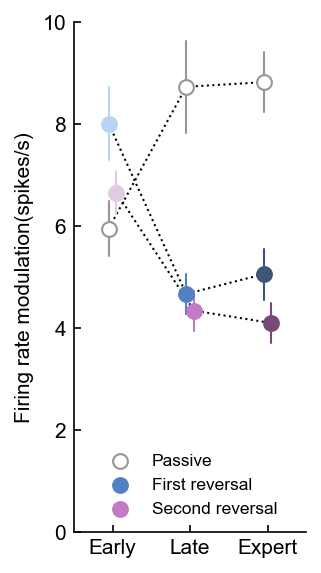

In [159]:
#Firing rate modulation graphs
size=5
numCon = 6

labels = ['Early','Late','Expert','Early','Late','Expert']
offset_distance = 0.05

fig, ax = plt.subplots(figsize=(2,4.5)) #5/3 with height of 4.5

data = [FRmod_secondearly,FRmod_secondlate,FRmod_secondexpert]
data = [np.abs(column[np.isfinite(column)]) for column in data]

labels = ['Early','Late','Expert']
numCon = len(data)

#Plot summary
colmaxes = [np.nan]*4
for idx,column in enumerate(data):
    eye_color = PHASE_COLORS[idx]
    border_color=eye_color
    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    colmaxes[idx] = Q3
    
    ax.scatter([idx+offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+offset_distance, idx+offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in data]
plt.plot(np.linspace(0,2,3)+offset_distance,medians[0:3],color='k',linestyle=':',lw=1)
#plt.plot(np.linspace(3,5,3)+offset_distance,medians[3:6],color='k',linestyle=':',lw=1)
    
######################################################################################################################################################
######################################################        First     ##############################################################################
######################################################################################################################################################

first_data = [FRmod_postearly,FRmod_postlate,FRmod_postexpert]
first_data = [ilep.rmnan(d) for d in first_data]

#Plot summary
first_colmaxes = [np.nan]*4
for idx,column in enumerate(first_data):
    border_color=PHASE_COLORS[idx+3]
    eye_color=border_color

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    first_colmaxes[idx] = Q3
    
    ax.scatter([idx-offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='o')
    ax.plot([idx-offset_distance, idx-offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in first_data]
plt.plot(np.linspace(0,2,3)-offset_distance,medians[0:3],color='k',linestyle=':',lw=1)
#plt.plot(np.linspace(3,5,3)-offset_distance,medians[3:6],color='k',linestyle=':',lw=1)

######################################################################################################################################################
######################################################        PASSIVE   ##############################################################################
######################################################################################################################################################

passive_data = [FRmod_passive_postearly,FRmod_passive_postlate,FRmod_passive_postexpert]
passive_data = [ilep.rmnan(d) for d in passive_data]

#Plot summary
passive_colmaxes = [np.nan]*4
for idx,column in enumerate(passive_data):
    border_color=GOOD_GREY#PHASE_COLORS[idx+3]
    eye_color='white'#border_color

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    passive_colmaxes[idx] = Q3
    
    ax.scatter([idx-offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='o')
    ax.plot([idx-offset_distance, idx-offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in passive_data]
plt.plot(np.linspace(0,2,3)-offset_distance,medians[0:3],color='k',linestyle=':',lw=1)
#plt.plot(np.linspace(3,5,3)-offset_distance,medians[3:6],color='k',linestyle=':',lw=1)




ax.set_ylim([0,10])
#ax.set_yticks([4,5,6,7,8,9,10,11])
#ax.set_yticklabels([4,5,6,7,8,9,10,11])
ax.set_ylabel('Firing rate modulation(spikes/s)')

ax.set_xlim(ax.get_xlim())
ax.set_xlim([-0.5,2.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)


# ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=-10,lw=1)
# ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')

ax.scatter([],[],ec=GOOD_GREY,fc='white',s=summary_size,lw=summary_width,zorder=10,marker='o',label='Passive')
ax.scatter([],[],c=PHASE_COLORS[4],s=summary_size,lw=summary_width,zorder=10,marker='o',label='First reversal')
ax.scatter([],[],c=PHASE_COLORS[1],s=summary_size,lw=summary_width,zorder=10,marker='o',label='Second reversal')
lgd = ax.legend(frameon=False,loc=('lower center'))#(0.6,0.1))




# size = 1
# rev = 2.5
# center = np.mean(ax.get_ylim())
# ax.text(rev,center,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center',rotation=90)
# ax.plot([rev,rev],[ax.get_ylim()[0],center-size],color=SWITCH_COLOR,lw=1,linestyle='-')
# ax.plot([rev,rev],[center+size,ax.get_ylim()[1]],color=SWITCH_COLOR,lw=1,linestyle='-')


    

#statistics
# ax.text(1,10,str('*'),verticalalignment='top',horizontalalignment='center')
# ax.text(4,10,str('****'),verticalalignment='top',horizontalalignment='center')
# ax.text(5,10,str('****'),verticalalignment='top',horizontalalignment='center')
#ax.text(-0.4,9.5,'CR',color=CR_COLOR,horizontalalignment='left',verticalalignment='top')
#ax.text(-0.4,0.5,'NCR',color=NCR_COLOR,horizontalalignment='left',verticalalignment='bottom')
# statsbar(ax,10,[1-offset_distance,1+offset_distance],stemheights=[passive_colmaxes[1] , colmaxes[1]],text='*',lw=0.5)
# statsbar(ax,10,[4-offset_distance,4+offset_distance],stemheights=[passive_colmaxes[4] , colmaxes[4]],text='****',lw=0.5)
# statsbar(ax,10,[5-offset_distance,5+offset_distance],stemheights=[passive_colmaxes[5] , colmaxes[5]],text='****',lw=0.5)


# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# Yval = ilep.getPrePostLabelYval(ax.get_ylim())+0.15
# t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
# ax.annotate('', xy=(0.01, -0.07), xycoords='axes fraction', xytext=(0.51, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.51, -0.07), xycoords='axes fraction', xytext=(1.01, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Mean of FRmodulation second reversal V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

0
0.05
8.00750495295191
1
0.05
4.665028537133629
2
0.05
5.054395971690814


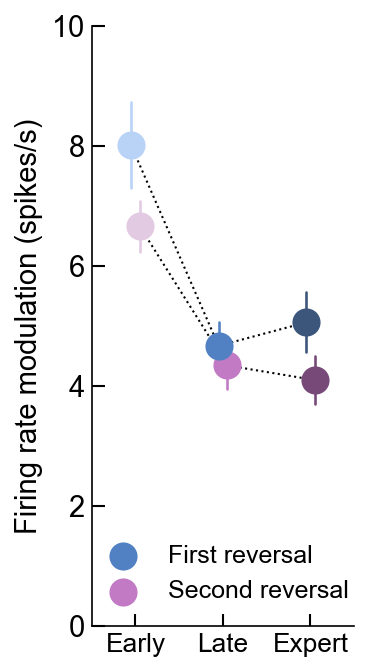

In [58]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def statsbar(ax,barheight,xpoints,stemheights,text=None,lw=1):
    ymax = ax.get_ylim()[1]
    ymin = ax.get_ylim()[0]
    yrange = ymax-ymin
    ydist = 0.025*yrange
    
    ax.plot([xpoints[0]]*2,[stemheights[0]+ydist,barheight],lw=lw,color='k')
    ax.plot([xpoints[1]]*2,[stemheights[1]+ydist,barheight],lw=lw,color='k')
    ax.plot(xpoints,[barheight]*2,lw=lw,color='k')
    
    if not text is None:
        ax.text(np.mean(xpoints),barheight + ydist,text,horizontalalignment='center',verticalalignment='center')

fig,ax = make_axis_size(1.75, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0
offset_distance = 0.05

################################################################################################################

data = [FRmod_secondearly,FRmod_secondlate,FRmod_secondexpert]
data = [np.abs(column[np.isfinite(column)]) for column in data]

labels = ['Early','Late','Expert']
numCon = len(data)

#Plot summary
colmaxes = [np.nan]*4
for idx,column in enumerate(data):
    eye_color = PHASE_COLORS[idx]
    border_color=eye_color
    summary_size=150
    summary_width=1.25
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    colmaxes[idx] = Q3
    
    ax.scatter([idx+offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+offset_distance, idx+offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in data]
plt.plot(np.linspace(0,2,3)+offset_distance,medians[0:3],color='k',linestyle=':',lw=1)
#plt.plot(np.linspace(3,5,3)+offset_distance,medians[3:6],color='k',linestyle=':',lw=1)

################################################################################################################
#####################################       FIRST          #####################################################
################################################################################################################

first_data = [FRmod_postearly,FRmod_postlate,FRmod_postexpert]
first_data = [ilep.rmnan(d) for d in first_data]

#Plot summary
first_colmaxes = [np.nan]*4
for idx,column in enumerate(first_data):
    border_color=PHASE_COLORS[idx+3]
    eye_color=border_color

    summary_size=150
    summary_width=1.25
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    first_colmaxes[idx] = Q3
    
    print(idx)
    print(offset_distance)
    print(median)
    
    ax.scatter([idx-offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='o')
    ax.plot([idx-offset_distance, idx-offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in first_data]
plt.plot(np.linspace(0,2,3)-offset_distance,medians[0:3],color='k',linestyle=':',lw=1)
#plt.plot(np.linspace(3,5,3)-offset_distance,medians[3:6],color='k',linestyle=':',lw=1)

######################################################################################################################################################
######################################################        PASSIVE   ##############################################################################
######################################################################################################################################################

# passive_data = [FRmod_passive_postearly,FRmod_passive_postlate,FRmod_passive_postexpert]
# passive_data = [ilep.rmnan(d) for d in passive_data]

# #Plot summary
# passive_colmaxes = [np.nan]*4
# for idx,column in enumerate(passive_data):
#     border_color=GOOD_GREY#PHASE_COLORS[idx+3]
#     eye_color='white'#border_color

#     summary_size=50
#     summary_width=1
    
#     #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q3 = median + sem(column)
#     passive_colmaxes[idx] = Q3
    
#     ax.scatter([idx-offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='o')
#     ax.plot([idx-offset_distance, idx-offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
# medians = [np.mean(col) for col in passive_data]
# plt.plot(np.linspace(0,2,3)-offset_distance,medians[0:3],color='k',linestyle=':',lw=1)
# #plt.plot(np.linspace(3,5,3)-offset_distance,medians[3:6],color='k',linestyle=':',lw=1)

################################################################################################################

# ax.scatter([],[],ec=GOOD_GREY,fc='white',s=summary_size,lw=summary_width,zorder=10,marker='o',label='Passive')
ax.scatter([],[],c=PHASE_COLORS[4],s=summary_size,lw=summary_width,zorder=10,marker='o',label='First reversal')
ax.scatter([],[],c=PHASE_COLORS[1],s=summary_size,lw=summary_width,zorder=10,marker='o',label='Second reversal')
lgd = ax.legend(frameon=False,loc=('lower center'),fontsize=12)#(0.6,0.1))

labels = ['Early','Late','Expert']
# labels2 = [4,5,6]

ax.set_ylim([0,10])
#ax.set_yticks([4,5,6,7,8,9,10,11])
#ax.set_yticklabels([4,5,6,7,8,9,10,11])
ylab = ax.set_ylabel('Firing rate modulation (spikes/s)')

ax.set_xlim(ax.get_xlim())
ax.set_xlim([-0.5,2.5])
ax.set_xticks([0,1,2])
ax.set_xticklabels(labels)

# ax2 = ax.twiny()
# ax2.spines['top'].set_visible(True)
# ax2.get_xaxis().set_visible(True)
# ax2.set_xlim([-0.5-switch_offset,2.5+switch_offset])
# ax2.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset])
# ax2.set_xticklabels(labels2)
# xlab2 = ax2.set_xlabel('Passive exposure phase')

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass
# for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
#     ax2.get_xticklabels() + ax2.get_yticklabels()):
#     item.set_fontsize(stdfont)

artists = [ylab]#,xlab2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Mean of FRmodulation second reversal V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

0
0.25
8.544638575774535
1
0.25
4.604688178351357
2
0.25
5.216711501678931
0
0.25
7.041143614699935
1
0.25
5.186195559148772
2
0.25
7.107498128607241


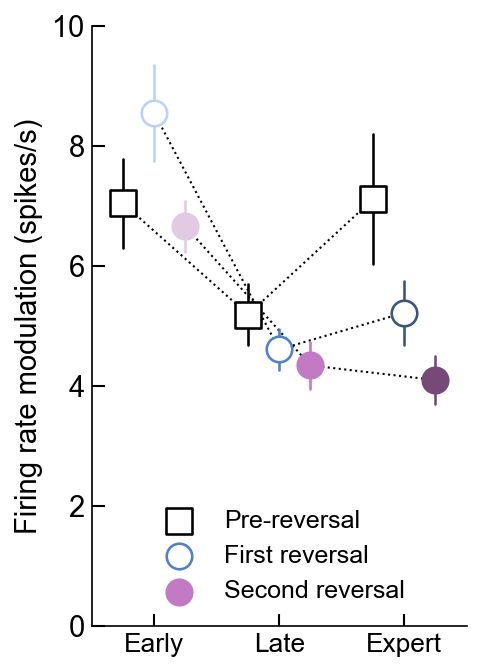

In [48]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def statsbar(ax,barheight,xpoints,stemheights,text=None,lw=1):
    ymax = ax.get_ylim()[1]
    ymin = ax.get_ylim()[0]
    yrange = ymax-ymin
    ydist = 0.025*yrange
    
    ax.plot([xpoints[0]]*2,[stemheights[0]+ydist,barheight],lw=lw,color='k')
    ax.plot([xpoints[1]]*2,[stemheights[1]+ydist,barheight],lw=lw,color='k')
    ax.plot(xpoints,[barheight]*2,lw=lw,color='k')
    
    if not text is None:
        ax.text(np.mean(xpoints),barheight + ydist,text,horizontalalignment='center',verticalalignment='center')

fig,ax = make_axis_size(2.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0
offset_distance = 0.25

################################################################################################################

data = [FRmod_secondearly,FRmod_secondlate,FRmod_secondexpert]
data = [np.abs(column[np.isfinite(column)]) for column in data]

labels = ['Early','Late','Expert']
numCon = len(data)

#Plot summary
colmaxes = [np.nan]*4
for idx,column in enumerate(data):
    eye_color = PHASE_COLORS[idx]
    border_color=eye_color
    summary_size=150
    summary_width=1.25
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    colmaxes[idx] = Q3
    
    ax.scatter([idx+offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+offset_distance, idx+offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in data]
plt.plot(np.linspace(0,2,3)+offset_distance,medians[0:3],color='k',linestyle=':',lw=1)
#plt.plot(np.linspace(3,5,3)+offset_distance,medians[3:6],color='k',linestyle=':',lw=1)

################################################################################################################
#####################################       FIRST          #####################################################
################################################################################################################

first_data = [FRmod_postearly,FRmod_postlate,FRmod_postexpert]
first_data = [ilep.rmnan(d) for d in first_data]

#Plot summary
first_colmaxes = [np.nan]*4
for idx,column in enumerate(first_data):
    border_color=PHASE_COLORS[idx+3]
    eye_color='white'#border_color

    summary_size=150
    summary_width=1.25
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    first_colmaxes[idx] = Q3
    
    print(idx)
    print(offset_distance)
    print(median)
    
    ax.scatter([idx-0*offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='o')
    ax.plot([idx-0*offset_distance, idx-0*offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in first_data]
plt.plot(np.linspace(0,2,3)-0*offset_distance,medians[0:3],color='k',linestyle=':',lw=1)
#plt.plot(np.linspace(3,5,3)-offset_distance,medians[3:6],color='k',linestyle=':',lw=1)

######################################################################################################################################################
######################################################       Pre        ##############################################################################
######################################################################################################################################################

first_data = [FRmod_preearly,FRmod_prelate,FRmod_preexpert]
first_data = [ilep.rmnan(d) for d in first_data]

#Plot summary
first_colmaxes = [np.nan]*4
for idx,column in enumerate(first_data):
    border_color='k'#PHASE_COLORS[idx+3]
    eye_color='white'#border_color

    summary_size=150
    summary_width=1.25
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    first_colmaxes[idx] = Q3
    
    print(idx)
    print(offset_distance)
    print(median)
    
    ax.scatter([idx-offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='s')
    ax.plot([idx-offset_distance, idx-offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in first_data]
plt.plot(np.linspace(0,2,3)-offset_distance,medians[0:3],color='k',linestyle=':',lw=1)
#plt.plot(np.linspace(3,5,3)-offset_distance,medians[3:6],color='k',linestyle=':',lw=1)

################################################################################################################

# ax.scatter([],[],ec=GOOD_GREY,fc='white',s=summary_size,lw=summary_width,zorder=10,marker='o',label='Passive')
ax.scatter([],[],fc='white',ec='k',s=summary_size,lw=summary_width,zorder=10,marker='s',label='Pre-reversal')
ax.scatter([],[],fc='white',ec=PHASE_COLORS[4],s=summary_size,lw=summary_width,zorder=10,marker='o',label='First reversal')
ax.scatter([],[],c=PHASE_COLORS[1],s=summary_size,lw=summary_width,zorder=10,marker='o',label='Second reversal')
lgd = ax.legend(frameon=False,loc=('lower center'),fontsize=12)#(0.6,0.1))

labels = ['Early','Late','Expert']
# labels2 = [4,5,6]

ax.set_ylim([0,10])
#ax.set_yticks([4,5,6,7,8,9,10,11])
#ax.set_yticklabels([4,5,6,7,8,9,10,11])
ylab = ax.set_ylabel('Firing rate modulation (spikes/s)')

ax.set_xlim(ax.get_xlim())
ax.set_xlim([-0.5,2.5])
ax.set_xticks([0,1,2])
ax.set_xticklabels(labels)

# ax2 = ax.twiny()
# ax2.spines['top'].set_visible(True)
# ax2.get_xaxis().set_visible(True)
# ax2.set_xlim([-0.5-switch_offset,2.5+switch_offset])
# ax2.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset])
# ax2.set_xticklabels(labels2)
# xlab2 = ax2.set_xlabel('Passive exposure phase')

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass
# for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
#     ax2.get_xticklabels() + ax2.get_yticklabels()):
#     item.set_fontsize(stdfont)

artists = [ylab]#,xlab2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Mean of FRmodulation second reversal V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [49]:
labels

['Early', 'Late', 'Expert']

In [53]:
# p1 = mannwhitneyu(FRmod_preearly,FRmod_postearly).pvalue
# p2 = mannwhitneyu(FRmod_prelate,FRmod_postlate).pvalue
# p3 = mannwhitneyu(FRmod_preexpert,FRmod_postexpert).pvalue

print(np.sum(np.isfinite(FRmod_secondearly)))
print(np.sum(np.isfinite(FRmod_secondlate)))
print(np.sum(np.isfinite(FRmod_secondexpert)))

p1 = mannwhitneyu(ilep.rmnan(FRmod_preearly),ilep.rmnan(FRmod_secondearly)).pvalue
p2 = mannwhitneyu(ilep.rmnan(FRmod_prelate),ilep.rmnan(FRmod_secondlate)).pvalue
p3 = mannwhitneyu(ilep.rmnan(FRmod_preexpert),ilep.rmnan(FRmod_secondexpert)).pvalue

p4 = mannwhitneyu(ilep.rmnan(FRmod_postearly),ilep.rmnan(FRmod_secondearly)).pvalue
p5 = mannwhitneyu(ilep.rmnan(FRmod_postlate),ilep.rmnan(FRmod_secondlate)).pvalue
p6 = mannwhitneyu(ilep.rmnan(FRmod_postexpert),ilep.rmnan(FRmod_secondexpert)).pvalue

pvals = [p1,p2,p3,p4,p5,p6]
_,pvals_corr = pg.multicomp(pvals)
print(pvals_corr)

672
329
194
[0.04486255 0.03048588 0.00430724 0.04490018 0.17437111 0.17437111]


In [52]:
data_dec = SimpleNamespace()
data_dec.early = np.abs(FRmod_preearly)
data_dec.late = np.abs(FRmod_prelate)
data_dec.expert = np.abs(FRmod_preexpert)

data_dec2 = SimpleNamespace()
data_dec2.early = np.abs(FRmod_postearly)
data_dec2.late = np.abs(FRmod_postlate)
data_dec2.expert = np.abs(FRmod_postexpert)

data_dec3 = SimpleNamespace()
data_dec3.early = np.abs(FRmod_secondearly)
data_dec3.late = np.abs(FRmod_secondlate)
data_dec3.expert = np.abs(FRmod_secondexpert)

In [53]:
ilep.nonparametricIndependentStatsCompareToOtherSmall(data_dec,data_dec3)# Pre
pass

            Source             SS      DF          MS          F     p-unc  \
0            phase    1779.846993     2.0  889.923496  10.755308  0.000023   
1          context     385.564165     1.0  385.564165   4.659795  0.031023   
2  phase * context     305.612820     2.0  152.806410   1.846765  0.158078   
3         Residual  134125.960869  1621.0   82.742727        NaN       NaN   

        np2  
0  0.013096  
1  0.002866  
2  0.002273  
3       NaN  

    phase  A  B     p-unc    p-corr    hedges
4   early  A  B  0.011216  0.011216  0.036628
5  expert  A  B  0.000718  0.002154  0.395430
6    late  A  B  0.006097  0.009146  0.119145
key early has 148 and 672 non-nan elements
key late has 187 and 329 non-nan elements
key expert has 97 and 194 non-nan elements


In [54]:
ilep.nonparametricIndependentStatsCompareToOtherSmall(data_dec2,data_dec3)# Post
pass

            Source             SS      DF           MS          F  \
0            phase    4249.366864     2.0  2124.683432  22.806128   
1          context     654.501618     1.0   654.501618   7.025351   
2  phase * context     246.273484     2.0   123.136742   1.321737   
3         Residual  194151.335345  2084.0    93.162829        NaN   

          p-unc       np2  
0  1.593156e-10  0.021418  
1  8.097177e-03  0.003360  
2  2.668952e-01  0.001267  
3           NaN       NaN  

    phase  A  B     p-unc    p-corr    hedges
4   early  A  B  0.014967  0.044900  0.157623
5  expert  A  B  0.132311  0.132311  0.154322
6    late  A  B  0.087186  0.130778  0.039343
key early has 306 and 672 non-nan elements
key late has 342 and 329 non-nan elements
key expert has 247 and 194 non-nan elements


In [56]:
ilep.nonparametricIndependentStatsCompareToOtherSmall(data_dec,data_dec2)# Post
pass

            Source             SS      DF           MS          F  \
0            phase    2655.286720     2.0  1327.643360  14.116778   
1          context       9.319357     1.0     9.319357   0.099092   
2  phase * context     506.051463     2.0   253.025732   2.690412   
3         Residual  124236.340512  1321.0    94.047192        NaN   

          p-unc       np2  
0  8.585371e-07  0.020926  
1  7.529713e-01  0.000075  
2  6.822475e-02  0.004057  
3           NaN       NaN  

    phase  A  B     p-unc    p-corr    hedges
4   early  A  B  0.645126  0.645126 -0.118248
5  expert  A  B  0.021715  0.065146  0.207768
6    late  A  B  0.180456  0.270685  0.087505
key early has 148 and 306 non-nan elements
key late has 187 and 342 non-nan elements
key expert has 97 and 247 non-nan elements


In [52]:
### Create dataframe ###
phase = len(FRmod_postearly)*["early"] + len(FRmod_secondearly)*["early"] \
    + len(FRmod_postlate)*["late"] + len(FRmod_secondlate)*["late"] \
    + len(FRmod_postexpert)*["expert"] + len(FRmod_secondexpert)*["expert"] \

context = len(FRmod_postearly)*["first"] + len(FRmod_secondearly)*["second"] \
    + len(FRmod_postlate)*["first"] + len(FRmod_secondlate)*["second"] \
    + len(FRmod_postexpert)*["first"] + len(FRmod_secondexpert)*["second"] \

mod = (np.concatenate([FRmod_postearly, FRmod_secondearly,
    FRmod_postlate, FRmod_secondlate,
    FRmod_postexpert, FRmod_secondexpert,]))

df = pd.DataFrame({"phase": phase, "context": context, "FR_mod": mod})



### Anova ###
anova = pg.anova(data=df, dv='FR_mod', between=['phase','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='FR_mod', between=['phase','context'], padjust="fdr_bh", parametric=False, )
#print(pairwise_mwu[pairwise_mwu["Contrast"] == "phase * context"][["phase","A", "B", "p-unc", "p-corr", "hedges"]])
pairwise_mwu

            Source             SS      DF           MS          F  \
0            phase    3885.895762     2.0  1942.947881  21.006418   
1          context     376.665177     1.0   376.665177   4.072361   
2  phase * context      92.763643     2.0    46.381821   0.501463   
3         Residual  190443.213997  2059.0    92.493062        NaN   

          p-unc       np2  
0  9.308002e-10  0.019996  
1  4.371976e-02  0.001974  
2  6.057181e-01  0.000487  
3           NaN       NaN  



Contrast   phase       A       B Paired  Parametric     U-val  \
0            phase       -   early  expert  False       False  240610.5   
1            phase       -   early    late  False       False  376648.0   
2            phase       -  expert    late  False       False  144378.5   
3          context       -   first  second  False       False  541748.0   
4  phase * context   early   first  second  False       False  124735.5   
5  phase * context  expert   first  second  False       False   23902.0   
6  phase * context    late   first  second  False       False   51297.0   

  alternative         p-unc        p-corr p-adjust    hedges  
0   two-sided  4.191287e-04  6.286930e-04   fdr_bh  0.248264  
1   two-sided  2.321662e-10  6.964987e-10   fdr_bh  0.259917  
2   two-sided  2.123145e-02  2.123145e-02   fdr_bh  0.003197  
3   two-sided  1.259629e-01           NaN      NaN  0.043483  
4   two-sided  4.509286e-02  1.352786e-01   fdr_bh  0.110795  
5   two-sided  2.360643e-01  3.183771e-01   fdr_bh  0.113266  
6   two-sided  3.183771e-01  3.183771e-01   fdr_bh  0.044231

In [57]:
animals

['BS_40',
 'BS_41',
 'BS_42',
 'BS_49',
 'BS_50',
 'BS_51',
 'BS_56',
 'BS_59',
 'BS_67',
 'BS_70',
 'BS_72',
 'BS_87',
 'BS_108',
 'DS_15',
 'DS_19']

In [77]:
print(np.sum(np.isnan(first_pc_NCR_preearly)))
print(np.sum(np.isnan(first_pc_NCR_prelate)))
print(np.sum(np.isnan(first_pc_NCR_preexpert)))
print(np.sum(np.isnan(first_pc_NCR_postearly)))
print(np.sum(np.isnan(first_pc_NCR_postlate)))
print(np.sum(np.isnan(first_pc_NCR_postexpert)))

15
15
15
8
7
4


# Percent NCR

In [51]:
#Bootstrapped Mw and SEMw calculation adapted from Gatz & Smith (1993)
# THE STANDARD ERROR OF A WEIGHTED MEAN CONCENTRATION-I. BOOTSTRAPPING VS OTHER METHODS

def hier_boot_Mw_SEMw(FRmods,B=200,n_frac=1,CR_NCR_thresh=3.5):
    FRmods = np.array(FRmods)
    mask = np.greater([len(l) for l in FRmods],0)
    FRmods = FRmods[mask]
    
    Mw_list = []
    for idx_B in range(B):
        this_sample_animals = []
        N = len(FRmods)
        this_sample_animals = np.random.choice(FRmods,N)
        
        this_sample = []
        for this_FRmod_list in this_sample_animals:
            n = int(n_frac*len(this_FRmod_list))
            if n < 1:
                n=1
            sample = np.random.choice(this_FRmod_list,n)
            this_sample.append(sample)
        
        this_pcs = [np.mean(np.less(FRmod,CR_NCR_thresh)) for FRmod in this_sample]
        this_sizes = [len(l) for l in this_sample]
        Mw = np.average(this_pcs,weights=this_sizes)
        Mw_list.append(Mw)
        
    Mw_estimate = np.mean(Mw_list)*100
    SEMw_estimate = np.std(Mw_list)*100# / np.sqrt(B)
        
    return Mw_estimate,SEMw_estimate

def hier_boot_pc_NCR_test(X,Y,B=200,CR_NCR_thresh=3.5,alpha=0.05):
    #https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7906290/
    #Application of the hierarchical bootstrap to multi-level data in neuroscience
    #Saravanan et al.
    
    #Testing against the null hypothesis that these two groups are the same
    X = np.array(X)
    mask = np.greater([len(l) for l in X],0)
    X = X[mask]
    
    Y = np.array(Y)
    mask = np.greater([len(l) for l in Y],0)
    Y = Y[mask]
    
    MwX_list = []
    for idx_B in range(B):
        this_sample_animals = []
        N = len(FRmods)
        this_sample_animals = np.random.choice(X,N)
        
        this_sample = []
        for this_list in this_sample_animals:
            n = len(this_list)
            sample = np.random.choice(this_list,n)
            this_sample.append(sample)
        
        this_pcs = [np.mean(np.less(X,CR_NCR_thresh)) for X in this_sample]
        this_sizes = [len(l) for l in this_sample]
        Mw = np.average(this_pcs,weights=this_sizes)
        MwX_list.append(Mw)
        
    MwY_list = []
    for idx_B in range(B):
        this_sample_animals = []
        N = len(FRmods)
        this_sample_animals = np.random.choice(Y,N)
        
        this_sample = []
        for this_list in this_sample_animals:
            n = len(this_list)
            sample = np.random.choice(this_list,n)
            this_sample.append(sample)
        
        this_pcs = [np.mean(np.less(Y,CR_NCR_thresh)) for Y in this_sample]
        this_sizes = [len(l) for l in this_sample]
        Mw = np.average(this_pcs,weights=this_sizes)
        MwY_list.append(Mw)
        
    #Two-sided test
    diffs = (np.array(MwY_list) - np.array(MwX_list))
    pY = 1 - np.mean(np.greater(diffs,0))
    pX = 1 - np.mean(np.less(diffs,0))
    pboot = min(pX,pY)*2
    return pboot

In [49]:
first_pc_NCR_preearly = []
first_pc_NCR_prelate = []
first_pc_NCR_preexpert = []
first_pc_NCR_postearly = []
first_pc_NCR_postlate = []
first_pc_NCR_postexpert = []

first_n_preearly = []
first_n_prelate = []
first_n_preexpert = []
first_n_postearly = []
first_n_postlate = []
first_n_postexpert = []

first_FR_preearly = []
first_FR_prelate = []
first_FR_preexpert = []
first_FR_postearly = []
first_FR_postlate = []
first_FR_postexpert = []

for animal in animals:
    
    first_animal_FRmod_preearly = []
    first_animal_FRmod_prelate = []
    first_animal_FRmod_preexpert = []
    first_animal_FRmod_postearly = []
    first_animal_FRmod_postlate = []
    first_animal_FRmod_postexpert = []
    
    first_animal_n_preearly = 0
    first_animal_n_prelate = 0
    first_animal_n_preexpert = 0
    first_animal_n_postearly = 0
    first_animal_n_postlate = 0
    first_animal_n_postexpert = 0
    
    for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
        sessionfile = ilep.loadSessionCached(act_directory,session)
        
        if sessionfile.meta.animal != animal:
            continue
        if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
            continue
            
#         if EILphases[idx] not in ['post early','post late','post expert']:
#             continue
            
        try:
            FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
        except Exception as e:
            print(e)
            FRmod = np.nan
        
#         print(EILphases[idx])
        if EILphases[idx] == 'pre early':
            first_animal_FRmod_preearly.append(FRmod)
            first_animal_n_preearly += 1
        elif EILphases[idx] == 'pre late':
            first_animal_FRmod_prelate.append(FRmod)
            first_animal_n_prelate += 1
        elif EILphases[idx] == 'pre expert':
            first_animal_FRmod_preexpert.append(FRmod)
            first_animal_n_preexpert += 1
        if EILphases[idx] == 'post early':
            first_animal_FRmod_postearly.append(FRmod)
            first_animal_n_postearly += 1
        elif EILphases[idx] == 'post late':
            first_animal_FRmod_postlate.append(FRmod)
            first_animal_n_postlate += 1
        elif EILphases[idx] == 'post expert':
            first_animal_FRmod_postexpert.append(FRmod)
            first_animal_n_postexpert += 1
    
    first_FR_preearly.append(first_animal_FRmod_preearly)
    first_FR_prelate.append(first_animal_FRmod_prelate)
    first_FR_preexpert.append(first_animal_FRmod_preexpert)
    first_FR_postearly.append(first_animal_FRmod_postearly)
    first_FR_postlate.append(first_animal_FRmod_postlate)
    first_FR_postexpert.append(first_animal_FRmod_postexpert)
    
    first_n_preearly.append(first_animal_n_preearly)
    first_n_prelate.append(first_animal_n_prelate)
    first_n_preexpert.append(first_animal_n_preexpert)
    first_n_postearly.append(first_animal_n_postearly)
    first_n_postlate.append(first_animal_n_postlate)
    first_n_postexpert.append(first_animal_n_postexpert)
    
    first_pc_NCR_preearly.append(np.mean(np.less(ilep.rmnan(first_animal_FRmod_preearly),3.5)))
    first_pc_NCR_prelate.append(np.mean(np.less(ilep.rmnan(first_animal_FRmod_prelate),3.5)))
    first_pc_NCR_preexpert.append(np.mean(np.less(ilep.rmnan(first_animal_FRmod_preexpert),3.5)))
    first_pc_NCR_postearly.append(np.mean(np.less(ilep.rmnan(first_animal_FRmod_postearly),3.5)))
    first_pc_NCR_postlate.append(np.mean(np.less(ilep.rmnan(first_animal_FRmod_postlate),3.5)))
    first_pc_NCR_postexpert.append(np.mean(np.less(ilep.rmnan(first_animal_FRmod_postexpert),3.5)))

1829it [00:43, 41.57it/s] 
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
1829it [00:41, 43.87it/s] 
1829it [00:42, 42.85it/s] 
1829it [00:42, 42.87it/s] 
1829it [00:42, 43.44it/s] 
1829it [00:42, 43.15it/s] 
1829it [00:43, 42.21it/s] 
1829it [00:45, 40.32it/s] 
1829it [00:44, 41.20it/s] 
1829it [00:44, 40.95it/s] 
1829it [00:46, 39.41it/s] 
1829it [00:44, 41.12it/s] 
1829it [00:50, 36.13it/s] 
1829it [00:52, 34.94it/s]
1829it [00:52, 35.09it/s]


In [50]:
second_pc_NCR_postexpert = []
second_pc_NCR_secondearly = []
second_pc_NCR_secondlate = []
second_pc_NCR_secondexpert = []

second_FR_postexpert = []
second_FR_secondearly = []
second_FR_secondlate = []
second_FR_secondexpert = []

second_n_postexpert = []
second_n_secondearly = []
second_n_secondlate = []
second_n_secondexpert = []

for animal in ['AE_238','AE_239','AE_240']:
    
    second_animal_FRmod_postexpert = []
    second_animal_FRmod_secondearly = []
    second_animal_FRmod_secondlate = []
    second_animal_FRmod_secondexpert = []
    
    second_animal_n_postexpert = 0
    second_animal_n_secondearly = 0
    second_animal_n_secondlate = 0
    second_animal_n_secondexpert = 0
    
    for idx,(session,clust) in tqdm(enumerate(zip(EnumACSession,EnumACClust))):
        sessionfile = ilep.loadSessionCached(act_directory,session)
        
        if sessionfile.meta.animal != animal:
            continue
        if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
            continue
            
        try:
            FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
        except Exception as e:
            print(e)
            FRmod = np.nan
        
        print(FRmod)
        
        ############################################################################################################################
        if sessionfile.meta.animal == 'AE_238':
            if sessionfile.meta.day_of_training >= AE_238[0]['AE_238'].post_expert_days[0] and sessionfile.meta.day_of_training <=AE_238[0]['AE_238'].post_expert_days[-1]:
                second_animal_FRmod_postexpert.append(FRmod)
                second_animal_n_postexpert += 1

            if sessionfile.meta.day_of_training >= AE_238[0]['AE_238'].second_early_days[0] and sessionfile.meta.day_of_training <=AE_238[0]['AE_238'].second_early_days[-1]:
                second_animal_FRmod_secondearly.append(FRmod)
                second_animal_n_secondearly += 1
            if sessionfile.meta.day_of_training >= AE_238[0]['AE_238'].second_late_days[0] and sessionfile.meta.day_of_training <=AE_238[0]['AE_238'].second_late_days[-1]:
                second_animal_FRmod_secondlate.append(FRmod)
                second_animal_n_secondlate += 1
            if sessionfile.meta.day_of_training >= AE_238[0]['AE_238'].second_expert_days[0] and sessionfile.meta.day_of_training <=AE_238[0]['AE_238'].second_expert_days[-1]:
                second_animal_FRmod_secondexpert.append(FRmod)
                second_animal_n_secondexpert += 1

        if sessionfile.meta.animal == 'AE_239':
            if sessionfile.meta.day_of_training >= AE_239[0]['AE_239'].post_expert_days[0] and sessionfile.meta.day_of_training <=AE_239[0]['AE_239'].post_expert_days[-1]:
                second_animal_FRmod_postexpert.append(FRmod)
                second_animal_n_postexpert += 1

            if sessionfile.meta.day_of_training >= AE_239[0]['AE_239'].second_early_days[0] and sessionfile.meta.day_of_training <=AE_239[0]['AE_239'].second_early_days[-1]:
                second_animal_FRmod_secondearly.append(FRmod)
                second_animal_n_secondearly += 1
            if sessionfile.meta.day_of_training >= AE_239[0]['AE_239'].second_late_days[0] and sessionfile.meta.day_of_training <=AE_239[0]['AE_239'].second_late_days[-1]:
                second_animal_FRmod_secondlate.append(FRmod)
                second_animal_n_secondlate += 1
            if sessionfile.meta.day_of_training >= AE_239[0]['AE_239'].second_expert_days[0] and sessionfile.meta.day_of_training <=AE_239[0]['AE_239'].second_expert_days[-1]:
                second_animal_FRmod_secondexpert.append(FRmod)
                second_animal_n_secondexpert += 1

        if sessionfile.meta.animal == 'AE_240':
            if sessionfile.meta.day_of_training >= AE_240[0]['AE_240'].post_expert_days[0] and sessionfile.meta.day_of_training <=AE_240[0]['AE_240'].post_expert_days[-1]:
                second_animal_FRmod_postexpert.append(FRmod)
                second_animal_n_postexpert += 1

            if sessionfile.meta.day_of_training >= AE_240[0]['AE_240'].second_early_days[0] and sessionfile.meta.day_of_training <=AE_240[0]['AE_240'].second_early_days[-1]:
                second_animal_FRmod_secondearly.append(FRmod)
                second_animal_n_secondearly += 1
            if sessionfile.meta.day_of_training >= AE_240[0]['AE_240'].second_late_days[0] and sessionfile.meta.day_of_training <=AE_240[0]['AE_240'].second_late_days[-1]:
                second_animal_FRmod_secondlate.append(FRmod)
                second_animal_n_secondlate += 1
            if sessionfile.meta.day_of_training >= AE_240[0]['AE_240'].second_expert_days[0] and sessionfile.meta.day_of_training <=AE_240[0]['AE_240'].second_expert_days[-1]:
                second_animal_FRmod_secondexpert.append(FRmod)
                second_animal_n_secondexpert += 1
        ############################################################################################################################
    
    second_FR_postexpert.append(second_animal_FRmod_postexpert)
    second_FR_secondearly.append(second_animal_FRmod_secondearly)
    second_FR_secondlate.append(second_animal_FRmod_secondlate)
    second_FR_secondexpert.append(second_animal_FRmod_secondexpert)
    
    second_n_postexpert.append(second_animal_n_postexpert)
    second_n_secondearly.append(second_animal_n_secondearly)
    second_n_secondlate.append(second_animal_n_secondlate)
    second_n_secondexpert.append(second_animal_n_secondexpert)
    
    second_pc_NCR_postexpert.append(np.mean(np.less(ilep.rmnan(second_animal_FRmod_postexpert),3.5)))
    second_pc_NCR_secondearly.append(np.mean(np.less(ilep.rmnan(second_animal_FRmod_secondearly),3.5)))
    second_pc_NCR_secondlate.append(np.mean(np.less(ilep.rmnan(second_animal_FRmod_secondlate),3.5)))
    second_pc_NCR_secondexpert.append(np.mean(np.less(ilep.rmnan(second_animal_FRmod_secondexpert),3.5)))

4it [00:00, 38.09it/s]

4.05466970387243
1.67046317388003
2.460136674259679
2.703113135914959
4.510250569476077
5.31645569620253


12it [00:00, 20.43it/s]

2.17160212604404
1.4912280701754395
0.5618830675778282
4.9657064471879275
2.429764616552773
0.6040992448759438
1.5181518151815183
2.886002886002886


20it [00:00, 27.94it/s]

70.34293552812072
1.199696279422931
1.1644832605531295
2.992299229922993
10.399999999999999
10.463173880030368
0.885780885780886
14.611288604898828


28it [00:01, 29.80it/s]

2.217160212604402
31.98924731182799
4.289855072463769
11.098484848484851
3.933333333333339
2.1198156682027647
0.7017543859649124
1.277258566978193
9.569160997732423


35it [00:01, 22.84it/s]

6.379928315412194
2.355889724310777
0.9090909090909091
6.94736842105263
2.537878787878787
7.795698924731187
4.990253411306045


42it [00:01, 21.41it/s]

1.756272401433692
0.5185185185185184
7.186379928315413
0.9792843691148779
5.0082918739635165
4.6594982078853
2.2885572139303485


49it [00:02, 24.79it/s]

16.272401433691748
1.5064102564102566
6.129032258064513
1.836734693877551
1.577060931899642


52it [00:02, 19.42it/s]

7.944111776447105
6.238532110091744
6.079295154185021


59it [00:02, 22.84it/s]

0.5079365079365079
0.9158679446219401
3.512544802867386
17.118155619596536
13.172043010752676
3.4050179211469493


62it [00:02, 21.82it/s]

2.202380952380951
0.572597137014315
0.6111111111111112
0.8176100628930818


67it [00:03, 17.18it/s]

0.41184041184041237
3.924626380766723
0.8529741863075193
0.851063829787234


71it [00:03, 14.64it/s]

6.500000000000005
2.986767485822305
1.0238095238095242
4.9404761904761925


76it [00:03, 17.07it/s]

5.461689587426326
2.714164546225614
0.5128205128205128
0.6547619047619052
1.5077605321507745


80it [00:03, 17.91it/s]

1.2168284789644013
1.862940785096471
5.625879043600564
0.7179487179487183


82it [00:04, 12.89it/s]

5.273809523809528
1.0075026795284032


86it [00:04, 14.13it/s]

3.2261904761904785
0.6785714285714275
1.0980392156862737
3.9057239057239057


90it [00:04, 16.20it/s]

6.7500000000000036
1.5415821501014182
6.285714285714294
7.309523809523819


94it [00:04, 17.69it/s]

0.9482758620689653
1.3729372937293738
2.637037037037037
1.2865497076023393
1.2814645308924482


98it [00:05, 18.34it/s]

1.5463917525773196
0.9285714285714277
0.584192439862543


102it [00:05, 12.41it/s]

1.1428571428571428
1.9682539682539686
1.9404761904761878
0.8791208791208801


106it [00:05, 15.12it/s]

1.1403508771929822
0.3598971722365039
0.5000000000000001
0.6711409395973156


110it [00:06, 16.15it/s]

0.9865470852017948
0.5083514887436456
6.180555555555554
1.4965986394557802


112it [00:06, 16.58it/s]

3.392857142857139
1.9337390128465202


118it [00:06, 19.35it/s]

2.243902439024393
2.1732745961820865
0.2949852507374631
1.6715830875122886
2.2615535889872196
18.151425762045232
5.75107296137339
3.5791543756145523


126it [00:06, 24.28it/s]

16.361848574237953
0.5506391347099313
2.105263157894736
1.1799410029498536
4.169124877089475
1.1369509043927648
0.6397306397306396
15.083579154375622
2.910521140609638
2.2418879056047203


138it [00:06, 36.56it/s]

0.8062930186823993
7.807276302851537
1.098039215686274
2.08627450980392
0.6790123456790125
1.2705882352941202
1.0509803921568626
4.690196078431368
2.5882352941176476
5.960784313725489
0.5333333333333333


143it [00:07, 38.56it/s]

4.533333333333332
1.519607843137255
0.9098039215686266
0.8784313725490193
0.6431372549019606


160it [00:07, 49.71it/s]

0.6117647058823528
0.35366931918656114
0.31825795644891125
0.6365159128978227
0.6867671691792295
3.6850921273031827
2.6298157453936337
3.4170854271356803
0.4238921001926782
1.2562814070351767
1.1929824561403506
0.4857621440536016
1.440536013400336
1.2897822445561147
0.8226950354609918
4.014184397163119
0.738255033557047


172it [00:07, 48.55it/s]

3.673758865248222
0.8490566037735837
1.2624113475177308
0.6382978723404256
1.3026819923371649
4.156028368794321
2.9078014184397123
0.42553191489361714
1.5602836879432642
0.7092198581560275
0.9556313993174061
0.9219858156028373
0.9222661396574442
1.50354609929078


195it [00:08, 62.98it/s]

2.184397163120567
1.1221122112211226
9.90517870167761
3.789338471419396
2.0254629629629632
9.79439252336448
1.1358024691358024
8.738425925925927
2.7662037037037006
1.8740399385560669
1.7708333333333306
5.4545454545454595
1.0722610722610721
6.480186480186481
4.801864801864804
1.1655011655011656
2.2843822843822843
nan
0.7925407925407928
10.069930069930072
3.076923076923077
1.123595505617978
1.453488372093025
0.5764411027568922
0.9090909090909091
0.9338521400778214


213it [00:08, 60.36it/s]

2.0183486238532122
0.9689922480620154
3.0232558139534924
3.3720930232558164
5.666666666666669
0.7170542635658904
3.0821917808219235
4.864341085271317
0.7945736434108528
0.7662835249042157
2.053231939163498
2.743055555555556
0.8124253285543601
0.8914728682170543
0.8984725965858043
2.1176470588235303
8.31372549019609


221it [00:08, 52.50it/s]

3.6705882352941193
0.4549019607843138
24.90980392156865
12.407843137254908
13.552941176470581
0.6535947712418302
2.3372549019607836


228it [00:09, 32.70it/s]

5.568627450980392
1.564102564102565


233it [00:09, 22.34it/s]

1.2235294117647066
0.7215007215007213
5.5215686274509865
4.4705882352941195
3.2


237it [00:09, 22.70it/s]

2.9960784313725504
35.90588235294121
4.909803921568627
8.250980392156874


244it [00:10, 21.29it/s]

1.188118811881188
1.2392156862745094
2.164705882352938
2.7607843137254924
37.835294117647074
0.5333333333333337
1.4745098039215694
2.987654320987654


250it [00:10, 17.68it/s]

1.0196078431372537
13.11372549019607
1.5529411764705894
7.74901960784314
5.485232067510546
10.576576576576578


253it [00:10, 18.88it/s]

9.772549019607844
4.486274509803916
5.898039215686278


260it [00:11, 19.85it/s]

0.8000000000000005
1.2705882352941162
4.098765432098768
2.0740740740740757
0.4444444444444445
2.3703703703703707
1.530864197530863
1.4743589743589747
3.209876543209877


268it [00:11, 23.42it/s]

2.2222222222222223
3.259259259259259
8.740740740740739
0.790123456790124
0.5925925925925926
0.7407407407407409


278it [00:11, 33.23it/s]

2.716049382716047
1.1851851851851851
4.54320987654321
1.679012345679012
nan
4.790123456790123
1.3333333333333335
1.432098765432099
nan


287it [00:11, 31.97it/s]

1.0864197530864204
1.8271604938271617
11.407407407407407
1.1358024691358033
3.45679012345679
0.790123456790124
0.691358024691358
5.975308641975309
1.333333333333334
2.518518518518519


311it [00:12, 73.10it/s]

4.790123456790124
2.913580246913578
1.2345679012345678
0.729684908789386
5.24242424242424
1.578327444051826
2.59128386336867
2.6855123674911683
0.9708737864077676
2.2355289421157685
2.5206124852767995
2.3015873015873027
1.702127659574468
1.5972222222222223
0.6249999999999999
1.7002237136465341
3.758389261744968
2.19047619047619
1.655480984340044
1.2527964205816549
0.3603603603603604
0.9843400447427294
4.832214765100668
1.1185682326621929
0.7158836689038031
0.7606263982102907
1.1396011396011405


329it [00:12, 100.30it/s]

1.3870246085011178
0.35714285714285715
0.715883668903803
4.573643410852712
2.6356589147286824
3.628691983122364
5.038759689922481
3.8759689922480614
1.3178294573643408
4.8062015503875966
1.0852713178294575
0.9302325581395345
8.837209302325585
0.6201550387596899
nan
0.38759689922480633
20.0
10.310077519379849
nan
7.401129943502825
2.2598870056497176


341it [00:12, 93.29it/s] 

1.073446327683616
0.6214689265536723
nan
1.6384180790960452
5.141242937853107
4.0
0.4728132387706855
1.3095238095238095
4.938271604938271
1.25
2.3361823361823344


361it [00:12, 68.84it/s]

8.61111111111111
1.9858156028368794
1.9385342789598103
1.1820330969267139
5.579196217494093
10.26004728132388
2.0330969267139474
1.3095238095238098
4.349881796690307
3.2000000000000006
2.1276595744680864
1.1515151515151514
15.172413793103448
16.14035087719298
2.4691358024691357


380it [00:12, 75.00it/s]

2.9239766081871337
1.418439716312057
2.2222222222222214
1.3333333333333333
0.0
8.3974358974359
3.0303030303030303
1.866666666666667
3.177570093457945
3.3096926713948003
17.352245862884157
7.4838709677419315
1.2043010752688172
1.2043010752688168
3.784946236559138
2.795698924731182
0.5161290322580646


389it [00:13, 70.29it/s]

7.483870967741934
0.9032258064516129
3.3118279569892484
0.9032258064516131
1.935483870967742
1.4623655913978504
4.387096774193545
2.5376344086021514
10.709677419354838


397it [00:13, 41.46it/s]

2.408602150537635
0.25806451612903225
0.6881720430107527
1.2043010752688168
1.0666666666666667
0.7311827956989246
0.58252427184466
1.3333333333333328
1.3763440860215046
1.3763440860215057
14.810256410256404


403it [00:13, 40.06it/s]

1.1897435897435897
1.8666666666666665
3.162790697674417
31.15897435897437
1.386861313868613
3.93846153846154
0.9867629362214199


409it [00:13, 36.78it/s]

30.97435897435899
4.799999999999997
2.7692307692307674
1.6205128205128214
2.2564102564102564
0.6974358974358972


414it [00:14, 35.67it/s]

0.9937888198757763
2.1468926553672305
1.0461538461538462


419it [00:14, 23.32it/s]

2.461538461538462
1.9897435897435893
2.3333333333333344
5.0666666666666575
2.297435897435897
0.9975669099756675


427it [00:14, 25.72it/s]

2.297435897435898
9.333333333333334
0.553846153846154
10.97674418604651
28.69743589743589
5.8051282051282
13.292307692307693


431it [00:14, 26.56it/s]

3.856410256410256
5.10466988727858
2.333333333333334
1.759729272419628
2.012882447665057


435it [00:15, 24.09it/s]

2.898550724637681
0.6494746895893029
45.0885668276973


438it [00:15, 18.43it/s]

55.523349436392905
5.297906602254434


444it [00:15, 16.70it/s]

2.399355877616747
31.25603864734302
4.605475040257657
1.3204508856682757
1.6264090177133659


448it [00:15, 17.52it/s]

27.27858293075684
0.9785932721712536
17.391304347826086
0.32206119162640906
7.359098228663451


451it [00:16, 18.75it/s]

2.093397745571657
0.49122807017543857
0.6119162640901771


454it [00:16, 16.18it/s]

3.3944954128440368
10.499194847020936
1.913774973711882
1.3365539452495965
2.383252818035425


459it [00:16, 17.69it/s]

0.743691899070385
12.012882447665053


463it [00:16, 14.93it/s]

2.1563342318059298
0.9340659340659344
17.391304347826075
2.512077294685989
9.034267912772584


465it [00:17, 15.89it/s]

0.6553672316384179
16.054750402576477


469it [00:17, 13.39it/s]

2.5526641883519208
1.370716510903426
0.5873715124816447
0.7619047619047619


474it [00:17, 16.66it/s]

3.510466988727858
3.429951690821256
27.713365539452496
1.2380952380952388
3.1078904991948457


478it [00:17, 17.44it/s]

0.30303030303030304
1.5942028985507237
1.275045537340619
10.628019323671502


482it [00:18, 11.52it/s]

32.23832528180357
2.9951690821256065
23.531073446327675
1.5596330275229358


488it [00:18, 16.72it/s]

36.88073394495416
0.8408408408408407
1.407211961301673
1.890166028097064
6.039755351681959


494it [00:18, 20.87it/s]

9.373088685015292
6.353350739773717
0.47400611620795124
1.6513761467889898
2.0457280385078223
2.1100917431192636


501it [00:19, 25.11it/s]

9.158576051779935
2.140672782874619
2.2018348623853177
1.4666666666666668
3.532110091743115
0.3603603603603604
3.85321100917431


504it [00:19, 19.76it/s]

1.259259259259259
0.7186544342507644
1.9571865443425083
11.330275229357799


507it [00:19, 16.93it/s]

0.6096361848574238
0.48309178743961356
7.141162514827995


513it [00:19, 20.91it/s]

0.6812652068126521
1.2811387900355873
1.090909090909091
1.6972477064220188
0.770712909441233
1.0169491525423735


520it [00:20, 24.62it/s]

0.9216589861751154
12.018348623853209
10.82568807339449
5.647558386411892
4.826610049539987
0.9282700421940929
3.8499646142958226


523it [00:20, 25.37it/s]

18.59872611464967
4.897381457891016
1.1464968152866242
1.1538461538461533


530it [00:20, 25.07it/s]

1.2597310686482663
8.478414720452943
1.18895966029724
7.632850241545891
4.104741684359514
3.5810332625619257


534it [00:20, 27.84it/s]

0.4512820512820512
0.8209483368719025
1.6755793226381464
0.5661712668082094
1.4012738853503182
0.820948336871904
1.7651349380014583


538it [00:20, 29.20it/s]

0.5024154589371979
1.4296134208606848
1.1610486891385765


545it [00:21, 23.00it/s]

0.45222465353756464
6.695842450765869
0.9475465313028757
2.721088435374151
1.0443864229765003


548it [00:21, 18.44it/s]

0.9190371991247244
1.3774104683195612
0.3355215171407732
1.2545587162654996


554it [00:21, 21.62it/s]

0.980392156862745
3.384390955506927
0.3782505910165486
0.6666666666666666
2.0277169948942335
0.46666666666666684


560it [00:21, 23.80it/s]

0.8609271523178808
0.47619047619047544
1.0826210826210816
0.6666666666666667
0.9057971014492753


563it [00:21, 24.85it/s]

0.45364891518737693
1.9283746556473798
4.2548350398179755


566it [00:22, 15.86it/s]

0.9628008752735232
4.179620034542319


569it [00:22, 15.84it/s]

1.6578483245149918
6.915887850467284
0.9138110072689517
1.2461059190031145
0.519210799584631
2.8908554572271394


575it [00:22, 20.15it/s]

3.655244029075805
1.8068535825545171
1.0084033613445378
6.728971962616815
5.358255451713394


582it [00:22, 24.83it/s]

35.93333333333334
1.6374269005847963
25.565939771547253
3.115264797507788
3.1775700934579403
7.642782969885776
1.4843750000000007


585it [00:23, 25.65it/s]

9.45054945054945
9.40809968847353


592it [00:23, 18.23it/s]

0.5970149253731346
19.771547248182742
5.358255451713393
14.039460020768445
22.014537902388312
9.096573208722742


598it [00:23, 21.72it/s]

1.2612612612612606
2.6168224299065437
2.2222222222222214
1.8899273104880576
10.301142263759093
1.6822429906542067


604it [00:23, 24.59it/s]

40.10384215991692
1.6199376947040502
1.299019607843137
1.192411924119241
10.301142263759093
6.006600660066008
4.6728971962616805


607it [00:24, 25.50it/s]

1.4320987654320987
1.0591900311526479


620it [00:24, 30.60it/s]

3.3437175493250235


1451it [00:54, 26.66it/s]
620it [00:16, 63.93it/s] 

14.101610904584863
4.894671623296161
6.592317224287497
1.7224287484510574
3.3828996282527926
1.1262135922330088
11.288723667905801
0.8052805280528058
0.987012987012987
5.216852540272618
0.5115511551155117
0.6034482758620675
0.1815181518151815


636it [00:16, 60.28it/s]

0.544554455445545
1.4957264957264953
5.874587458745876
0.32894736842105265
1.0112359550561794
1.2706270627062715
1.3988095238095242
2.1383647798742134
1.1764705882352953
1.0847457627118644
1.2666666666666664
9.660574412532638
1.3213213213213217
0.7590759075907583
0.6930693069306928
4.768683274021352
0.5228758169934639


644it [00:17, 64.54it/s]

0.7095709570957096
0.2605863192182412
0.833333333333335
0.9735973597359738
4.088669950738914
1.1494252873563247
0.7717569786535304
0.870279146141215
1.198686371100164
5.8456486042692895
2.6222222222222253
2.5287356321839054


652it [00:17, 60.11it/s]

5.6759545923632535
1.9376026272578002
0.6910569105691057
2.5362318840579703
4.61412151067324
9.21182266009853
1.1042944785276074


665it [00:17, 50.67it/s]

0.8014571948998176
2.5451559934318513
1.0180623973727416
1.5421115065243172
0.41050903119868637
nan
2.2988505747126453
0.7224958949096878
22.873563218390803
0.29556650246305466
5.944170771756977


671it [00:17, 51.40it/s]

0.7665505226480839
0.5810397553516821
0.8211143695014661
0.6794055201698509
1.3229571984435793
1.9868637110016443


682it [00:17, 41.19it/s]

0.7127882599580712
1.3589743589743584
0.7326007326007327
1.6091954022988493
1.0275689223057651
3.267651888341538
0.6130268199233717
0.6521739130434782
1.4269005847953231
0.6044905008635584


697it [00:18, 56.69it/s]

3.333333333333333
1.5018315018315014
0.4166666666666669
18.357963875205233
4.876847290640397
0.5738396624472574
0.9348093480934802
3.24614352783367
1.649899396378266
0.845070422535212
3.723404255319155
1.226053639846744
0.7253886010362692
0.44310171198388726
0.8372093023255833
0.6097560975609759


717it [00:18, 72.72it/s]

1.5291750503018078
1.0091743119266052
0.3890006706908118
0.4158283031522465
1.266968325791857
0.7407407407407408
1.7303822937625724
1.6845878136200716
0.52757793764988
0.893997445721584
6.237424547283702
10.342052313883295
1.3295880149812735
0.7719298245614036
1.1434108527131777
1.3413816230717635
2.193268186753525
2.508383635144199
2.2274143302180702
2.663551401869157
0.7320872274143304


726it [00:18, 76.43it/s]

0.747663551401869
4.781931464174444
2.367601246105919
0.8878504672897203
0.8488063660477454
0.7365439093484415
1.7357001972386588
1.4058956916099772
4.376590330788808
2.009345794392525
6.433021806853579


743it [00:18, 65.20it/s]

0.8566978193146407
0.6150061500615006
1.7757009345794341
0.6445115810674727
2.017543859649122
2.0093457943925253
0.4568527918781725
1.4174454828660414
0.9190031152647975
2.3364485981308434
2.528735632183911
0.8498583569405099
1.0816777041942607
0.7009345794392522


750it [00:19, 55.40it/s]

2.1495327102803787
0.4517133956386289
0.7571560480147734
0.6410256410256411
2.9595015576323886
4.143302180685366
1.0436137071651101
1.7133956386292812
0.4646464646464647
1.0447761194029854


774it [00:19, 83.95it/s]

1.6109045848822772
1.0436137071651115
0.36666666666666664
1.0294117647058834
0.6041666666666663
1.0436137071651077
1.3707165109034258
21.05820105820106
0.9657320872274148
2.1445221445221456
0.5309734513274337
11.256281407035178
21.00502512562814
1.5422885572139293
0.5633802816901412
3.2830820770519247
3.286713286713291
7.386934673366841
2.4288107202680047
11.800356506238861
0.8533333333333335
2.789598108747044
3.0335097001763662
8.554913294797684
0.8712121212121214
1.3475177304964538
17.873563218390807


793it [00:19, 83.28it/s]

0.8620689655172412
0.2873563218390805
2.0689655172413777
1.206896551724138
24.770114942528746
0.5172413793103448
1.4942528735632181
1.5517241379310345
6.379310344827588
0.5747126436781609
11.379310344827585
2.816091954022989
4.367816091954026
2.1264367816091956
2.126436781609195
2.4712643678160915
3.1609195402298846
9.022988505747128


803it [00:19, 85.44it/s]

0.4597701149425287
0.9195402298850575
25.80459770114941
8.103448275862071
1.32183908045977
16.379310344827587
1.3218390804597702
19.942528735632184


820it [00:19, 67.29it/s]

13.33333333333334
15.344827586206891
3.1609195402298833
0.5797101449275363
3.6781609195402316
nan
5.689655172413792
1.8390804597701138
8.50574712643678
1.091954022988506
1.7241379310344827
2.2222222222222223
7.298850574712644


837it [00:20, 63.22it/s]

nan
1.6666666666666665
4.022988505747125
1.1494252873563218
4.310344827586206
16.264367816091948
0.9770114942528733
10.862068965517235
5.459770114942528
8.735632183908049
4.137931034482757
1.8965517241379313
4.022988505747128
0.6896551724137929
4.733333333333333
2.4499999999999997


844it [00:20, 46.51it/s]

0.7692307692307692
1.150000000000001
2.286401925391094
8.150000000000007
9.540918163672655
3.316666666666668
21.543026706231448
8.7962962962963


850it [00:20, 38.53it/s]

1.3537675606641129
10.466666666666672
1.8497109826589593
1.5666666666666678


855it [00:20, 36.42it/s]

22.23333333333337
0.9587513935340021
11.327762302692673
0.6666666666666665
3.98724082934609


860it [00:21, 31.64it/s]

1.7666666666666677
0.48964218455743874
3.3000000000000007
12.083333333333336
16.78095238095238
3.527239150507846
0.5952380952380957
1.6616616616616617


864it [00:21, 32.77it/s]

1.5720524017467248
6.342592592592592
2.5600000000000005
1.4833333333333325


872it [00:21, 29.45it/s]

2.251082251082252
1.9833333333333323
20.929705215419485
18.395061728395063
7.130647130647128
0.3333333333333329


879it [00:21, 26.09it/s]

0.8393285371702635
42.13333333333335
2.0525869380831225
0.9792843691148774
6.222222222222219
8.430193720774886


882it [00:21, 25.25it/s]

1.1794871794871795
4.502338009352038
0.9886439545758177
2.2311289245156973
8.684034736138942


888it [00:22, 24.16it/s]

23.112892451569813
1.3627254509018023
0.8149632598530397
0.8588957055214724


891it [00:22, 20.17it/s]

13.520374081496307
2.6527050610820226
1.304029304029304
13.064275037369208
2.9659318637274543


897it [00:22, 20.81it/s]

2.3809523809523845
22.84569138276553
4.408817635270541
8.87107548430194
4.382716049382718


903it [00:23, 20.97it/s]

3.470715835140994
13.974615898463586
4.435537742150978
6.880427521710094
1.7635270541082153


906it [00:23, 21.28it/s]

0.9482758620689652
0.6237006237006237
0.7223942208462335
4.137308039747063


912it [00:23, 19.00it/s]

7.9225116900467665
0.9195402298850572
1.6260162601626007
5.824983299933207
2.8857715430861726


915it [00:23, 19.66it/s]

1.3968253968253965
5.169340463458117
0.5381165919282512
2.2444889779559114
5.066666666666666


921it [00:23, 19.96it/s]

2.3514211886304914
0.6802721088435373
3.7274549098196443
0.8684034736138951
2.437449556093624


924it [00:24, 20.54it/s]

7.454909819639285
1.3848631239935592
5.557782231128925
5.437541750167001


930it [00:24, 18.42it/s]

17.9826319305277
8.844355377421524
8.275862068965521
2.3112892451569795
7.29458917835672


940it [00:24, 30.01it/s]

3.6158192090395462
4.529058116232465
4.3434343434343425
42.698795180722925
1.793721973094171
16.68776371308017
54.15261044176699
54.088353413654616
14.939759036144574
1.7349397590361426
10.375426621160415


951it [00:24, 39.65it/s]

19.775100401606384
2.6666666666666687
2.8382838283828384
7.935742971887555
5.927710843373492
7.967871485943784
1.7094017094017082
1.5625000000000002
8.294985250737467
2.820058997050149
6.4306784660766985
2.0176991150442496
3.9867659222497926


960it [00:25, 25.57it/s]

22.18289085545726
10.147492625368733
5.899705014749263
4.294985250737464
0.9139784946236561


964it [00:25, 24.45it/s]

1.0973451327433648
1.666666666666666
1.15606936416185
13.297935103244827
8.530973451327437


970it [00:25, 22.57it/s]

1.9405940594059452
1.6637168141592904
32.62536873156343
56.318584070796376
6.960352422907492


973it [00:26, 22.21it/s]

3.6814159292035478
7.971014492753627
5.640117994100294
11.291172595520406


979it [00:26, 19.33it/s]

7.17348927875244
1.2943262411347516
18.54867256637168
1.2678936605316973
2.7256637168141578


982it [00:26, 19.99it/s]

5.755603759942163
4.6725663716814205
32.03539823008847
1.495327102803738
0.9791666666666664


985it [00:26, 20.27it/s]

18.85416666666667
17.54385964912283
1.13050706566916


991it [00:26, 19.94it/s]

7.5988200589970525
2.9503546099290796
31.331133113311356
1.2121212121212124
1.1111111111111112


994it [00:27, 20.19it/s]

5.272331154684098
1.7154811715481195


997it [00:27, 17.22it/s]

0.41152263374485615
17.707509881422908
2.476635514018693
0.47619047619047616
1.750321750321749


1003it [00:27, 18.67it/s]

1.012658227848102
2.074074074074072
0.6513409961685824
3.2065906210392874


1015it [00:27, 35.81it/s]

62.5102880658436
3.9290240811153363
0.6844106463878324
1.9264892268694571
8.59315589353612
1.1956521739130437
15.158428390367554
8.517110266159696
3.4474017743979735
5.804816223067169
8.871989860583014
4.954128440366972
17.892473118279575
4.76552598225602
0.481622306717364
2.546296296296297


1024it [00:28, 40.74it/s]

2.9050279329608943
2.171428571428571
2.181818181818182
1.2927756653992388
13.054499366286429
11.352657004830917
0.8111533586818752
13.43472750316858
2.266666666666666


1036it [00:28, 43.32it/s]

6.190476190476188
0.6443618339529121
1.775259678942399
2.9479377958079764
0.5629629629629631
0.6908462867012091
28.113590263691712
9.91210277214334


1046it [00:28, 43.31it/s]

3.2080200501253113
25.53140096618356
0.6336088154269973
6.955782312925172
1.5181518151815188
25.485854858548567
4.10742496050553
2.934076137418757
9.668695064232592
3.9158576051779956


1051it [00:28, 42.32it/s]

9.208924949290067
7.410412440838405
2.1143473570658027
3.0964467005076135
2.027027027027027


1056it [00:28, 30.48it/s]

3.9141414141414175
1.1438784629133147
2.960000000000001
2.309236947791165
2.4242424242424243
9.368770764119606
8.22072072072072
20.540906017579452
4.286680189317111


1073it [00:29, 50.51it/s]

1.4634146341463414
3.515889114266395
1.6531895777178809
0.8037825059101654
0.8153477218225419
0.5283018867924529
2.669270833333334
3.4244791666666656
1.6406250000000013
3.007812499999997
2.8255208333333326
6.651480637813211
34.38802083333335
1.7578124999999987
7.460937500000023
2.5390624999999996
1.1347517730496455
0.8943089430894307


1451it [00:38, 37.90it/s] 
1087it [00:27, 59.86it/s]

11.424310216256524
0.7009694258016409
11.511936339522551
0.8650260999254286
57.24444444444444
4.405594405594408
4.6532438478747205
7.808219178082192
5.439999999999994
3.087248322147641
26.30751964085297
51.51815181518149


1094it [00:27, 47.24it/s]

2.0187793427230045
23.087248322147655
2.0750551876379686
1.3703703703703705
4.179894179894181
1.063218390804598


1107it [00:28, 53.20it/s]

5.443698732289335
15.389610389610393
1.9895287958115162
0.6516290726817048
23.511904761904763
0.9937888198757766
0.910746812386157
2.1126760563380285
0.92485549132948
2.505592841163308
1.2378821774794928
25.965697240865037
2.857142857142858


1120it [00:28, 71.36it/s]

4.561403508771929
9.724310776942351
4.360902255639099
29.323308270676694
3.4586466165413556
6.967418546365915
16.49122807017544
22.05513784461153
5.714285714285714
18.395989974937343
7.518796992481206
36.140350877192986
4.060150375939849
1.1027568922305766
17.092731829573932
2.155388471177946
9.874686716791983
2.75689223057644
2.5563909774436095
6.5664160401002505


1146it [00:28, 88.88it/s]

3.4085213032581447
2.506265664160401
4.110275689223057
2.656641604010025
30.37593984962407
25.162907268170432
4.260651629072684
15.338345864661651
0.8991228070175438
12.186201163757266
2.6433915211970045
1.9230769230769231
0.8811305070656692
2.274881516587678
3.757273482959269
10.324189526184544
2.9694323144104784
1.810154525386313
7.222222222222223
5.587668593448938
3.027027027027023
10.078853046594984
35.373406193078324
6.507936507936508
0.47008547008546997
1.2812160694896857
6.835443037974682
1.9696969696969697


1170it [00:28, 94.54it/s]

5.701357466063348
1.7048346055979604
6.463104325699747
15.165394402035632
3.562340966921121
8.956743002544533
30.666666666666675
23.700000000000003
2.119460500963391
1.1528822055137848
2.4936386768447854
4.045801526717564
57.609195402298845


1180it [00:28, 75.80it/s]

32.111959287531796
4.263959390862946
64.91094147582699
4.707379134860051
5.877862595419848
22.468193384223905
33.63867684478372
14.783715012722656
20.30534351145039
3.10432569974555
10.356234096692116
1.5357766143106453
4.478371501272263
6.284987277353689
3.0962343096234317
3.511450381679387
7.709923664122138


1190it [00:28, 81.30it/s]

0.8396946564885495
4.5692883895131065
4.6055979643765905
37.68447837150127
8.091603053435122
6.633825944170771
3.9949109414758266
9.213483146067414


1199it [00:29, 56.35it/s]

5.473411154345004
21.49812734082394
6.666666666666667
9.307116104868912
15.486891385767782
18.14606741573033
2.5468164794007504
9.250936329588011
3.520599250936326


1207it [00:29, 34.79it/s]

2.15122470713525
4.683760683760684
18.69395711500974
8.202247191011239
2.037037037037037
6.587301587301585
3.1746031746031727
15.505617977528093


1218it [00:30, 29.82it/s]

4.034188034188035
1.8412698412698405
24.3820224719101
1.0674157303370795
22.546816479400746
6.947565543071164


1222it [00:30, 26.56it/s]

27.64612954186413
10.946969696969697
41.367041198501894
7.296416938110751


1226it [00:30, 23.14it/s]

33.87640449438204
27.415730337078653
1.0045662100456636
13.089887640449438


1229it [00:30, 23.94it/s]

1.3813813813813816
17.63085399449036
9.531835205992511
2.247191011235953
2.871794871794872


1235it [00:31, 22.54it/s]

2.2095238095238092
5.058823529411765
14.71861471861472
2.752808988764046
3.07116104868914
0.45662100456621046


1241it [00:31, 21.55it/s]

1.97452229299363
19.44444444444445
3.2059447983014877
9.9438202247191
2.2727272727272725


1244it [00:31, 21.77it/s]

0.4474272930648771
2.3676012461059184
0.7953216374269003
0.805243445692884


1250it [00:31, 21.73it/s]

16.837606837606838
6.647940074906364
5.524344569288384
7.228464419475652
3.582089552238806
8.394415357766151


1262it [00:32, 38.04it/s]

22.651515151515156
6.181818181818182
31.515151515151555
2.3484848484848473
2.335329341317365
6.909090909090904
0.7187112763320938
9.196969696969692
10.71212121212121
0.7518796992481203
5.287878787878792
0.8988764044943822
1.0757575757575757
15.721703011422647
3.2569974554707386
28.0
63.727272727272684
9.666666666666668


1277it [00:32, 45.96it/s]

13.803030303030305
6.378787878787881
7.090909090909092
0.6735751295336786
0.8854166666666661
6.287878787878789
4.378787878787874
0.34188034188034194
0.8641975308641976


1293it [00:32, 57.74it/s]

4.097222222222224
2.9239766081871337
4.470284237726099
2.2969187675070026
0.8510638297872339
1.666666666666667
7.6969696969697
3.466666666666666
4.757575757575757
0.5797101449275364
0.9003831417624523
2.713567839195981
2.8855721393034828
10.378787878787875


1300it [00:32, 52.31it/s]

4.363636363636363
4.39393939393939
5.543859649122804
0.8333333333333326
7.712121212121208
1.318181818181818
1.9415204678362563
4.0757575757575735
5.940170940170941
0.8524590163934425


1312it [00:32, 54.22it/s]

1.2240437158469952
0.7650273224043722
1.0273224043715852
1.1584699453551905
72.61744966442953
3.497267759562841
8.32630098452883
1.3770491803278684
1.6612021857923498
10.066666666666668
21.94535519125683
0.736648250460405


1324it [00:33, 53.95it/s]

1.0962962962962957
7.391304347826082
20.218579234972673
4.065573770491804
3.8907103825136584
1.7267759562841531
3.825136612021858
18.401826484018265
2.168021680216803
4.463276836158194


1335it [00:33, 44.49it/s]

10.098360655737707
1.0273224043715825
1.125541125541126
8.393442622950822
3.221476510067114
13.770491803278682
4.852459016393444
8.573508005822418
21.837692823608354
32.08584842387663


1340it [00:33, 42.49it/s]

0.7692307692307693
0.38424591738712827
1.8798955613577015
9.882154882154886
2.8817204301075265
62.23684210526317
40.96579476861168
0.8718980549966463
36.45878136200717


1351it [00:33, 47.30it/s]

4.7887323943662095
1.5668202764976948
0.7436918990703851
1.0154525386313467
3.429118773946361
3.2800851970181037
38.283649503161726
2.113207547169811
1.504065040650406
80.02682763246152
27.777777777777782


1356it [00:33, 47.64it/s]

2.0169361046959215
8.627450980392169
2.6468155500413535
1.0741687979539647


1366it [00:34, 33.74it/s]

2.2688422688422647
4.695652173913044
13.737373737373707
6.340326340326344
5.967365967365966
29.557109557109563
1.3733905579399146


1370it [00:34, 32.88it/s]

86.85314685314685
1.8049490538573503
2.2377622377622406
4.145077720207254
29.712509712509725
36.363636363636374


1378it [00:34, 31.89it/s]

14.604519774011315
7.067238912732473
13.10023310023309
10.473970473970482
32.43201243201248
20.217560217560223
5.057471264367819


1382it [00:34, 33.25it/s]

5.660749506903353
9.308565531475754
8.562548562548569
16.045627376425855
1.49184149184149


1390it [00:35, 29.91it/s]

2.1288515406162474
26.573426573426573
1.3916947250280591
10.971250971250974
3.2362459546925564
4.491725768321515
0.8403361344537816


1394it [00:35, 30.29it/s]

7.345454545454545
1.1464968152866246
1.8503401360544207
2.9681429681429634
5.345765345765348
1.0256410256410258


1403it [00:35, 35.24it/s]

1.4918414918414924
0.9168609168609151
10.47368421052632
5.783972125435538
4.593837535014005
1.1403508771929844
6.912280701754387
25.192982456140335
12.000000000000009


1414it [00:35, 35.73it/s]

12.543859649122805
1.4912280701754388
1.8421052631578942
0.5087719298245611
14.03508771929824
0.7709750566893423
4.883720930232557
6.964912280701759


1421it [00:35, 42.59it/s]

1.105263157894735
14.175438596491226
3.210526315789474
19.245614035087698
2.7201783723522888
5.175438596491225
5.3859649122807065
1.2444444444444434
2.422222222222224
10.388888888888884
2.1333333333333324


1431it [00:36, 42.65it/s]

0.9555555555555556
3.8444444444444428
1.2000000000000002
6.034658511722723
8.388888888888879
64.35555555555557
7.377777777777776
1.7444444444444434
2.807017543859649


1441it [00:36, 42.86it/s]

2.744444444444449
7.233333333333342
0.36745406824146976
21.60000000000001
4.9333333333333345
9.922222222222222
33.07777777777778
22.32592592592593
0.5656565656565657


1451it [00:36, 39.87it/s]

4.616457461645749
8.898186889818696
0.6136680613668068
6.945606694560665
4.839743589743595
12.887029288702918
3.291492329149229
6.499302649930278


In [50]:
passive_pc_NCR_preearly = []
passive_pc_NCR_prelate = []
passive_pc_NCR_preexpert = []
passive_pc_NCR_postearly = []
passive_pc_NCR_postlate = []
passive_pc_NCR_postexpert = []

passive_FR_preearly = []
passive_FR_prelate = []
passive_FR_preexpert = []
passive_FR_postearly = []
passive_FR_postlate = []
passive_FR_postexpert = []

print(len(['TH_201','TH_203','LA_204','LA_205','TH_200', 'TH_230','AE_229','TH_233','TH_234']))
for animal in ['TH_201','TH_203','LA_204','LA_205','TH_200', 'TH_230','AE_229','TH_233','TH_234']:
    
    passive_animal_FRmod_preearly = []
    passive_animal_FRmod_prelate = []
    passive_animal_FRmod_preexpert = []
    passive_animal_FRmod_postearly = []
    passive_animal_FRmod_postlate = []
    passive_animal_FRmod_postexpert = []
    
    for idx,(session,clust) in tqdm(enumerate(zip(EnumPASession,EnumPAClust))):
        ACsessionfile = ilep.loadSessionCached(act_directory,session)
        
        if ACsessionfile.meta.animal != animal:
            continue

        #1,2,3,4
        if ACsessionfile.meta.day_of_training <= pre_early:
            passive_animal_FRmod_preearly.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        #5,6
        if ACsessionfile.meta.day_of_training <= pre_late and ACsessionfile.meta.day_of_training >pre_early:
            passive_animal_FRmod_prelate.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        #7,8
        if ACsessionfile.meta.day_of_training <= pre_expert and ACsessionfile.meta.day_of_training >pre_late:
            passive_animal_FRmod_preexpert.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        #9,10,11,12
        if ACsessionfile.meta.day_of_training <= post_early and ACsessionfile.meta.day_of_training >pre_expert:
            passive_animal_FRmod_postearly.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        #13,14,15
        if ACsessionfile.meta.day_of_training <= post_late and ACsessionfile.meta.day_of_training >post_early:
            passive_animal_FRmod_postlate.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        #16,17,18,19,20,21
        if ACsessionfile.meta.day_of_training >= post_expert:
            passive_animal_FRmod_postexpert.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
    
    passive_FR_preearly.append(passive_animal_FRmod_preearly)
    passive_FR_prelate.append(passive_animal_FRmod_prelate)
    passive_FR_preexpert.append(passive_animal_FRmod_preexpert)
    passive_FR_postearly.append(passive_animal_FRmod_postearly)
    passive_FR_postlate.append(passive_animal_FRmod_postlate)
    passive_FR_postexpert.append(passive_animal_FRmod_postexpert)
    
    passive_pc_NCR_preearly.append(np.mean(np.less(ilep.rmnan(passive_animal_FRmod_preearly),3.5)))
    passive_pc_NCR_prelate.append(np.mean(np.less(ilep.rmnan(passive_animal_FRmod_prelate),3.5)))
    passive_pc_NCR_preexpert.append(np.mean(np.less(ilep.rmnan(passive_animal_FRmod_preexpert),3.5)))
    passive_pc_NCR_postearly.append(np.mean(np.less(ilep.rmnan(passive_animal_FRmod_postearly),3.5)))
    passive_pc_NCR_postlate.append(np.mean(np.less(ilep.rmnan(passive_animal_FRmod_postlate),3.5)))
    passive_pc_NCR_postexpert.append(np.mean(np.less(ilep.rmnan(passive_animal_FRmod_postexpert),3.5)))

0it [00:00, ?it/s]

9


1442it [00:14, 102.87it/s]
1442it [00:13, 103.86it/s]
1442it [00:14, 102.95it/s]
1442it [00:14, 98.24it/s] 
1442it [00:13, 104.39it/s]
1442it [00:13, 104.06it/s]
1442it [00:14, 102.50it/s]
1442it [00:13, 103.53it/s]
1442it [00:13, 104.57it/s]


In [51]:
print('loaded')

loaded


In [52]:
5

5

In [53]:
pre_mean_pc_NCR = []
pre_sem_pc_NCR = []
for FRmods in [first_FR_preearly,first_FR_prelate,first_FR_preexpert]:
    Mw,SEMw = ilep.bootstrap_Mw_SEMw(FRmods,n_frac=1,CR_NCR_thresh=3.5)
    pre_mean_pc_NCR.append(Mw)
    pre_sem_pc_NCR.append(SEMw)
    
first_mean_pc_NCR = []
first_sem_pc_NCR = []
for FRmods in [first_FR_postearly,first_FR_postlate,np.concatenate((first_FR_postexpert,second_FR_postexpert))]:
    Mw,SEMw = ilep.bootstrap_Mw_SEMw(FRmods,n_frac=1,CR_NCR_thresh=3.5)
    first_mean_pc_NCR.append(Mw)
    first_sem_pc_NCR.append(SEMw)
    
second_mean_pc_NCR = []
second_sem_pc_NCR = []
for FRmods in [second_FR_secondearly,second_FR_secondlate,second_FR_secondexpert]:
    Mw,SEMw = ilep.bootstrap_Mw_SEMw(FRmods,n_frac=1,CR_NCR_thresh=3.5)
    second_mean_pc_NCR.append(Mw)
    second_sem_pc_NCR.append(SEMw)

../..\InsanallyLabEphysTools\analysis.py:832: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  FRmods = np.array(FRmods)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [54]:
# pre_mean_pc_NCR = np.array([np.mean(ilep.rmnan(d)) for d in [first_pc_NCR_preearly,first_pc_NCR_prelate,first_pc_NCR_preexpert]])*100
# first_mean_pc_NCR = np.array([np.mean(ilep.rmnan(d)) for d in [first_pc_NCR_postearly,first_pc_NCR_postlate,np.concatenate((first_pc_NCR_postexpert,second_pc_NCR_postexpert))]])*100
# second_mean_pc_NCR = np.array([np.mean(ilep.rmnan(d)) for d in [second_pc_NCR_secondearly,second_pc_NCR_secondlate,second_pc_NCR_secondexpert]])*100

# pre_sem_pc_NCR = np.array([sem(ilep.rmnan(d)) for d in [first_pc_NCR_preearly,first_pc_NCR_prelate,first_pc_NCR_preexpert]])*100
# first_sem_pc_NCR = np.array([sem(ilep.rmnan(d)) for d in [first_pc_NCR_postearly,first_pc_NCR_postlate,np.concatenate((first_pc_NCR_postexpert,second_pc_NCR_postexpert))]])*100
# second_sem_pc_NCR = np.array([sem(ilep.rmnan(d)) for d in [second_pc_NCR_secondearly,second_pc_NCR_secondlate,second_pc_NCR_secondexpert]])*100

In [55]:
print('loaded')

loaded


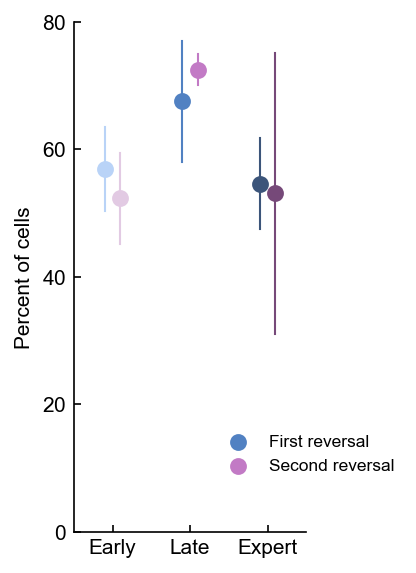

In [169]:
fig, ax = plt.subplots(figsize=(2,4.5))
labels = ['Early','Late','Expert']
numCon = len(labels)

#ax.scatter([0,1,2,3,4,5],(pc_NCR)/100,c=PHASE_COLORS,s=50,zorder=10,marker='o',lw=1)
#ax.scatter([0,1,2,3,4,5],(mean_pc_NCR_passive)/100,fc='white',ec=GOOD_GREY,s=50,zorder=9,marker='o',lw=1)

wid = 0.1

for idx in range(3):
    ax.scatter([idx-wid],(first_mean_pc_NCR[idx]),c=PHASE_COLORS[idx+3],s=50,zorder=10,marker='o',lw=1)
    ax.plot([idx-wid,idx-wid],[(first_mean_pc_NCR[idx]-first_sem_pc_NCR[idx]),(first_mean_pc_NCR[idx]+first_sem_pc_NCR[idx])],color=PHASE_COLORS[idx+3],lw=1,zorder=9)
    
    ax.scatter([idx+wid],(second_mean_pc_NCR[idx]),c=PHASE_COLORS[idx],s=50,zorder=10,marker='o',lw=1)
    ax.plot([idx+wid,idx+wid],[(second_mean_pc_NCR[idx]-second_sem_pc_NCR[idx]),(second_mean_pc_NCR[idx]+second_sem_pc_NCR[idx])],color=PHASE_COLORS[idx],lw=1,zorder=9)
    
#ax.scatter([0,1,2,3,4,5],(mean_pc_NCR_passive)/100,fc='white',ec=GOOD_GREY,s=50,zorder=9,marker='o',lw=1)



xlims = [-0.5,numCon-0.5]
ax.set_xlim(xlims)
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)

#All cells with All Cells baseline
ylab = ax.set_ylabel('Percent of cells')
ax.set_ylim([0,80])
ax.set_yticks([0,20,40,60,80])
#ax.set_yticks([0,25,50,75,90])
#ax.set_yticks([-20,-10,0,10,20])
#ax.text(-0.5,17.5,'CR',color=CR_COLOR)
#ax.text(-0.5,-17.5,'NCR',color=NCR_COLOR)

# size = 10
# rev = 2.5
# center = np.mean(ax.get_ylim())
# ax.text(rev,center,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center',rotation=90)
# ax.plot([rev,rev],[ax.get_ylim()[0],center-size],color=SWITCH_COLOR,lw=1,linestyle='-')
# ax.plot([rev,rev],[center+size,ax.get_ylim()[1]],color=SWITCH_COLOR,lw=1,linestyle='-')

ax.scatter([],[],c=PHASE_COLORS[4],s=summary_size,lw=summary_width,zorder=10,marker='o',label='First reversal')
ax.scatter([],[],c=PHASE_COLORS[1],s=summary_size,lw=summary_width,zorder=10,marker='o',label='Second reversal')
lgd = ax.legend(frameon=False,loc=(0.6,0.1))

# statsbar(ax,82,[1-wid,1+wid],stemheights=[passive_mean_pc_NCR[1]+passive_sem_pc_NCR[1] , mean_pc_NCR[1]+sem_pc_NCR[1]],text='*',lw=0.5)
# statsbar(ax,82,[4-wid,4+wid],stemheights=[passive_mean_pc_NCR[4]+passive_sem_pc_NCR[4] , mean_pc_NCR[4]+sem_pc_NCR[4]],text='****',lw=0.5)
# statsbar(ax,70,[5-wid,5+wid],stemheights=[passive_mean_pc_NCR[5]+passive_sem_pc_NCR[5] , mean_pc_NCR[5]+sem_pc_NCR[5]],text='****',lw=0.5)

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Second Reversal percent NCR V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

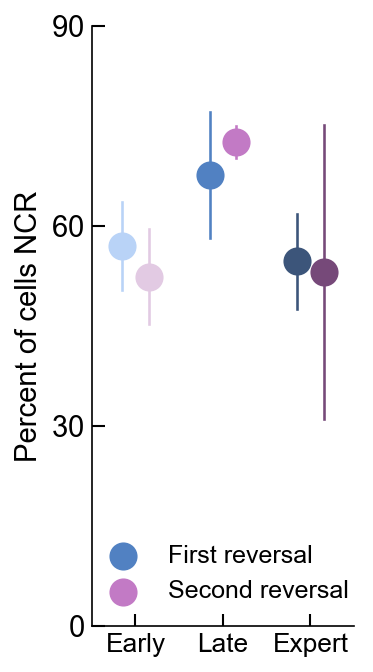

In [81]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def statsbar(ax,barheight,xpoints,stemheights,text=None,lw=1):
    ymax = ax.get_ylim()[1]
    ymin = ax.get_ylim()[0]
    yrange = ymax-ymin
    ydist = 0.025*yrange
    
    ax.plot([xpoints[0]]*2,[stemheights[0]+ydist,barheight],lw=lw,color='k')
    ax.plot([xpoints[1]]*2,[stemheights[1]+ydist,barheight],lw=lw,color='k')
    ax.plot(xpoints,[barheight]*2,lw=lw,color='k')
    
    if not text is None:
        ax.text(np.mean(xpoints),barheight + ydist,text,horizontalalignment='center',verticalalignment='center')

fig,ax = make_axis_size(1.75, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0
offset_distance = 0.05
wid=0.15

################################################################################################################

for idx in range(3):
    
#     ax.scatter([idx-wid],(passive_mean_pc_NCR[idx]),ec=GOOD_GREY,fc='white',s=50,zorder=10,marker='o',lw=1)
#     ax.plot([idx-wid,idx-wid],[(passive_mean_pc_NCR[idx]-passive_sem_pc_NCR[idx]),(passive_mean_pc_NCR[idx]+passive_sem_pc_NCR[idx])],color=GOOD_GREY,lw=1,zorder=9)
    
    ax.scatter([idx-wid],(first_mean_pc_NCR[idx]),c=PHASE_COLORS[idx+3],s=150,zorder=10,marker='o',lw=1.25)
    ax.plot([idx-wid,idx-wid],[(first_mean_pc_NCR[idx]-first_sem_pc_NCR[idx]),(first_mean_pc_NCR[idx]+first_sem_pc_NCR[idx])],color=PHASE_COLORS[idx+3],lw=1.25,zorder=9)
    
    ax.scatter([idx+wid],(second_mean_pc_NCR[idx]),c=PHASE_COLORS[idx],s=150,zorder=10,marker='o',lw=1.25)
    ax.plot([idx+wid,idx+wid],[(second_mean_pc_NCR[idx]-second_sem_pc_NCR[idx]),(second_mean_pc_NCR[idx]+second_sem_pc_NCR[idx])],color=PHASE_COLORS[idx],lw=1.25,zorder=9)

################################################################################################################

labels = ['Early','Late','Expert']
# labels2 = [4,5,6]

xlims = [-0.5,numCon-0.5]
ax.set_xlim(xlims)
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)

# ax2 = ax.twiny()
# ax2.spines['top'].set_visible(True)
# ax2.get_xaxis().set_visible(True)
# ax2.set_xlim([-0.5-switch_offset,2.5+switch_offset])
# ax2.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset])
# ax2.set_xticklabels(labels2)
# xlab2 = ax2.set_xlabel('Passive exposure phase')

#All cells with All Cells baseline
ylab = ax.set_ylabel('Percent of cells NCR')
ax.set_ylim([0,90])
ax.set_yticks([0,30,60,90])

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass
# for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
#     ax2.get_xticklabels() + ax2.get_yticklabels()):
#     item.set_fontsize(stdfont)

# ax.scatter([],[],ec=GOOD_GREY,fc='white',s=summary_size,lw=summary_width,zorder=10,marker='o',label='Passive')
ax.scatter([],[],c=PHASE_COLORS[4],s=summary_size,lw=summary_width,zorder=10,marker='o',label='First reversal')
ax.scatter([],[],c=PHASE_COLORS[1],s=summary_size,lw=summary_width,zorder=10,marker='o',label='Second reversal')
lgd = ax.legend(frameon=False,loc='lower center',fontsize=12)

artists = [ylab]#,xlab2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Second Reversal percent NCR V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

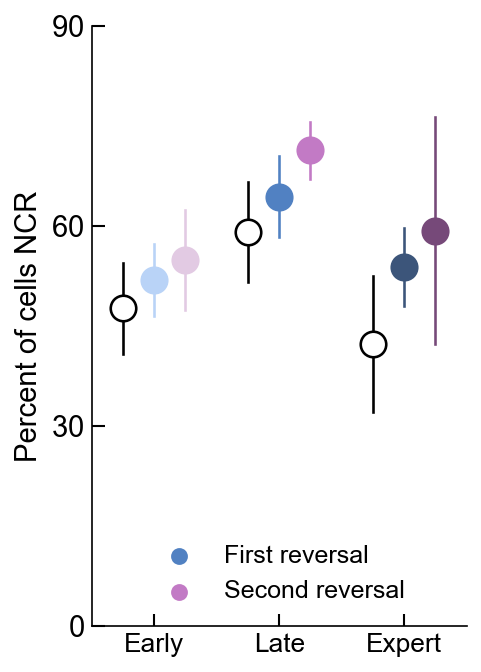

In [57]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def statsbar(ax,barheight,xpoints,stemheights,text=None,lw=1):
    ymax = ax.get_ylim()[1]
    ymin = ax.get_ylim()[0]
    yrange = ymax-ymin
    ydist = 0.025*yrange
    
    ax.plot([xpoints[0]]*2,[stemheights[0]+ydist,barheight],lw=lw,color='k')
    ax.plot([xpoints[1]]*2,[stemheights[1]+ydist,barheight],lw=lw,color='k')
    ax.plot(xpoints,[barheight]*2,lw=lw,color='k')
    
    if not text is None:
        ax.text(np.mean(xpoints),barheight + ydist,text,horizontalalignment='center',verticalalignment='center')

fig,ax = make_axis_size(2.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0
offset_distance = 0.25
wid=0.25

################################################################################################################

for idx in range(3):
    
#     ax.scatter([idx-wid],(passive_mean_pc_NCR[idx]),ec=GOOD_GREY,fc='white',s=50,zorder=10,marker='o',lw=1)
#     ax.plot([idx-wid,idx-wid],[(passive_mean_pc_NCR[idx]-passive_sem_pc_NCR[idx]),(passive_mean_pc_NCR[idx]+passive_sem_pc_NCR[idx])],color=GOOD_GREY,lw=1,zorder=9)
    
    ax.scatter([idx-wid],(pre_mean_pc_NCR[idx]),ec='k',fc='white',s=150,zorder=10,marker='o',lw=1.25)
    ax.plot([idx-wid,idx-wid],[(pre_mean_pc_NCR[idx]-pre_sem_pc_NCR[idx]),(pre_mean_pc_NCR[idx]+pre_sem_pc_NCR[idx])],color='k',lw=1.25,zorder=9)
    
    ax.scatter([idx-0*wid],(first_mean_pc_NCR[idx]),c=PHASE_COLORS[idx+3],s=150,zorder=10,marker='o',lw=1.25)
    ax.plot([idx-0*wid,idx-0*wid],[(first_mean_pc_NCR[idx]-first_sem_pc_NCR[idx]),(first_mean_pc_NCR[idx]+first_sem_pc_NCR[idx])],color=PHASE_COLORS[idx+3],lw=1.25,zorder=9)
    
    ax.scatter([idx+wid],(second_mean_pc_NCR[idx]),c=PHASE_COLORS[idx],s=150,zorder=10,marker='o',lw=1.25)
    ax.plot([idx+wid,idx+wid],[(second_mean_pc_NCR[idx]-second_sem_pc_NCR[idx]),(second_mean_pc_NCR[idx]+second_sem_pc_NCR[idx])],color=PHASE_COLORS[idx],lw=1.25,zorder=9)

################################################################################################################

labels = ['Early','Late','Expert']
# labels2 = [4,5,6]

numCon=3
xlims = [-0.5,numCon-0.5]
ax.set_xlim(xlims)
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)

# ax2 = ax.twiny()
# ax2.spines['top'].set_visible(True)
# ax2.get_xaxis().set_visible(True)
# ax2.set_xlim([-0.5-switch_offset,2.5+switch_offset])
# ax2.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset])
# ax2.set_xticklabels(labels2)
# xlab2 = ax2.set_xlabel('Passive exposure phase')

#All cells with All Cells baseline
ylab = ax.set_ylabel('Percent of cells NCR')
ax.set_ylim([0,90])
ax.set_yticks([0,30,60,90])

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass
# for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
#     ax2.get_xticklabels() + ax2.get_yticklabels()):
#     item.set_fontsize(stdfont)

# ax.scatter([],[],ec=GOOD_GREY,fc='white',s=summary_size,lw=summary_width,zorder=10,marker='o',label='Passive')
ax.scatter([],[],c=PHASE_COLORS[4],s=summary_size,lw=summary_width,zorder=10,marker='o',label='First reversal')
ax.scatter([],[],c=PHASE_COLORS[1],s=summary_size,lw=summary_width,zorder=10,marker='o',label='Second reversal')
lgd = ax.legend(frameon=False,loc='lower center',fontsize=12)

artists = [ylab]#,xlab2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Second Reversal percent NCR V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

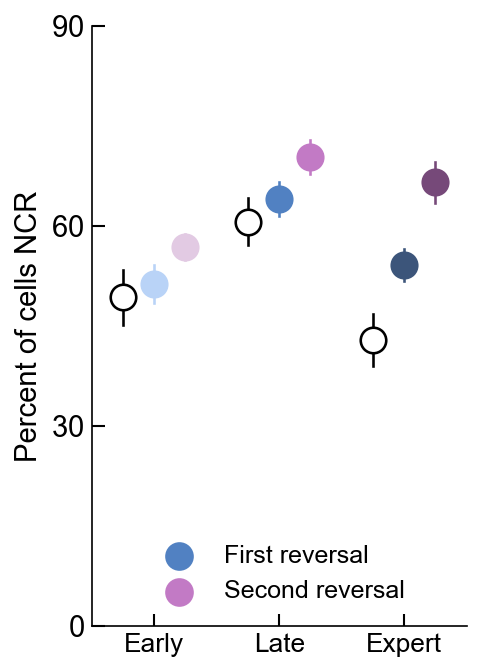

In [56]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def statsbar(ax,barheight,xpoints,stemheights,text=None,lw=1):
    ymax = ax.get_ylim()[1]
    ymin = ax.get_ylim()[0]
    yrange = ymax-ymin
    ydist = 0.025*yrange
    
    ax.plot([xpoints[0]]*2,[stemheights[0]+ydist,barheight],lw=lw,color='k')
    ax.plot([xpoints[1]]*2,[stemheights[1]+ydist,barheight],lw=lw,color='k')
    ax.plot(xpoints,[barheight]*2,lw=lw,color='k')
    
    if not text is None:
        ax.text(np.mean(xpoints),barheight + ydist,text,horizontalalignment='center',verticalalignment='center')

fig,ax = make_axis_size(2.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0
offset_distance = 0.25
wid=0.25

################################################################################################################
summary_size=150
summary_width=1.5

for idx in range(3):
    
#     ax.scatter([idx-wid],(passive_mean_pc_NCR[idx]),ec=GOOD_GREY,fc='white',s=50,zorder=10,marker='o',lw=1)
#     ax.plot([idx-wid,idx-wid],[(passive_mean_pc_NCR[idx]-passive_sem_pc_NCR[idx]),(passive_mean_pc_NCR[idx]+passive_sem_pc_NCR[idx])],color=GOOD_GREY,lw=1,zorder=9)
    
    ax.scatter([idx-wid],(pre_mean_pc_NCR[idx]),ec='k',fc='white',s=150,zorder=10,marker='o',lw=1.25)
    ax.plot([idx-wid,idx-wid],[(pre_mean_pc_NCR[idx]-pre_sem_pc_NCR[idx]),(pre_mean_pc_NCR[idx]+pre_sem_pc_NCR[idx])],color='k',lw=1.25,zorder=9)
    
    ax.scatter([idx-0*wid],(first_mean_pc_NCR[idx]),c=PHASE_COLORS[idx+3],s=150,zorder=10,marker='o',lw=1.25)
    ax.plot([idx-0*wid,idx-0*wid],[(first_mean_pc_NCR[idx]-first_sem_pc_NCR[idx]),(first_mean_pc_NCR[idx]+first_sem_pc_NCR[idx])],color=PHASE_COLORS[idx+3],lw=1.25,zorder=9)
    
    ax.scatter([idx+wid],(second_mean_pc_NCR[idx]),c=PHASE_COLORS[idx],s=150,zorder=10,marker='o',lw=1.25)
    ax.plot([idx+wid,idx+wid],[(second_mean_pc_NCR[idx]-second_sem_pc_NCR[idx]),(second_mean_pc_NCR[idx]+second_sem_pc_NCR[idx])],color=PHASE_COLORS[idx],lw=1.25,zorder=9)

################################################################################################################

labels = ['Early','Late','Expert']
# labels2 = [4,5,6]

numCon=3
xlims = [-0.5,numCon-0.5]
ax.set_xlim(xlims)
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)

# ax2 = ax.twiny()
# ax2.spines['top'].set_visible(True)
# ax2.get_xaxis().set_visible(True)
# ax2.set_xlim([-0.5-switch_offset,2.5+switch_offset])
# ax2.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset])
# ax2.set_xticklabels(labels2)
# xlab2 = ax2.set_xlabel('Passive exposure phase')

#All cells with All Cells baseline
ylab = ax.set_ylabel('Percent of cells NCR')
ax.set_ylim([0,90])
ax.set_yticks([0,30,60,90])

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass
# for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
#     ax2.get_xticklabels() + ax2.get_yticklabels()):
#     item.set_fontsize(stdfont)

# ax.scatter([],[],ec=GOOD_GREY,fc='white',s=summary_size,lw=summary_width,zorder=10,marker='o',label='Passive')
ax.scatter([],[],c=PHASE_COLORS[4],s=summary_size,lw=summary_width,zorder=10,marker='o',label='First reversal')
ax.scatter([],[],c=PHASE_COLORS[1],s=summary_size,lw=summary_width,zorder=10,marker='o',label='Second reversal')
lgd = ax.legend(frameon=False,loc='lower center',fontsize=12)

artists = [ylab]#,xlab2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Second Reversal percent NCR V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

## Stats

In [57]:
def combine(A,B):
    for b in B:
        A.append(b)
    return A

Xs = [second_FR_secondearly,second_FR_secondlate,second_FR_secondexpert]
Ys = [first_FR_preearly,first_FR_prelate,first_FR_preexpert]
Zs = [first_FR_postearly,first_FR_postlate,combine(first_FR_postexpert,second_FR_postexpert)]

pvals = [np.nan]*9
for idx,(X,Y) in enumerate(zip(Xs,Ys)):
    pvals[idx] = ilep.bootstrap_pc_NCR_test(X,Y,B=250000,CR_NCR_thresh=[3.5])
    print(pvals[idx])
for idx,(X,Y) in enumerate(zip(Xs,Zs)):
    pvals[idx+3] = ilep.bootstrap_pc_NCR_test(X,Y,B=250000,CR_NCR_thresh=[3.5])
    print(pvals[idx+3])
for idx,(X,Y) in enumerate(zip(Ys,Zs)):
    pvals[idx+6] = ilep.bootstrap_pc_NCR_test(X,Y,B=250000,CR_NCR_thresh=[3.5])
    print(pvals[idx+6])
    
_,pvals_corr = pg.multicomp(pvals,method='fdr_bh')
print()
print(pvals_corr)

../..\InsanallyLabEphysTools\analysis.py:869: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)
../..\InsanallyLabEphysTools\analysis.py:873: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array(Y)


0.09544799999999998
0.022672000000000025
0.0
0.09644800000000009
0.07565599999999995
0.0028960000000000097
0.6963360000000001
0.4246239999999999
0.01493600000000006

[0.12400457 0.051012   0.         0.12400457 0.12400457 0.013032
 0.696336   0.477702   0.044808  ]


In [57]:
# Hierarchical

In [70]:
# Hierarchical stats. Old.

def combine(A,B):
    for b in B:
        A.append(b)
    return A

Xs = [second_FR_secondearly,second_FR_secondlate,second_FR_secondexpert]
Ys = [first_FR_preearly,first_FR_prelate,first_FR_preexpert]
Zs = [first_FR_postearly,first_FR_postlate,combine(first_FR_postexpert,second_FR_postexpert)]

pvals = [np.nan]*6
for idx,(X,Y) in enumerate(zip(Xs,Ys)):
    pvals[idx] = hier_boot_pc_NCR_test(X,Y,B=250000,CR_NCR_thresh=3.5)
    print(pvals[idx])
for idx,(X,Y) in enumerate(zip(Xs,Zs)):
    pvals[idx+3] = hier_boot_pc_NCR_test(X,Y,B=250000,CR_NCR_thresh=3.5)
    print(pvals[idx+3])
    
_,pvals_corr = pg.multicomp(pvals,method='fdr_bh')
print()
print(pvals_corr)

<ipython-input-51-45c5dff187cb>:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)
<ipython-input-51-45c5dff187cb>:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array(Y)


0.48395199999999994
0.1284639999999999
0.29647200000000007
0.85452
0.596768
0.43000799999999995

[0.7161216 0.7161216 0.7161216 0.85452   0.7161216 0.7161216]


In [105]:
len(FRmod_postexpert_total)

337

In [ ]:
#Check pickle files

In [23]:
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename()

In [20]:
with open(file_path, 'rb') as f:
    file_contents = pickle.load(f)

In [195]:
print(file_contents)